## Import all functions

In [1]:
# Import all the functions you need
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os
from pathlib import Path
import platform
# Comment here to add in for either mac or linux computer
if platform.system() == "Linux":   # for linux
    sys.path.extend(['/data/GitHub/NeuroPy']) 
    sys.path.extend(['/data/GitHub/TraceFC/'])
elif platform.system() == "Darwin":
    sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/NeuroPy'])
    sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/TraceFC'])
elif platform.system() == "Windows":
    print('No windows repositories defined')

from neuropy import core
from neuropy.io import (optitrackio,
                        dlcio,
                        )
from neuropy.io.miniscopeio import MiniscopeIO
from neuropy.core import Epoch
from neuropy.utils import plot_util
from neuropy.utils.signal_process import WaveletSg
from neuropy.plotting.spikes import plot_raster, plot_binned_raster
from neuropy.plotting.signals import plot_signal_w_epochs, plot_spectrogram

from tracefc.io.session_directory import get_session_dir
from neuropy.utils.signal_process import hilbert_amplitude_stat, theta_phase_specfic_extraction, ThetaParams
from neuropy.analyses.oscillations import detect_theta_epochs
from tracefc.io.traceio import load_trace_events, trace_ttl_to_openephys
import neuropy.io.openephysio as oeio

/home/bowenw/miniforge3/envs/NeuroPy/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
# Define a class for a typical recording or set of recordings
from neuropy.core.session import ProcessData
    
def sess_use(basepath=os.getcwd()):

    return ProcessData(basepath)

## Detect Theta epochs-read in all animals

Best channel for theta: [26]
1144 epochs remaining with durations within (1,20)
No matching events found. Try increasing assumed lag in "ttl_lag" param
No matching events found. Try increasing assumed lag in "ttl_lag" param
start time = 2022-05-09 12:06:13.678315-04:00
start time = 2022-05-09 12:15:08.781851-04:00
start time = 2022-05-09 12:33:20.854076-04:00
start time = 2022-05-09 12:39:03.160744-04:00
start time = 2022-05-09 12:48:12.124560-04:00
start time = 2022-05-09 12:54:42.702826-04:00
start time = 2022-05-09 13:04:08.630558-04:00
start time = 2022-05-09 13:58:51.401140-04:00
start time = 2022-05-09 14:08:35.718726-04:00
start time = 2022-05-09 16:10:53.170647-04:00
Best channel for theta: [8]
960 epochs remaining with durations within (1,20)
start time lag: mean = -0.5394885366666666, std = 0.2466135352632615
start time lag: mean = -0.539772271, std = 0.24672374012407294
start time = 2022-08-03 12:25:29.361157-04:00


/data/GitHub/TraceFC/tracefc/io/traceio.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trace_cs_sync_df.loc[:, "datetimes"] = trace_cs_sync_df["datetimes"].dt.tz_localize(


start time = 2022-08-03 12:28:50.720333-04:00
start time = 2022-08-03 12:35:21.719327-04:00
start time = 2022-08-03 12:53:02.683128-04:00
start time = 2022-08-03 12:56:48.234187-04:00
start time = 2022-08-03 13:10:55.680961-04:00
start time = 2022-08-03 13:14:13.174881-04:00
start time = 2022-08-03 13:16:44.696588-04:00
start time = 2022-08-03 13:35:23.930035-04:00
start time = 2022-08-03 14:25:45.955674-04:00
start time = 2022-08-03 14:34:34.738770-04:00
start time = 2022-08-03 15:19:53.342091-04:00
start time = 2022-08-03 15:42:32.218764-04:00
Best channel for theta: [59]
1511 epochs remaining with durations within (1,20)
start time lag: mean = -0.6581839184999999, std = 0.00022231442728690363
start time lag: mean = -0.6583483478333333, std = 0.00022896530483146918
start time = 2023-03-08 12:02:43-05:00
start time = 2023-03-08 12:15:15-05:00


/data/GitHub/TraceFC/tracefc/io/traceio.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trace_cs_sync_df.loc[:, "datetimes"] = trace_cs_sync_df["datetimes"].dt.tz_localize(


start time = 2023-03-08 12:51:35-05:00
start time = 2023-03-08 13:45:07-05:00
start time = 2023-03-08 14:44:52-05:00
start time = 2023-03-08 17:42:37-05:00
Best channel for theta: [7]
1502 epochs remaining with durations within (1,20)
start time lag: mean = -0.40930200366666664, std = 0.0012269775854382478
start time lag: mean = -0.40964181983333336, std = 0.0012354090779131128
start time = 2023-05-08 11:54:10-04:00


/data/GitHub/TraceFC/tracefc/io/traceio.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trace_cs_sync_df.loc[:, "datetimes"] = trace_cs_sync_df["datetimes"].dt.tz_localize(


start time = 2023-05-08 12:04:32-04:00
start time = 2023-05-08 12:41:12-04:00
start time = 2023-05-08 14:15:17-04:00
start time = 2023-05-08 15:12:40-04:00
Best channel for theta: [25]
1304 epochs remaining with durations within (1,20)
start time lag: mean = -0.6511317885, std = 0.29458161267510247
start time lag: mean = -0.6514769363333334, std = 0.294484481800417
start time = 2022-06-22 12:13:44.331483-04:00


/data/GitHub/TraceFC/tracefc/io/traceio.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trace_cs_sync_df.loc[:, "datetimes"] = trace_cs_sync_df["datetimes"].dt.tz_localize(


start time = 2022-06-22 12:25:48.054692-04:00
start time = 2022-06-22 12:35:27.787169-04:00
start time = 2022-06-22 13:03:02.922202-04:00
start time = 2022-06-22 13:10:06.192484-04:00
start time = 2022-06-22 13:54:58.035938-04:00
start time = 2022-06-22 14:54:42.076759-04:00
start time = 2022-06-22 15:35:41.591063-04:00
start time = 2022-06-22 15:41:43.879391-04:00
start time = 2022-06-22 16:07:27.767686-04:00
Best channel for theta: [18]
831 epochs remaining with durations within (1,20)
start time lag: mean = -0.7076860578333334, std = 0.0010682421575040585
start time lag: mean = -0.7078422188333332, std = 0.0010084827325533058
start time = 2022-06-17 11:49:35.167771-04:00


/data/GitHub/TraceFC/tracefc/io/traceio.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trace_cs_sync_df.loc[:, "datetimes"] = trace_cs_sync_df["datetimes"].dt.tz_localize(


start time = 2022-06-17 11:59:21.708710-04:00
start time = 2022-06-17 12:36:31.859416-04:00
start time = 2022-06-17 15:27:42.768667-04:00
start time = 2022-06-17 12:36:31.859416-04:00
start time = 2022-06-17 13:00:21.503381-04:00
start time = 2022-06-17 13:41:54.130737-04:00
start time = 2022-06-17 13:54:57.288518-04:00
start time = 2022-06-17 14:01:14.359765-04:00
start time = 2022-06-17 14:04:58.639594-04:00
start time = 2022-06-17 14:26:31.373293-04:00
start time = 2022-06-17 14:35:21.609805-04:00
start time = 2022-06-17 14:35:21.609805-04:00
start time = 2022-06-17 14:35:21.609805-04:00
start time = 2022-06-17 15:19:01.281248-04:00


[ProcessData(Rey_training_denoised.xml),
 ProcessData(Han_training.xml),
 ProcessData(Django_training_denoised.xml),
 ProcessData(Finn2_training_denoised.xml),
 ProcessData(Rose_training_denoised.xml),
 ProcessData(Jyn_training_denoised.xml)]

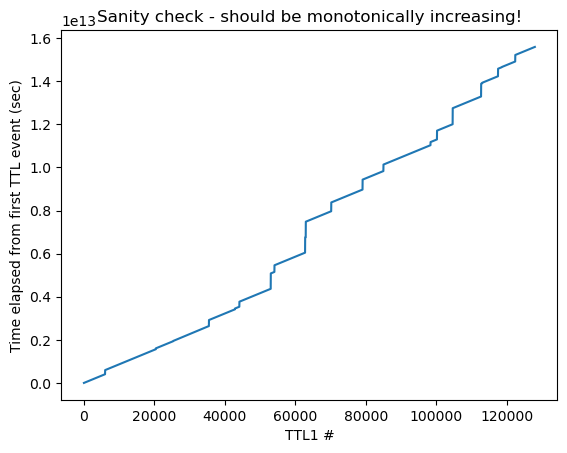

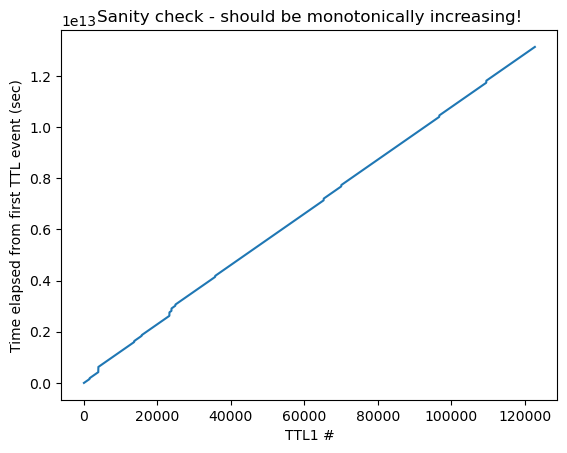

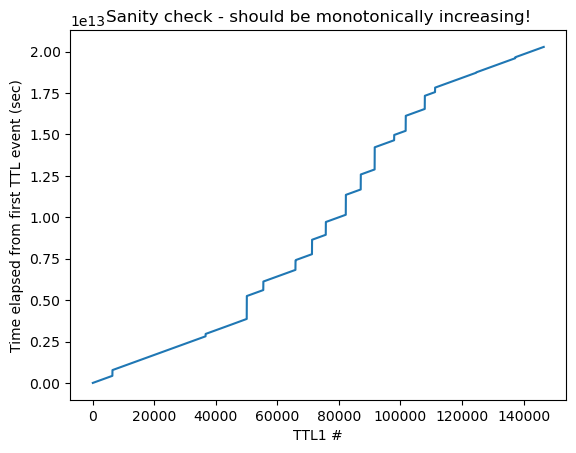

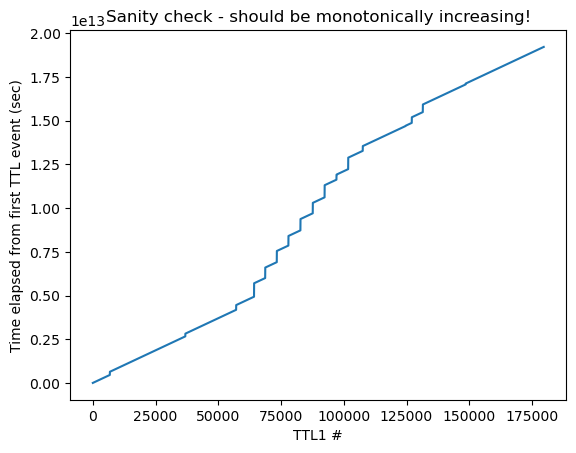

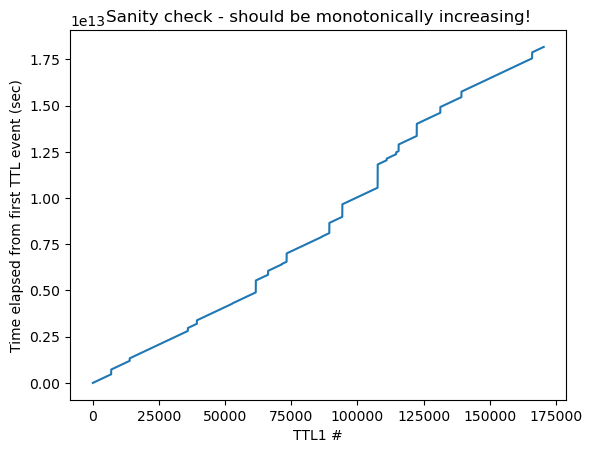

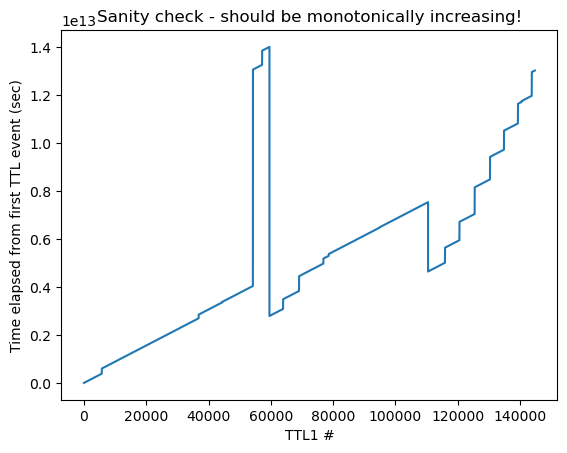

In [3]:
#Loop through and load in artifacts, signal, and do theta wavelet
training_sessions = [['Rey', 'training'],['Han','training'],['Django', 'training'], ['Finn2', 'training'], 
                     ['Rose', 'training'], ['Jyn','training']]
theta_channels = [26, 8, 59, 7, 25, 18]
theta_range = np.arange(4, 14, 0.25)
rec_list = []
ttl_lag_use = 0.8

for (animal, sess_name), theta_channel in zip(training_sessions, theta_channels):
#for (animal, sess_name), theta_channel in zip([training_sessions[1]], theta_channels):
    
    sess_dir = get_session_dir(animal, sess_name)
    sess = sess_use(sess_dir)
    sess.animal = animal
    sess.sess_name = sess_name
    art_epochs_file = sess.filePrefix.with_suffix(".art_epochs.npy")
    sess.signal = sess.eegfile.get_signal()
    sess.art_epochs = Epoch(epochs=None, file=art_epochs_file)
    # signal = sess.eegfile.get_signal()
    sess.tparams = ThetaParams(lfp=sess.signal.traces[theta_channel, :], fs=sess.signal.sampling_rate, method="waveshape")
    signal_use = sess.signal.time_slice(channel_id=theta_channel)
    # sess.wv_theta = WaveletSg(sess.signal.time_slice(channel_id=theta_channel, t_stop=np.min((80*60, signal_use.t_stop))), 
    #                           freqs=theta_range, sigma=None)
    theta_epochs, theta_power = detect_theta_epochs(signal_use, probegroup=None, mindur=1, maxdur=20, thresh=(1, None), 
                                                    edge_cutoff=0.25, ignore_epochs=sess.art_epochs, return_power=True)
    sess.theta_power = theta_power
    sess.theta_epochs = theta_epochs
    usv_epochs_file = sess.filePrefix.with_suffix(".usv_epochs.npy")
    usv_epochs = Epoch(epochs=None, file=usv_epochs_file)
    sess.usv_epochs = usv_epochs

    ripple_epochs_file = sess.filePrefix.with_suffix(".ripple_epochs.npy")
    sess.ripple_epochs = Epoch(epochs=None, file=ripple_epochs_file)

    cs_plus_events = {} 
    cs_starts, cs_stops, _ = load_trace_events(sess_dir, session_type="training", event_type="CS+", return_df=True)

    ttl_df = oeio.load_all_ttl_events(sess.basepath, sanity_check_channel=1, zero_timestamps=True)
    
    ttl_lag_use = pd.Timedelta(0.8, unit="seconds")
    cs_oe_start_df = trace_ttl_to_openephys(cs_starts, 
                                      ttl_df[ttl_df['channel_states'].abs() == 2], 
                                      ttl_lag=ttl_lag_use)
    cs_oe_stop_df = trace_ttl_to_openephys(cs_stops, 
                                  ttl_df[ttl_df['channel_states'].abs() == 2], 
                                  ttl_lag=ttl_lag_use)
    
    # cs_plus_events = (cs_starts, cs_stops)  
    sess.sync_df = oeio.create_sync_df(sess.basepath)
    cs_starts_combined = oeio.recording_events_to_combined_time(cs_oe_start_df, sess.sync_df)
    cs_stops_combined = oeio.recording_events_to_combined_time(cs_oe_stop_df, sess.sync_df)
    sess.cs_plus_events=(cs_starts_combined, cs_stops_combined) # Store the CS+ starts and stops for each animal

    # Load in previously aligned data - better to do after running individual animal notebooks!
    # cs_epochs = Epoch(epochs=None, file=sess.filePrefix.with_suffix(".csp_epochs.npy"))
    # sess.cs_plus_events=(cs_epochs.starts, cs_epochs.stops) # Store the CS+ starts and stops for each animal
    
    rec_list.append(sess)
rec_list

## Identify disconnect and motion artifacts

In [4]:
from neuropy.analyses.artifact import detect_artifact_epochs
signal = sess.eegfile.get_signal()
buffer_add = 0.25  # seconds, None = don't add

art_epochs_file = sess.filePrefix.with_suffix(".art_epochs.npy")
if art_epochs_file.exists():
    art_epochs = Epoch(epochs=None, file=art_epochs_file)
    print('Existing artifact epochs file loaded')
else:
    # art_epochs = detect_artifact_epochs(signal, thresh=8, 
    #                                 edge_cutoff=3, merge=6)

    # Pick a particular channel with the code below
    art_epochs = detect_artifact_epochs(signal.time_slice(channel_id=theta_channels), thresh=8, 
                                    edge_cutoff=3, merge=6)

    if buffer_add is not None:  # Add in buffer to prevent erroneous detection of start/stop of artifact as SWRs
        art_epochs.add_epoch_buffer(buffer_add)
    sess.recinfo.write_epochs(epochs=art_epochs, ext='art')
    art_epochs.save(art_epochs_file)

print(f'Total artifact time = {art_epochs.durations.sum():0.1F} seconds')
art_epochs.to_dataframe()

Existing artifact epochs file loaded
Total artifact time = 108.6 seconds


,start,stop,label,duration
0,868.3664,870.7752,,2.4088
1,1160.5312,1162.5560,,2.0248
2,1432.4056,1435.9024,,3.4968
3,1711.3776,1713.6968,,2.3192
4,1971.0752,1973.5232,,2.4480
5,1999.2224,2001.6896,,2.4672
6,2261.2112,2263.2896,,2.0784
7,2633.3672,2634.5616,,1.1944
8,7090.3376,7102.0696,,11.7320
9,7259.5000,7273.8224,,14.3224


In [5]:
cs_stops_combined

array([ 847.789123, 1139.957356, 1411.835723, 1690.794023, 1950.49249 ,
       2240.630756])

In [6]:
sess.theta_epochs

831 epochs
Snippet: 
       start      stop  peak_time  peak_power label
0   67.3544   70.5592    68.6544    4.956332      
1  419.7656  426.6672   421.5552    5.349023      
2  439.8944  441.0216   440.5144    1.044431      
3  455.9248  457.1456   456.5064    1.288376      
4  689.2448  692.2424   691.2208    5.678269      

In [7]:
# rec_list = []
# for (animal, sess_name), theta_channel in zip(training_sessions, theta_channels):
#     sess_dir = get_session_dir(animal, sess_name)
#     sess = sess_use(sess_dir)
#     try:
#         save_name = sess.filePrefix.with_suffix(".mean_speed_high_usv.npy")
#         sess.mean_speed_high_usv = np.load(save_name)
#     except:
#         pass    
#     rec_list.append(sess)

In [8]:
sess.cs_plus_events=(cs_starts_combined, cs_stops_combined) 

start time lag: mean = -0.7076860578333334, std = 0.0010682421575040585
start time lag: mean = -0.7078422188333332, std = 0.0010084827325533058
start time = 2022-06-17 11:49:35.167771-04:00
start time = 2022-06-17 11:59:21.708710-04:00


/data/GitHub/TraceFC/tracefc/io/traceio.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trace_cs_sync_df.loc[:, "datetimes"] = trace_cs_sync_df["datetimes"].dt.tz_localize(


start time = 2022-06-17 12:36:31.859416-04:00
start time = 2022-06-17 15:27:42.768667-04:00
start time = 2022-06-17 12:36:31.859416-04:00
start time = 2022-06-17 13:00:21.503381-04:00
start time = 2022-06-17 13:41:54.130737-04:00
start time = 2022-06-17 13:54:57.288518-04:00
start time = 2022-06-17 14:01:14.359765-04:00
start time = 2022-06-17 14:04:58.639594-04:00
start time = 2022-06-17 14:26:31.373293-04:00
start time = 2022-06-17 14:35:21.609805-04:00
start time = 2022-06-17 14:35:21.609805-04:00
start time = 2022-06-17 14:35:21.609805-04:00
start time = 2022-06-17 15:19:01.281248-04:00


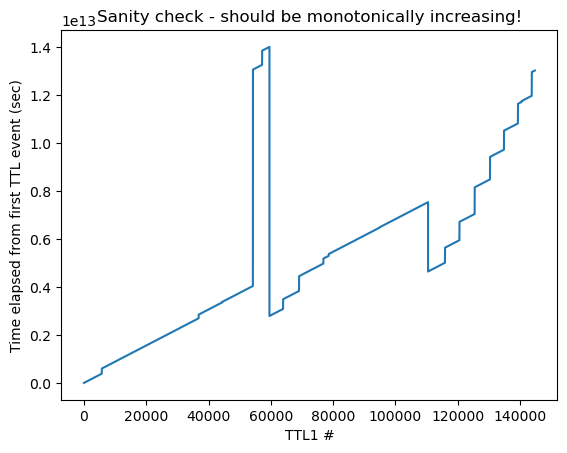

In [9]:
ttl_df = oeio.load_all_ttl_events(sess.basepath, sanity_check_channel=1, zero_timestamps=True)

ttl_lag_use = pd.Timedelta(0.8, unit="seconds")
cs_oe_start_df = trace_ttl_to_openephys(cs_starts, 
                                  ttl_df[ttl_df['channel_states'].abs() == 2], 
                                  ttl_lag=ttl_lag_use)
cs_oe_stop_df = trace_ttl_to_openephys(cs_stops, 
                              ttl_df[ttl_df['channel_states'].abs() == 2], 
                              ttl_lag=ttl_lag_use)
sync_df = oeio.create_sync_df(sess.basepath)

In [10]:
cs_starts

,Time (s),Event,Timestamp
6,365.880625,CS1_start,2022-06-17 12:06:08.734140010
16,658.036726,CS2_start,2022-06-17 12:11:00.890240998
26,929.910560,CS3_start,2022-06-17 12:15:32.764074893
36,1208.889620,CS4_start,2022-06-17 12:20:11.743134827
46,1468.570435,CS5_start,2022-06-17 12:24:31.423949570
56,1758.713028,CS6_start,2022-06-17 12:29:21.566542716


In [11]:
# Convert to times in combined eeg file
cs_starts_combined = oeio.recording_events_to_combined_time(cs_oe_start_df, sync_df)
cs_stops_combined = oeio.recording_events_to_combined_time(cs_oe_stop_df, sync_df)
cs_starts_combined

array([ 837.867123, 1130.022723, 1401.89599 , 1680.874456, 1940.554756,
       2230.696656])

In [12]:
cs_plus_events.get('Rey')

In [13]:
sess.ripple_epochs.metadata

{'params': {'lowThres': 2,
  'highThresh': None,
  'freq_band': (150, 250),
  'mindur': 0.05,
  'maxdur': 0.45},
 'channels': [18]}

In [14]:
[_.theta_epochs.metadata["params"]["highThresh"] for _ in rec_list]

[None, None, None, None, None, None]

In [15]:
[_.theta_epochs.metadata["params"]["lowThres"] for _ in rec_list]

[1, 1, 1, 1, 1, 1]

In [16]:
[_.ripple_epochs.metadata["params"]["highThresh"] for _ in rec_list]

[None, None, None, None, None, None]

In [17]:
[_.ripple_epochs.metadata["params"]["lowThres"] for _ in rec_list]

[2, 2, 2, 2, 2, 2]

In [18]:
#usv_list = []
#for sess in rec_list:
#  usv_epochs_file = sess.filePrefix.with_suffix(".usv_epochs.npy")
#  usv_epochs = Epoch(epochs=None, file=usv_epochs_file)
#  usv_list.append(usv_epochs)

In [19]:
training_sessions

[['Rey', 'training'],
 ['Han', 'training'],
 ['Django', 'training'],
 ['Finn2', 'training'],
 ['Rose', 'training'],
 ['Jyn', 'training']]

In [20]:
rec_list

[ProcessData(Rey_training_denoised.xml),
 ProcessData(Han_training.xml),
 ProcessData(Django_training_denoised.xml),
 ProcessData(Finn2_training_denoised.xml),
 ProcessData(Rose_training_denoised.xml),
 ProcessData(Jyn_training_denoised.xml)]

In [21]:
usv_epochs

16 epochs
Snippet: 
         start        stop  Begin_Time   Freq_Min  Duration  Freq_Range  Score  \
0  870.126212  870.171338  505.926529  47.944444  0.045134   27.777778    1.0   
1  871.160586  871.233890  506.961084  45.345779  0.073317   25.343152    1.0   
2  871.556279  871.597182  507.356846  50.209416  0.040911    5.905844    1.0   
3  871.961179  872.056770  507.761818  46.842283  0.095608    5.095238    1.0   
4  872.405570  872.475605  508.206287  45.924784  0.070048    5.326840    1.0   

   Accept label  
0       1        
1       1        
2       1        
3       1        
4       1        

In [22]:
usv_list=[]
usv_list.append(sess.usv_epochs)
usv_list

[16 epochs
 Snippet: 
          start        stop  Begin_Time   Freq_Min  Duration  Freq_Range  Score  \
 0  870.126212  870.171338  505.926529  47.944444  0.045134   27.777778    1.0   
 1  871.160586  871.233890  506.961084  45.345779  0.073317   25.343152    1.0   
 2  871.556279  871.597182  507.356846  50.209416  0.040911    5.905844    1.0   
 3  871.961179  872.056770  507.761818  46.842283  0.095608    5.095238    1.0   
 4  872.405570  872.475605  508.206287  45.924784  0.070048    5.326840    1.0   
 
    Accept label  
 0       1        
 1       1        
 2       1        
 3       1        
 4       1        ]

In [23]:
usv_epochs_file

PosixPath('/data2/Trace_FC/Recording_Rats/Jyn/2022_06_17_training/Jyn_training_denoised.usv_epochs.npy')

In [24]:
theta_power

array([-0.49244665, -0.49242102, -0.49236978, ..., -0.94241655,
       -0.9425195 , -0.94257097])

## Theta phase at 50kHz USV start

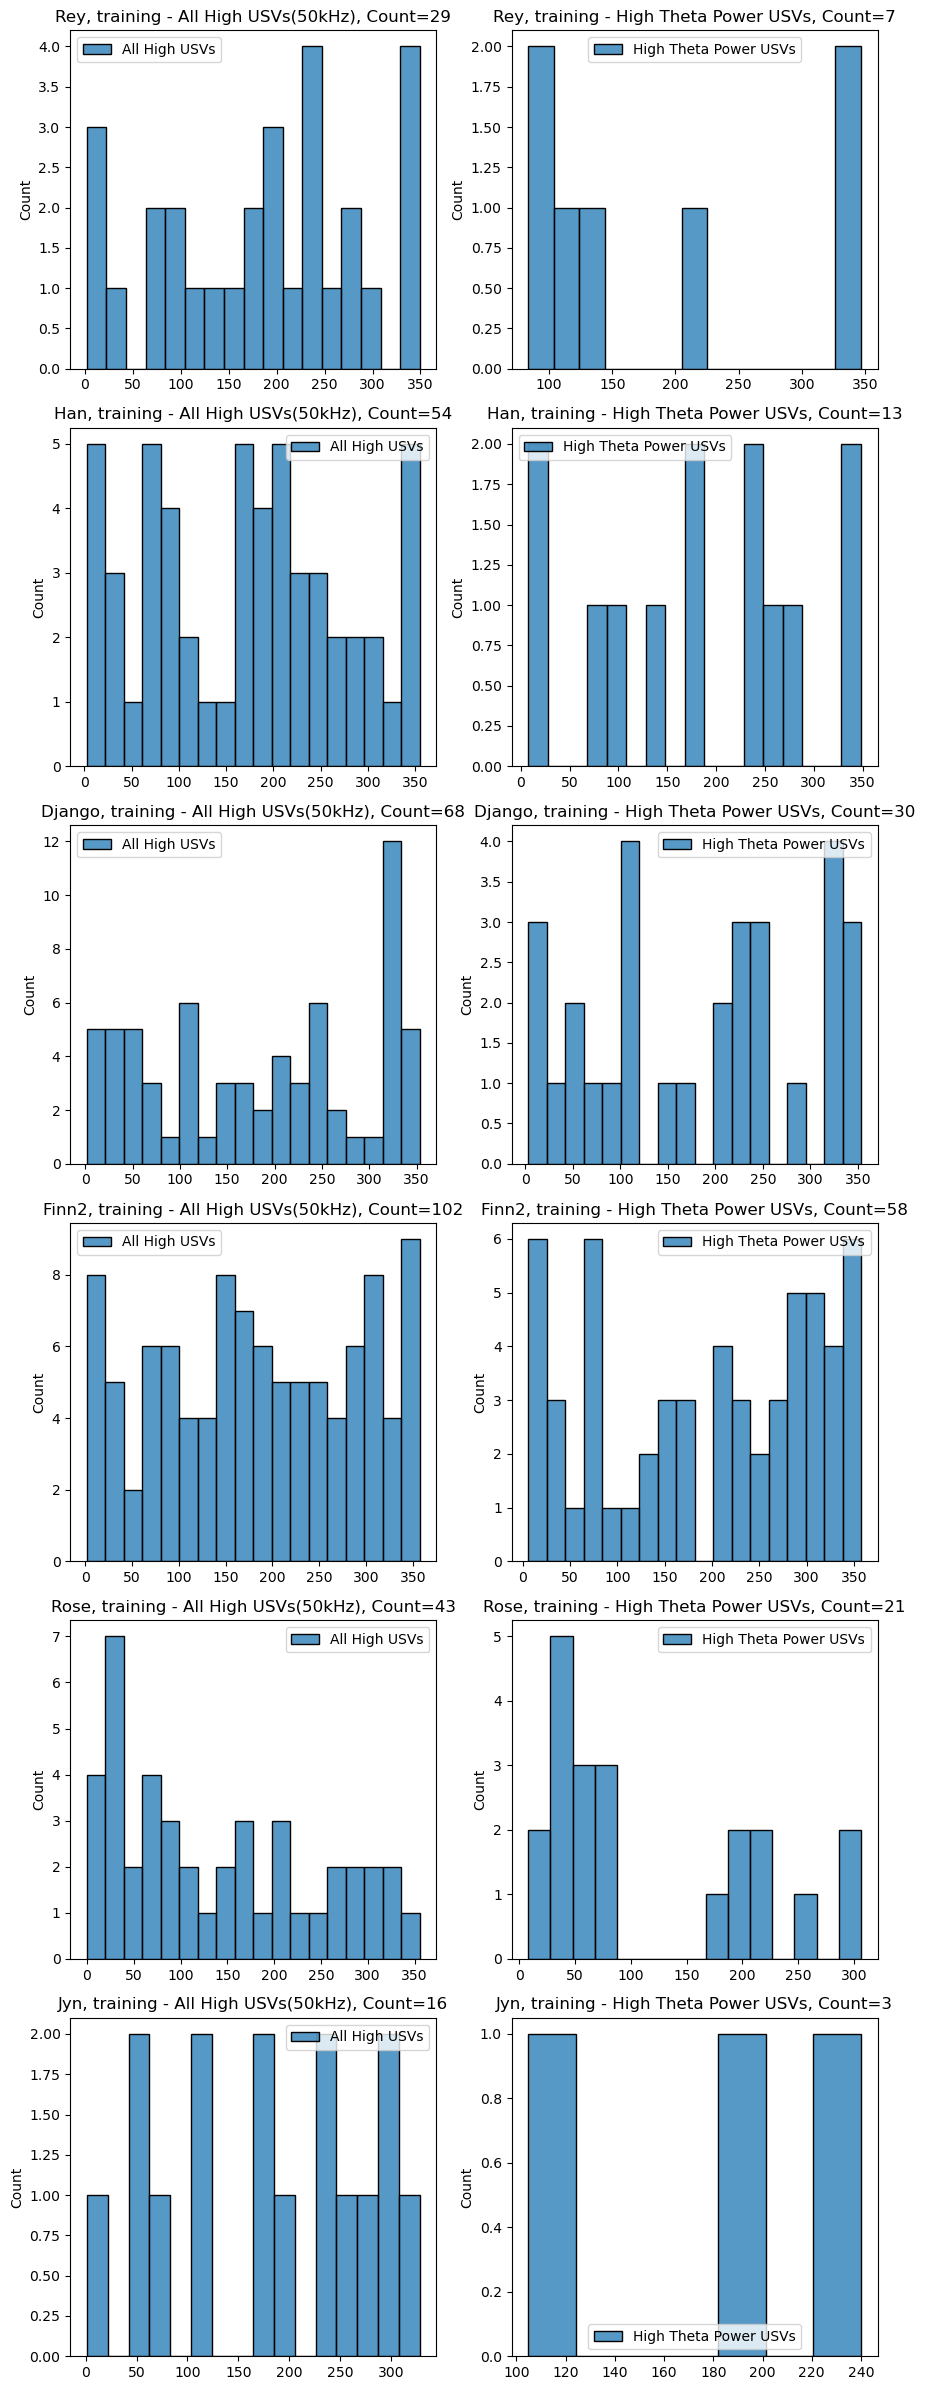

In [25]:
# highusv all animal start
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

theta_thresh = 0

# Assuming training_sessions and rec_list are defined
fig, ax = plt.subplots(len(training_sessions), 2, figsize=(9, 4*len(training_sessions)))
if len(training_sessions) == 1:
    ax = [ax]

for idx, ((animal, sess_name), sess) in enumerate(zip(training_sessions, rec_list)):
    # Determine which columns to use for start and stop times
    if "t_start_eeg" in sess.usv_epochs.to_dataframe().columns:
        start_key = "t_start_eeg"
    else:
        start_key = "start"

    highusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min > 23]
    # Use the determined key for start times
    highusv_start_frames = (highusv_epochs[start_key] * sess.tparams.fs).astype(int).values

    highusv_start_theta_power = sess.theta_power[highusv_start_frames]
    highusv_high_usv_power_bool = highusv_start_theta_power > theta_thresh
    highusv_high_theta_usv_start_frames = highusv_start_frames[highusv_high_usv_power_bool]

    highusv_phase_start = sess.tparams.angle[highusv_start_frames]
    highusv_high_theta_phase_start = sess.tparams.angle[highusv_high_theta_usv_start_frames]

    # Use the correct index for ax when multiple rows exist
    current_ax = ax[idx] if len(training_sessions) > 1 else ax

    sns.histplot(highusv_phase_start, binwidth=20, ax=current_ax[0], label='All High USVs')
    sns.histplot(highusv_high_theta_phase_start, binwidth=20, ax=current_ax[1], label='High Theta Power USVs')
    
    current_ax[0].legend()
    current_ax[1].legend()
    current_ax[0].set_title(f'{animal}, {sess_name} - All High USVs(50kHz), Count={len(highusv_phase_start)}')
    current_ax[1].set_title(f'{animal}, {sess_name} - High Theta Power USVs, Count={len(highusv_high_theta_phase_start)}')

plt.tight_layout()
plt.show()
fig.savefig('/home/bowenw/Documents/thesisplots/Phase analysis high_usv_phase_change_start.png')

## Theta phase at 50kHz USV stop

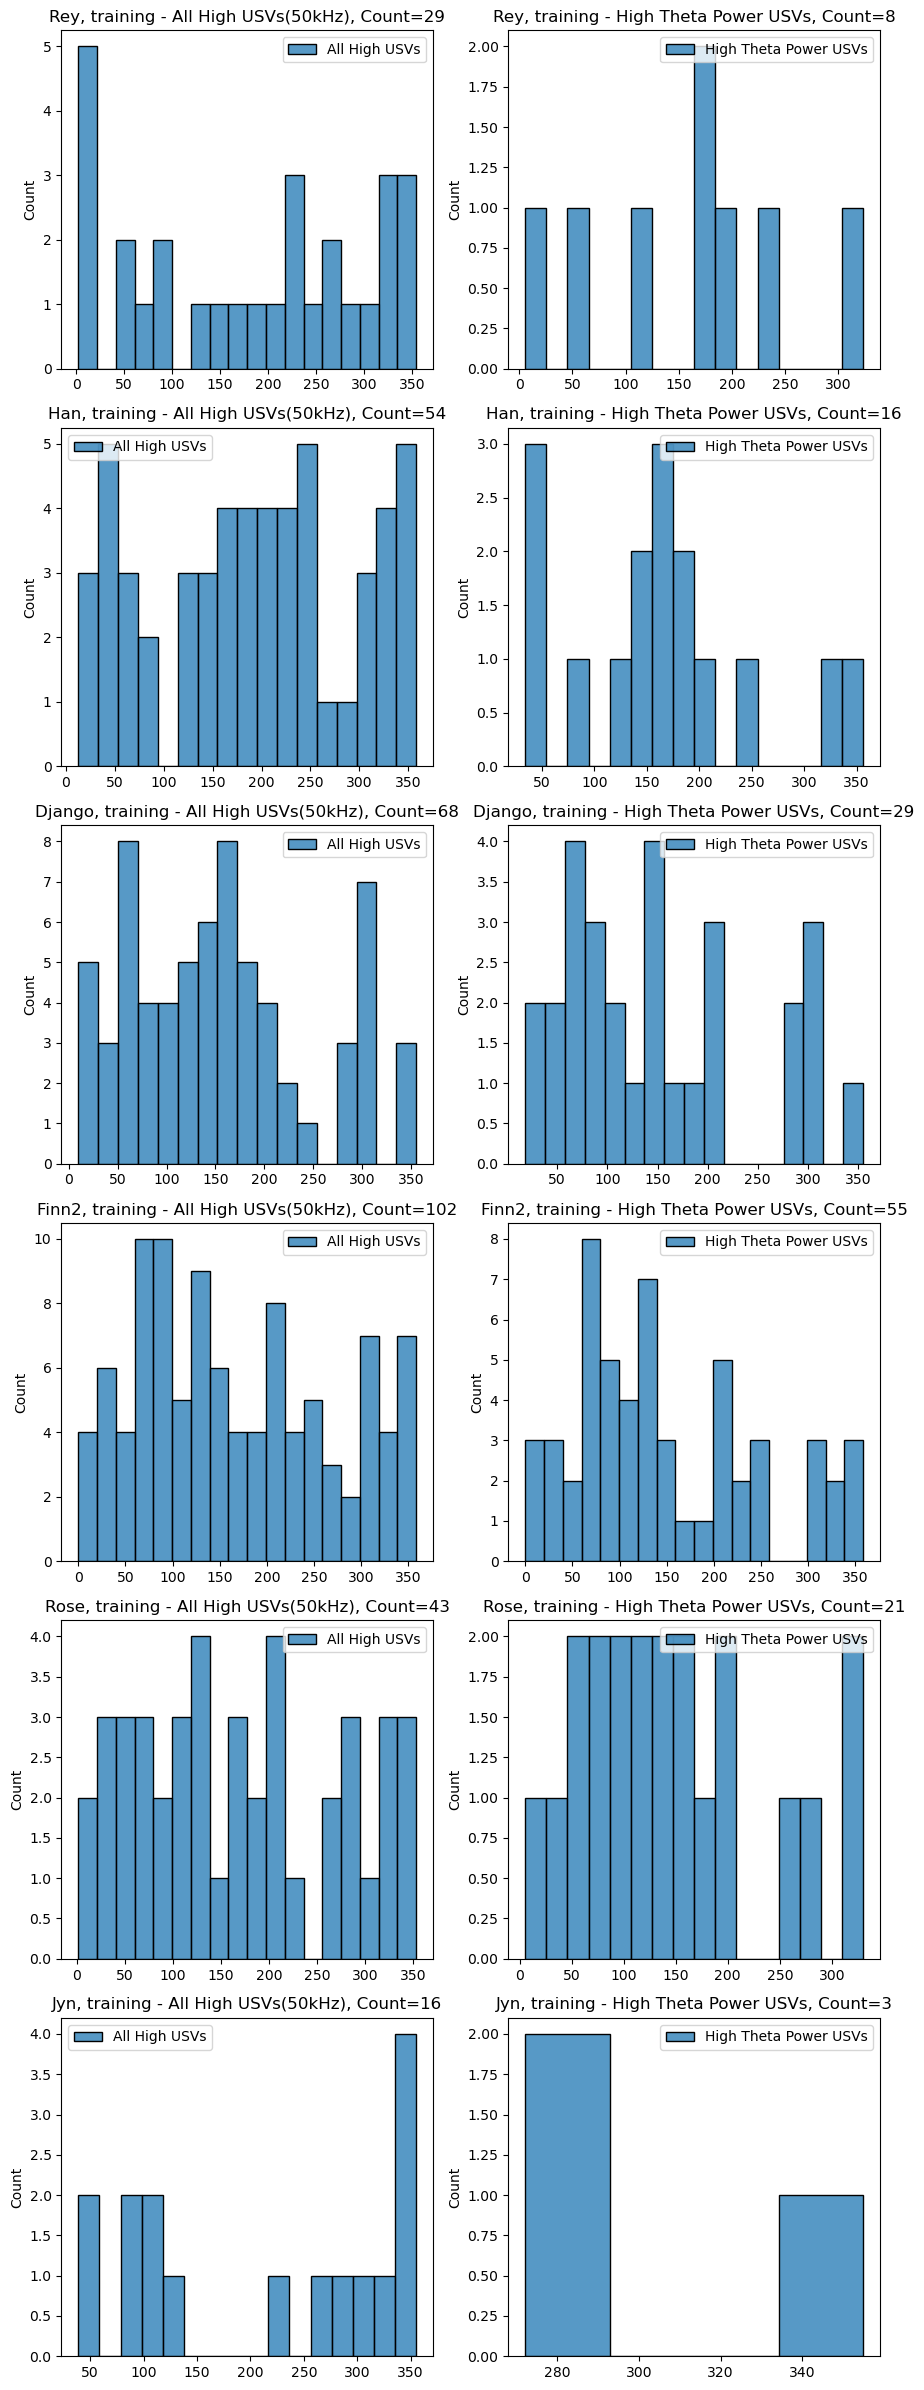

In [26]:
#High usv all animal stop
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

theta_thresh = 0

# Assuming training_sessions and rec_list are defined
fig, ax = plt.subplots(len(training_sessions), 2, figsize=(9, 4*len(training_sessions)))
if len(training_sessions) == 1:
    ax = [ax]

for idx, ((animal, sess_name), sess) in enumerate(zip(training_sessions, rec_list)):
    # Determine which columns to use for stop and stop times
    if "t_stop_eeg" in sess.usv_epochs.to_dataframe().columns:
        stop_key = "t_stop_eeg"
    else:
        stop_key = "stop"

    highusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min > 23]
    # Use the determined key for stop times
    highusv_stop_frames = (highusv_epochs[stop_key] * sess.tparams.fs).astype(int).values

    highusv_stop_theta_power = sess.theta_power[highusv_stop_frames]
    highusv_high_usv_power_bool = highusv_stop_theta_power > theta_thresh
    highusv_high_theta_usv_stop_frames = highusv_stop_frames[highusv_high_usv_power_bool]

    highusv_phase_stop = sess.tparams.angle[highusv_stop_frames]
    highusv_high_theta_phase_stop = sess.tparams.angle[highusv_high_theta_usv_stop_frames]

    # Use the correct index for ax when multiple rows exist
    current_ax = ax[idx] if len(training_sessions) > 1 else ax

    sns.histplot(highusv_phase_stop, binwidth=20, ax=current_ax[0], label='All High USVs')
    sns.histplot(highusv_high_theta_phase_stop, binwidth=20, ax=current_ax[1], label='High Theta Power USVs')
    
    current_ax[0].legend()
    current_ax[1].legend()
    current_ax[0].set_title(f'{animal}, {sess_name} - All High USVs(50kHz), Count={len(highusv_phase_stop)}')
    current_ax[1].set_title(f'{animal}, {sess_name} - High Theta Power USVs, Count={len(highusv_high_theta_phase_stop)}')

plt.tight_layout()
plt.show()
fig.savefig('/home/bowenw/Documents/thesisplots/Phase analysis high_usv_phase_change_stop.png')

## Theta phase at 50kHz USV start aggregate

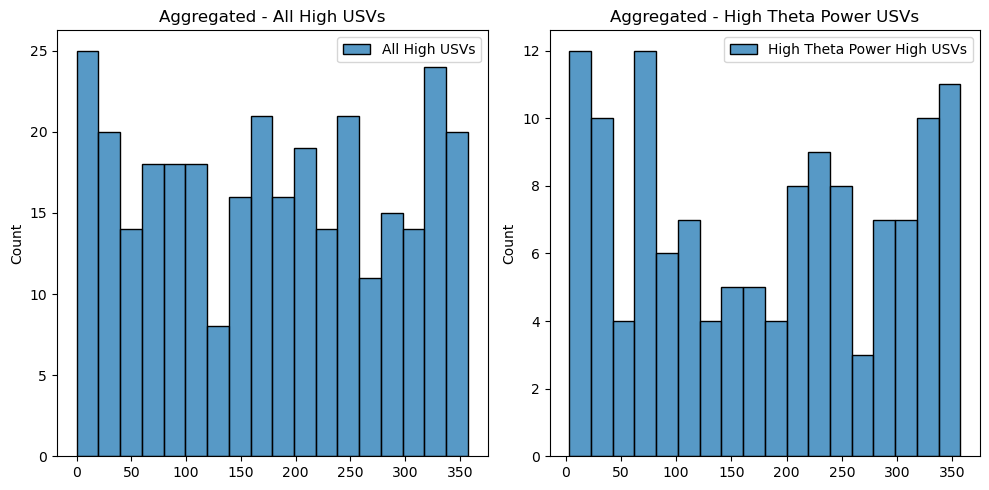

In [27]:
#Aggregate all animal high USVs start
%matplotlib inline
theta_thresh = 0  
all_highusv_phase_start = []
high_theta_power_highusv_phase_start = []

for idx, ((animal, sess_name), sess) in enumerate(zip(training_sessions, rec_list)):
    # Determine which columns to use for start and stop times
    if "t_start_eeg" in sess.usv_epochs.to_dataframe().columns:
        start_key = "t_start_eeg"
    else:
        start_key = "start"

    highusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min > 23]
    # Use the determined key for start times
    highusv_start_frames = (highusv_epochs[start_key] * sess.tparams.fs).astype(int).values

    highusv_start_theta_power = sess.theta_power[highusv_start_frames]
    highusv_high_usv_power_bool = highusv_start_theta_power > theta_thresh
    highusv_high_theta_usv_start_frames = highusv_start_frames[highusv_high_usv_power_bool]

    highusv_phase_start = sess.tparams.angle[highusv_start_frames]
    highusv_high_theta_phase_start = sess.tparams.angle[highusv_high_theta_usv_start_frames]

    
    all_highusv_phase_start.extend(highusv_phase_start)
    high_theta_power_highusv_phase_start.extend(highusv_high_theta_phase_start)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(all_highusv_phase_start, binwidth=20, ax=ax[0], label='All High USVs')
sns.histplot(high_theta_power_highusv_phase_start, binwidth=20, ax=ax[1], label='High Theta Power High USVs')

ax[0].legend()
ax[1].legend()
ax[0].set_title('Aggregated - All High USVs')
ax[1].set_title('Aggregated - High Theta Power USVs')

plt.tight_layout()
plt.show()
fig.savefig('/home/bowenw/Documents/thesisplots/Phase analysis high_usv_phase_change_aggregated_start.png')

## Theta phase at 50kHz USV stop aggregate

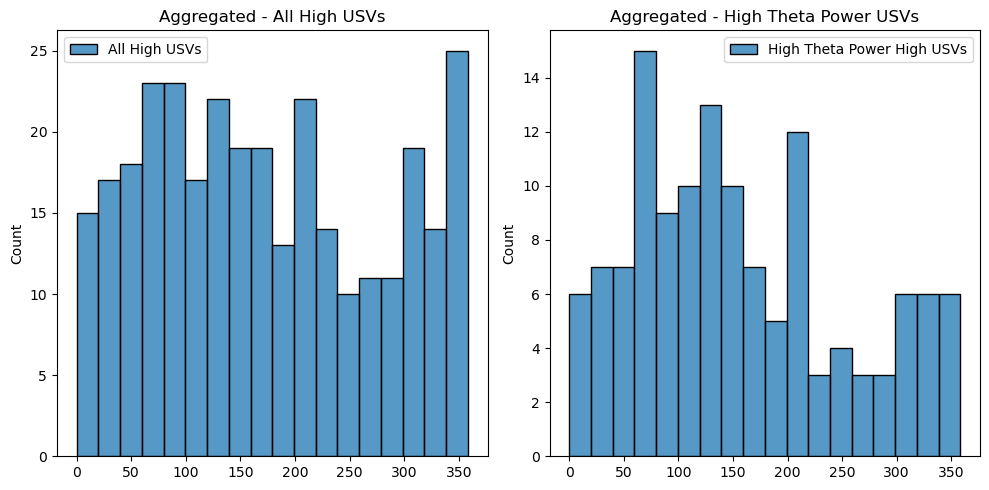

In [28]:
#Aggregate all animal high USVs stop
%matplotlib inline
theta_thresh = 0  
all_highusv_phase_stop = []
high_theta_power_highusv_phase_stop = []

for idx, ((animal, sess_name), sess) in enumerate(zip(training_sessions, rec_list)):
    # Determine which columns to use for stop and stop times
    if "t_stop_eeg" in sess.usv_epochs.to_dataframe().columns:
        stop_key = "t_stop_eeg"
    else:
        stop_key = "stop"

    highusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min > 23]
    # Use the determined key for stop times
    highusv_stop_frames = (highusv_epochs[stop_key] * sess.tparams.fs).astype(int).values

    highusv_stop_theta_power = sess.theta_power[highusv_stop_frames]
    highusv_high_usv_power_bool = highusv_stop_theta_power > theta_thresh
    highusv_high_theta_usv_stop_frames = highusv_stop_frames[highusv_high_usv_power_bool]

    highusv_phase_stop = sess.tparams.angle[highusv_stop_frames]
    highusv_high_theta_phase_stop = sess.tparams.angle[highusv_high_theta_usv_stop_frames]

    
    all_highusv_phase_stop.extend(highusv_phase_stop)
    high_theta_power_highusv_phase_stop.extend(highusv_high_theta_phase_stop)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(all_highusv_phase_stop, binwidth=20, ax=ax[0], label='All High USVs')
sns.histplot(high_theta_power_highusv_phase_stop, binwidth=20, ax=ax[1], label='High Theta Power High USVs')

ax[0].legend()
ax[1].legend()
ax[0].set_title('Aggregated - All High USVs')
ax[1].set_title('Aggregated - High Theta Power USVs')

plt.tight_layout()
plt.show()
fig.savefig('/home/bowenw/Documents/thesisplots/Phase analysis high_usv_phase_change_aggregated_stop.png')

In [29]:
print(f"Total number of low USVs: {len(all_highusv_phase_start)}")
print(f"Number of low USVs with high theta power: {len(high_theta_power_highusv_phase_start)}")

Total number of low USVs: 312
Number of low USVs with high theta power: 132


In [30]:
print(f"Total number of low USVs: {len(all_highusv_phase_stop)}")
print(f"Number of low USVs with high theta power: {len(high_theta_power_highusv_phase_stop)}")

Total number of low USVs: 312
Number of low USVs with high theta power: 132


## Theta phase at 22kHz USV start

skip plotting
skip plotting


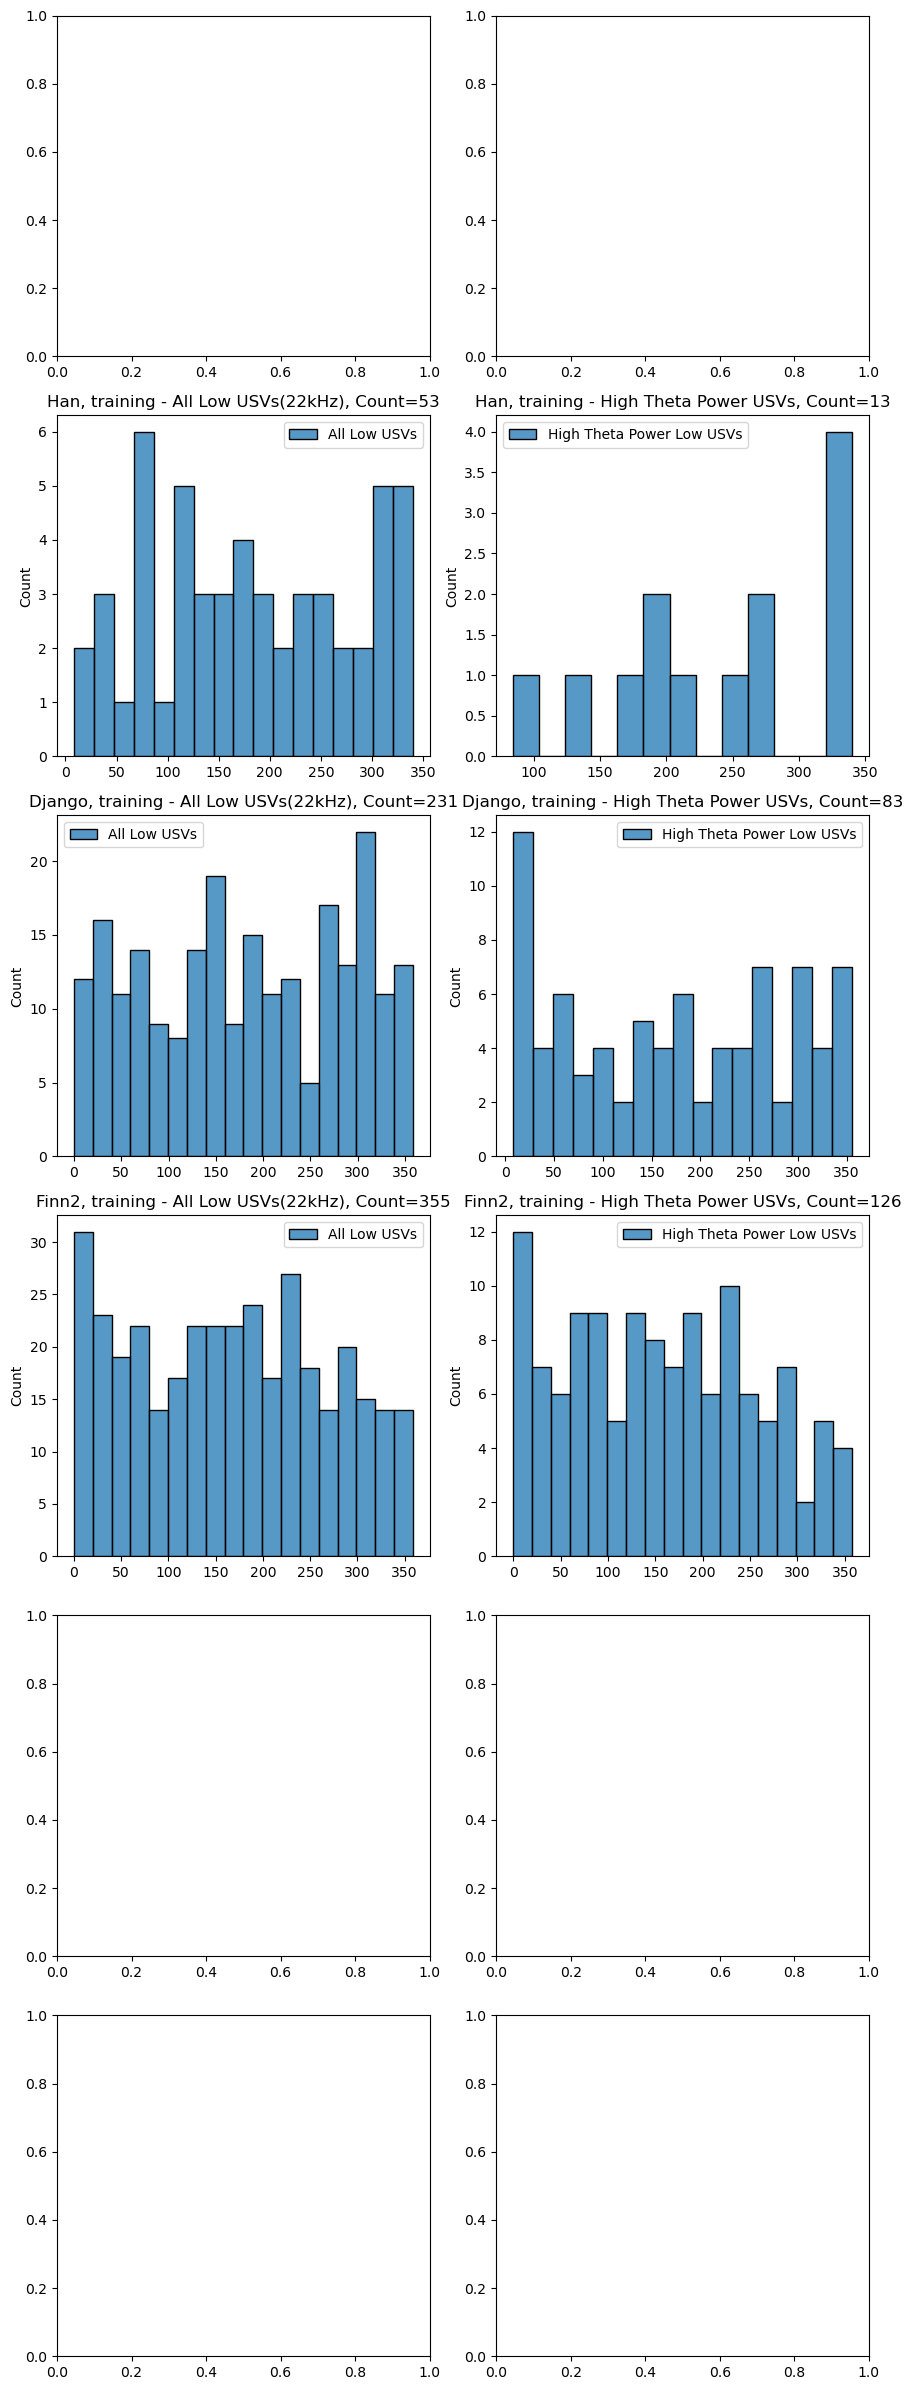

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

theta_thresh = 0
fig, ax = plt.subplots(len(training_sessions), 2, figsize=(9, 4*len(training_sessions)))

for (animal, sess_name), sess, a in zip(training_sessions, rec_list, ax):

  low_usvs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min <= 23]
  if low_usvs.shape[0] > 0:
      
     lowusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min <= 23]
     if "t_start_eeg" in sess.usv_epochs.to_dataframe().columns:
        lowusv_start_frames = (lowusv_epochs.t_start_eeg * sess.tparams.fs).astype(int).values
     else:
        lowusv_start_frames = (lowusv_epochs.start * sess.tparams.fs).astype(int).values

     lowusv_start_theta_power = sess.theta_power[lowusv_start_frames]

     lowusv_high_usv_power_bool = lowusv_start_theta_power > theta_thresh
     lowusv_high_theta_usv_start_frames = lowusv_start_frames[lowusv_high_usv_power_bool]

     lowusv_phase_start = sess.tparams.angle[lowusv_start_frames]
     lowusv_high_theta_phase_start = sess.tparams.angle[lowusv_high_theta_usv_start_frames]
      
     if len(lowusv_high_theta_phase_start) > 1:
       sns.histplot(lowusv_phase_start, binwidth=20, ax=a[0], label='All Low USVs')
       sns.histplot(lowusv_high_theta_phase_start, binwidth=20, ax=a[1], label='High Theta Power Low USVs')
       a[0].legend()
       a[1].legend()
       a[0].set_title(f'{animal}, {sess_name} - All Low USVs(22kHz), Count={len(lowusv_phase_start)}')
       a[1].set_title(f'{animal}, {sess_name} - High Theta Power USVs, Count={len(lowusv_high_theta_phase_start)}')

  else:
     print('skip plotting')
  pass


plt.tight_layout()
plt.show()
fig.savefig('/home/bowenw/Documents/thesisplots/Phase analysis low_usv_phase_change_start.png')

## Theta phase at 22kHz USV stop

skip plotting
skip plotting


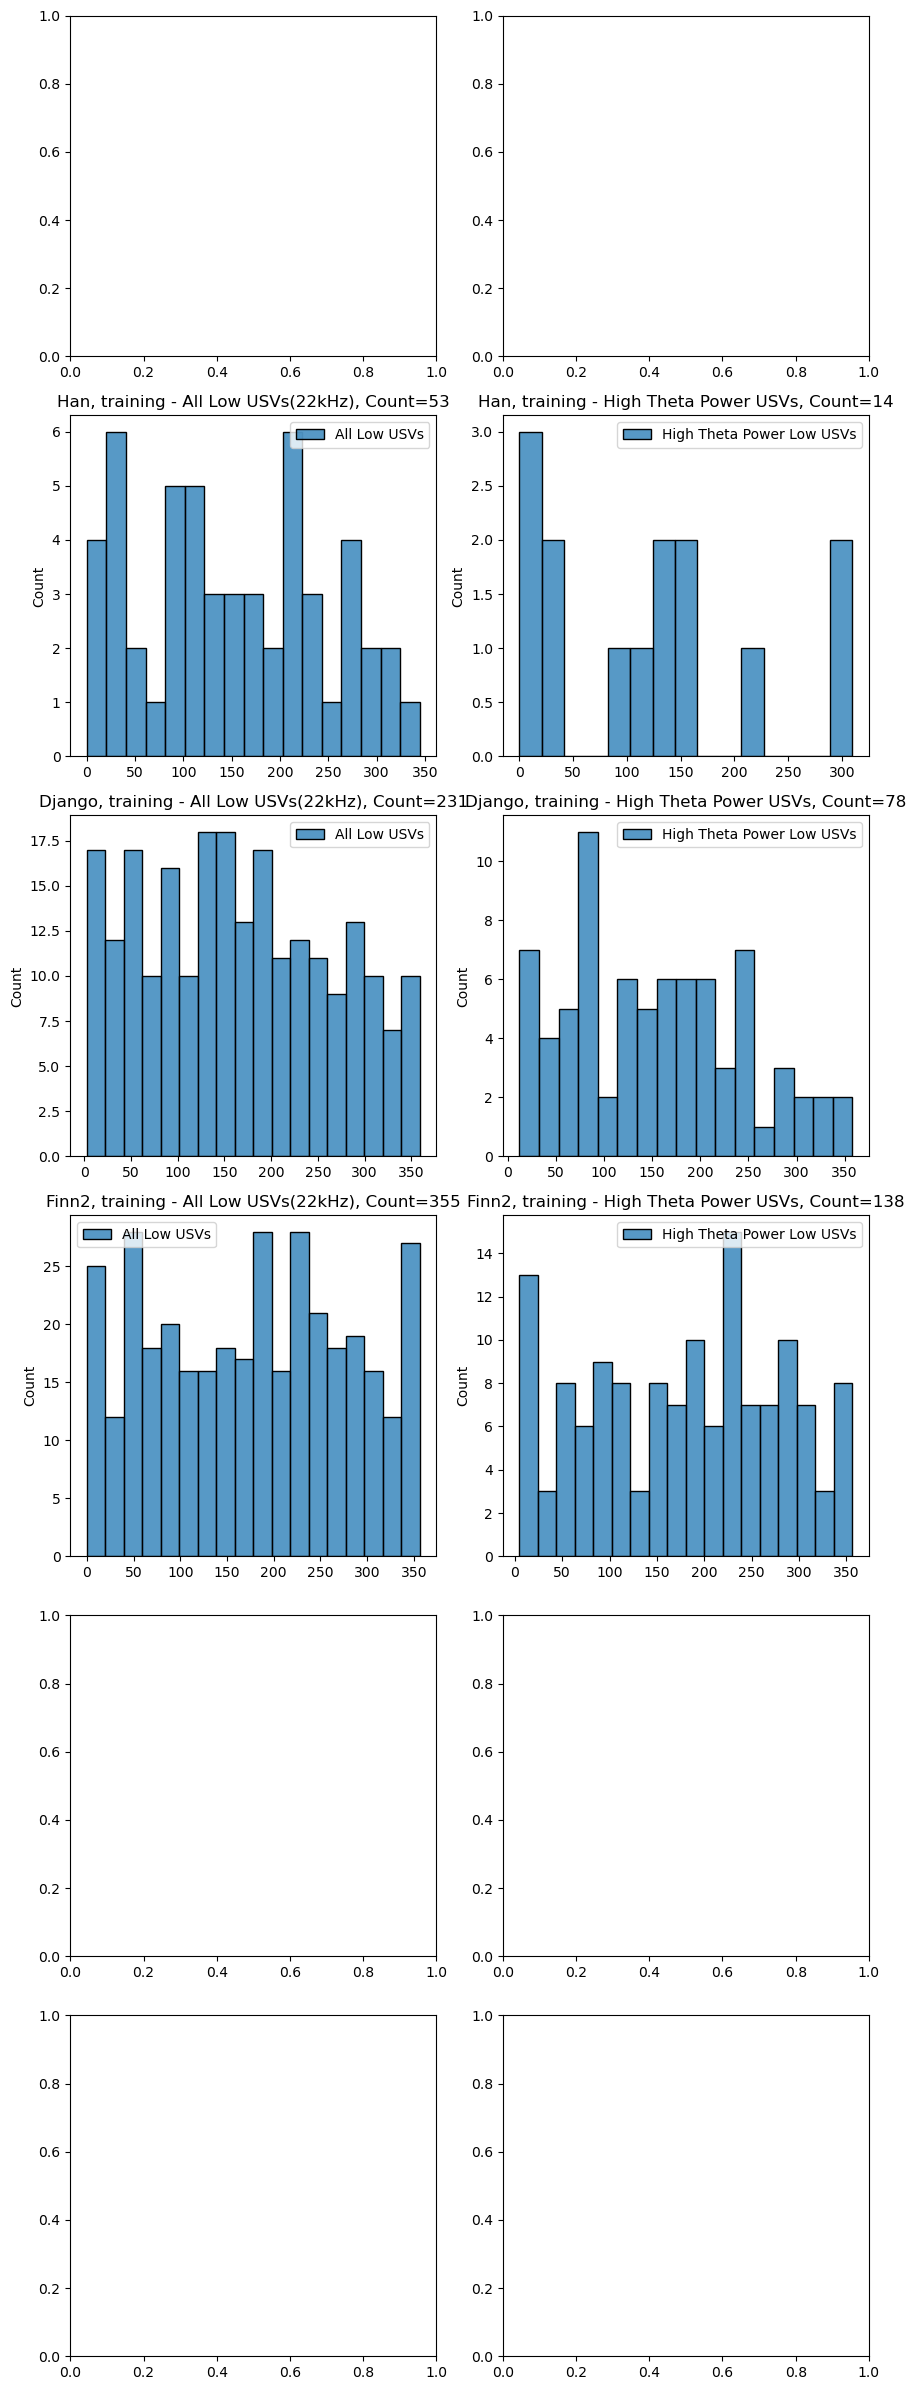

In [32]:
#All animal low USVs stop
%matplotlib inline
theta_thresh = 0
fig, ax = plt.subplots(len(training_sessions), 2, figsize=(9, 4*len(training_sessions)))

for (animal, sess_name), sess, a in zip(training_sessions, rec_list, ax):
  low_usvs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min <= 23]
  if low_usvs.shape[0] > 0:
     lowusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min <= 23]
     if "t_stop_eeg" in sess.usv_epochs.to_dataframe().columns:
        lowusv_stop_frames = (lowusv_epochs.t_stop_eeg * sess.tparams.fs).astype(int).values
     else:
        lowusv_stop_frames = (lowusv_epochs.stop * sess.tparams.fs).astype(int).values
     lowusv_stop_theta_power = sess.theta_power[lowusv_stop_frames]

     lowusv_high_usv_power_bool = lowusv_stop_theta_power > theta_thresh
     lowusv_high_theta_usv_stop_frames = lowusv_stop_frames[lowusv_high_usv_power_bool]

     lowusv_phase_stop = sess.tparams.angle[lowusv_stop_frames]
     lowusv_high_theta_phase_stop = sess.tparams.angle[lowusv_high_theta_usv_stop_frames]
      
     if len(lowusv_high_theta_phase_stop) > 1:
       sns.histplot(lowusv_phase_stop, binwidth=20, ax=a[0], label='All Low USVs')
       sns.histplot(lowusv_high_theta_phase_stop, binwidth=20, ax=a[1], label='High Theta Power Low USVs')
       a[0].legend()
       a[1].legend()
       a[0].set_title(f'{animal}, {sess_name} - All Low USVs(22kHz), Count={len(lowusv_phase_stop)}')
       a[1].set_title(f'{animal}, {sess_name} - High Theta Power USVs, Count={len(lowusv_high_theta_phase_stop)}')

  else:
     print('skip plotting')
  pass


plt.tight_layout()
plt.show()
fig.savefig('/home/bowenw/Documents/thesisplots/Phase analysis low_usv_phase_change_stop.png')

## Theta phase at 22kHz USV start aggregate

Rose, training has no low USVs
Jyn, training has no low USVs


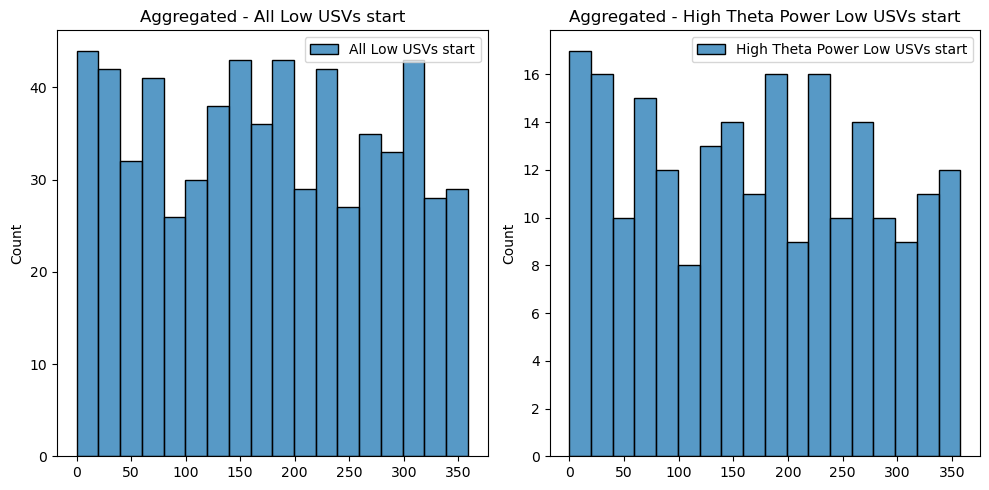

In [33]:
#Aggregate all animal low USVs start
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

theta_thresh = 0
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
all_lowusv_phase_start = []
high_theta_power_lowusv_phase_start = []

for (animal, sess_name), sess in zip(training_sessions, rec_list):
    # Determine the correct column to use for start times
    if "t_start_eeg" in sess.usv_epochs.to_dataframe().columns:
        start_key = "t_start_eeg"
    else:
        start_key = "start"
    
    lowusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min <= 23]
    if not lowusv_epochs.empty:
        lowusv_start_frames = (lowusv_epochs[start_key] * sess.tparams.fs).astype(int).values

        lowusv_start_theta_power = sess.theta_power[lowusv_start_frames]
        lowusv_high_usv_power_bool = lowusv_start_theta_power > theta_thresh
        lowusv_high_theta_usv_start_frames = lowusv_start_frames[lowusv_high_usv_power_bool]

        lowusv_phase_start = sess.tparams.angle[lowusv_start_frames]
        lowusv_high_theta_phase_start = sess.tparams.angle[lowusv_high_theta_usv_start_frames]

        all_lowusv_phase_start.extend(lowusv_phase_start.tolist())
        high_theta_power_lowusv_phase_start.extend(lowusv_high_theta_phase_start.tolist())
    else:
        print(f'{animal}, {sess_name} has no low USVs')

# Plotting
sns.histplot(all_lowusv_phase_start, binwidth=20, ax=ax[0], label='All Low USVs start')
sns.histplot(high_theta_power_lowusv_phase_start, binwidth=20, ax=ax[1], label='High Theta Power Low USVs start')

ax[0].legend()
ax[1].legend()
ax[0].set_title('Aggregated - All Low USVs start')
ax[1].set_title('Aggregated - High Theta Power Low USVs start')

plt.tight_layout()
plt.show()
fig.savefig('/home/bowenw/Documents/thesisplots/Phase analysis low_usv_phase_change_aggregated_start.png')

In [34]:
print(f"Total number of low USVs: {len(all_lowusv_phase_start)}")
print(f"Number of low USVs with high theta power: {len(high_theta_power_lowusv_phase_start)}")

Total number of low USVs: 641
Number of low USVs with high theta power: 223


## Theta phase at 22kHz USV stop aggregate

Rose, training has no low USVs
Jyn, training has no low USVs


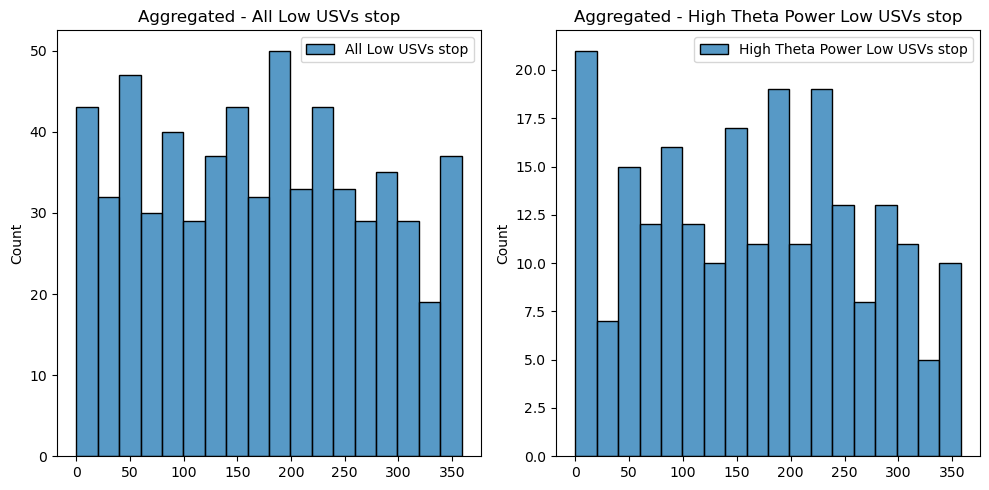

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

theta_thresh = 0
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
all_lowusv_phase_stop = []  # List to hold all low USV stop phases
high_theta_power_lowusv_phase_stop = []  # List to hold high theta power low USV stop phases

for (animal, sess_name), sess in zip(training_sessions, rec_list):
    # Determine the correct columns for start and stop times
    if "t_stop_eeg" in sess.usv_epochs.to_dataframe().columns:
        stop_key = "t_stop_eeg"
    else:
        stop_key = "stop"
    
    lowusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min <= 23]
    if not lowusv_epochs.empty:
        # Calculate stop frames using the correct key
        lowusv_stop_frames = (lowusv_epochs[stop_key] * sess.tparams.fs).astype(int).values

        lowusv_stop_theta_power = sess.theta_power[lowusv_stop_frames]
        lowusv_high_usv_power_bool = lowusv_stop_theta_power > theta_thresh
        lowusv_high_theta_usv_stop_frames = lowusv_stop_frames[lowusv_high_usv_power_bool]

        # Extract phase information at low USV stops
        lowusv_phase_stop = sess.tparams.angle[lowusv_stop_frames]
        lowusv_high_theta_phase_stop = sess.tparams.angle[lowusv_high_theta_usv_stop_frames]

        all_lowusv_phase_stop.extend(lowusv_phase_stop.tolist())
        high_theta_power_lowusv_phase_stop.extend(lowusv_high_theta_phase_stop.tolist())
    else:
        print(f'{animal}, {sess_name} has no low USVs')

# Plotting
sns.histplot(all_lowusv_phase_stop, binwidth=20, ax=ax[0], label='All Low USVs stop')
sns.histplot(high_theta_power_lowusv_phase_stop, binwidth=20, ax=ax[1], label='High Theta Power Low USVs stop')

ax[0].legend()
ax[1].legend()
ax[0].set_title('Aggregated - All Low USVs stop')
ax[1].set_title('Aggregated - High Theta Power Low USVs stop')

plt.tight_layout()
plt.show()
fig.savefig('/home/bowenw/Documents/thesisplots/Phase analysis low_usv_phase_change_aggregated_stop.png')

In [36]:
# #Aggregate all animal low USVs stop
# %matplotlib inline
# theta_thresh = 0
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# all_lowusv_phase_stop = []
# high_theta_power_lowusv_phase_stop = []

# for (animal, sess_name), sess in zip(training_sessions, rec_list):
#     lowusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min <= 23]
#     if not lowusv_epochs.empty:  
#         lowusv_stop_frames = (lowusv_epochs.stop * sess.tparams.fs).astype(int).values

#         lowusv_stop_theta_power = sess.theta_power[lowusv_stop_frames]

#         lowusv_high_usv_power_bool = lowusv_stop_theta_power > theta_thresh
#         lowusv_high_theta_usv_stop_frames = lowusv_stop_frames[lowusv_high_usv_power_bool]

#         lowusv_phase_stop = sess.tparams.angle[lowusv_stop_frames]
#         lowusv_high_theta_phase_stop = sess.tparams.angle[lowusv_high_theta_usv_stop_frames]

#         all_lowusv_phase_stop.extend(lowusv_phase_stop.tolist()) 
#         high_theta_power_lowusv_phase_stop.extend(lowusv_high_theta_phase_stop.tolist())
#     else:
#         print(f'{animal}, {sess_name} has no low USVs')

# sns.histplot(all_lowusv_phase_stop, binwidth=20, ax=ax[0], label='All Low USVs stop')
# sns.histplot(high_theta_power_lowusv_phase_stop, binwidth=20, ax=ax[1], label='High Theta Power Low USVs stop')

# ax[0].legend()
# ax[1].legend()
# ax[0].set_title('Aggregated - All Low USVs stop')
# ax[1].set_title('Aggregated - High Theta Power Low USVs stop')

# plt.tight_layout()
# plt.show()
# fig.savefig('/home/bowenw/Documents/thesisplots/Phase analysis low_usv_phase_change_aggregated_stop.png')

In [37]:
print(f"Total number of low USVs: {len(all_lowusv_phase_stop)}")
print(f"Number of low USVs with high theta power: {len(high_theta_power_lowusv_phase_stop)}")

Total number of low USVs: 641
Number of low USVs with high theta power: 230


# Reload the data in (or the followinng codes can't access sess.)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os
from pathlib import Path
import platform
# Comment here to add in for either mac or linux computer
if platform.system() == "Linux":   # for linux
    sys.path.extend(['/data/GitHub/NeuroPy']) 
    sys.path.extend(['/data/GitHub/TraceFC/'])
elif platform.system() == "Darwin":
    sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/NeuroPy'])
    sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/TraceFC'])
elif platform.system() == "Windows":
    print('No windows repositories defined')

from neuropy import core
from neuropy.io import (optitrackio,
                        dlcio,
                        )
from neuropy.io.miniscopeio import MiniscopeIO
from neuropy.core import Epoch
from neuropy.utils import plot_util
from neuropy.utils.signal_process import WaveletSg
from neuropy.plotting.spikes import plot_raster, plot_binned_raster
from neuropy.plotting.signals import plot_signal_w_epochs, plot_spectrogram

from tracefc.io.session_directory import get_session_dir
from neuropy.utils.signal_process import hilbert_amplitude_stat, theta_phase_specfic_extraction, ThetaParams
from neuropy.analyses.oscillations import detect_theta_epochs
from tracefc.io.traceio import load_trace_events, trace_ttl_to_openephys
import neuropy.io.openephysio as oeio

from neuropy.core.session import ProcessData
    
def sess_use(basepath=os.getcwd()):

    return ProcessData(basepath)

Best channel for theta: [26]
1144 epochs remaining with durations within (1,20)
No matching events found. Try increasing assumed lag in "ttl_lag" param
No matching events found. Try increasing assumed lag in "ttl_lag" param
start time = 2022-05-09 12:06:13.678315-04:00
start time = 2022-05-09 12:15:08.781851-04:00
start time = 2022-05-09 12:33:20.854076-04:00
start time = 2022-05-09 12:39:03.160744-04:00
start time = 2022-05-09 12:48:12.124560-04:00
start time = 2022-05-09 12:54:42.702826-04:00
start time = 2022-05-09 13:04:08.630558-04:00
start time = 2022-05-09 13:58:51.401140-04:00
start time = 2022-05-09 14:08:35.718726-04:00
start time = 2022-05-09 16:10:53.170647-04:00
Best channel for theta: [8]
960 epochs remaining with durations within (1,20)
start time lag: mean = -0.5394885366666666, std = 0.2466135352632615
start time lag: mean = -0.539772271, std = 0.24672374012407294
start time = 2022-08-03 12:25:29.361157-04:00


/data/GitHub/TraceFC/tracefc/io/traceio.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trace_cs_sync_df.loc[:, "datetimes"] = trace_cs_sync_df["datetimes"].dt.tz_localize(


start time = 2022-08-03 12:28:50.720333-04:00
start time = 2022-08-03 12:35:21.719327-04:00
start time = 2022-08-03 12:53:02.683128-04:00
start time = 2022-08-03 12:56:48.234187-04:00
start time = 2022-08-03 13:10:55.680961-04:00
start time = 2022-08-03 13:14:13.174881-04:00
start time = 2022-08-03 13:16:44.696588-04:00
start time = 2022-08-03 13:35:23.930035-04:00
start time = 2022-08-03 14:25:45.955674-04:00
start time = 2022-08-03 14:34:34.738770-04:00
start time = 2022-08-03 15:19:53.342091-04:00
start time = 2022-08-03 15:42:32.218764-04:00
Best channel for theta: [59]
1511 epochs remaining with durations within (1,20)
start time lag: mean = -0.6581839184999999, std = 0.00022231442728690363
start time lag: mean = -0.6583483478333333, std = 0.00022896530483146918
start time = 2023-03-08 12:02:43-05:00


/data/GitHub/TraceFC/tracefc/io/traceio.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trace_cs_sync_df.loc[:, "datetimes"] = trace_cs_sync_df["datetimes"].dt.tz_localize(


start time = 2023-03-08 12:15:15-05:00
start time = 2023-03-08 12:51:35-05:00
start time = 2023-03-08 13:45:07-05:00
start time = 2023-03-08 14:44:52-05:00
start time = 2023-03-08 17:42:37-05:00
Best channel for theta: [7]
1502 epochs remaining with durations within (1,20)
start time lag: mean = -0.40930200366666664, std = 0.0012269775854382478
start time lag: mean = -0.40964181983333336, std = 0.0012354090779131128
start time = 2023-05-08 11:54:10-04:00
start time = 2023-05-08 12:04:32-04:00


/data/GitHub/TraceFC/tracefc/io/traceio.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trace_cs_sync_df.loc[:, "datetimes"] = trace_cs_sync_df["datetimes"].dt.tz_localize(


start time = 2023-05-08 12:41:12-04:00
start time = 2023-05-08 14:15:17-04:00
start time = 2023-05-08 15:12:40-04:00
Best channel for theta: [25]
1304 epochs remaining with durations within (1,20)
start time lag: mean = -0.6511317885, std = 0.29458161267510247
start time lag: mean = -0.6514769363333334, std = 0.294484481800417


/data/GitHub/TraceFC/tracefc/io/traceio.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trace_cs_sync_df.loc[:, "datetimes"] = trace_cs_sync_df["datetimes"].dt.tz_localize(


start time = 2022-06-22 12:13:44.331483-04:00
start time = 2022-06-22 12:25:48.054692-04:00
start time = 2022-06-22 12:35:27.787169-04:00
start time = 2022-06-22 13:03:02.922202-04:00
start time = 2022-06-22 13:10:06.192484-04:00
start time = 2022-06-22 13:54:58.035938-04:00
start time = 2022-06-22 14:54:42.076759-04:00
start time = 2022-06-22 15:35:41.591063-04:00
start time = 2022-06-22 15:41:43.879391-04:00
start time = 2022-06-22 16:07:27.767686-04:00
Best channel for theta: [18]
831 epochs remaining with durations within (1,20)
start time lag: mean = -0.7076860578333334, std = 0.0010682421575040585
start time lag: mean = -0.7078422188333332, std = 0.0010084827325533058
start time = 2022-06-17 11:49:35.167771-04:00


/data/GitHub/TraceFC/tracefc/io/traceio.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trace_cs_sync_df.loc[:, "datetimes"] = trace_cs_sync_df["datetimes"].dt.tz_localize(


start time = 2022-06-17 11:59:21.708710-04:00
start time = 2022-06-17 12:36:31.859416-04:00
start time = 2022-06-17 15:27:42.768667-04:00
start time = 2022-06-17 12:36:31.859416-04:00
start time = 2022-06-17 13:00:21.503381-04:00
start time = 2022-06-17 13:41:54.130737-04:00
start time = 2022-06-17 13:54:57.288518-04:00
start time = 2022-06-17 14:01:14.359765-04:00
start time = 2022-06-17 14:04:58.639594-04:00
start time = 2022-06-17 14:26:31.373293-04:00
start time = 2022-06-17 14:35:21.609805-04:00
start time = 2022-06-17 14:35:21.609805-04:00
start time = 2022-06-17 14:35:21.609805-04:00
start time = 2022-06-17 15:19:01.281248-04:00


[ProcessData(Rey_training_denoised.xml),
 ProcessData(Han_training.xml),
 ProcessData(Django_training_denoised.xml),
 ProcessData(Finn2_training_denoised.xml),
 ProcessData(Rose_training_denoised.xml),
 ProcessData(Jyn_training_denoised.xml)]

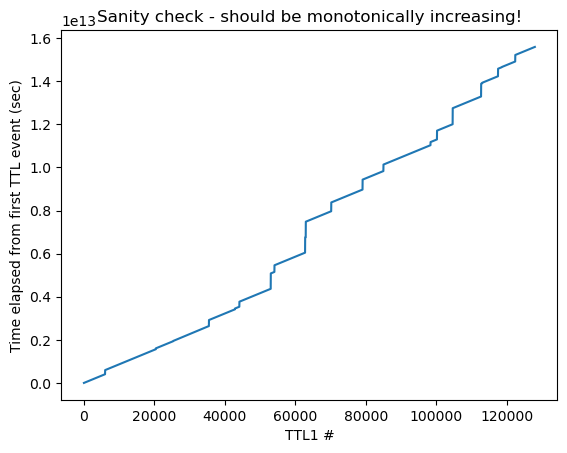

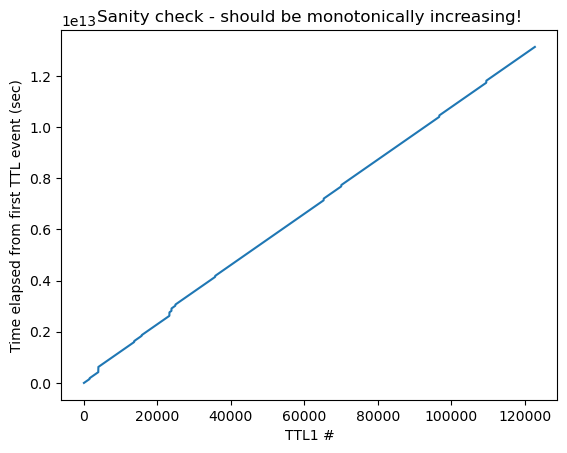

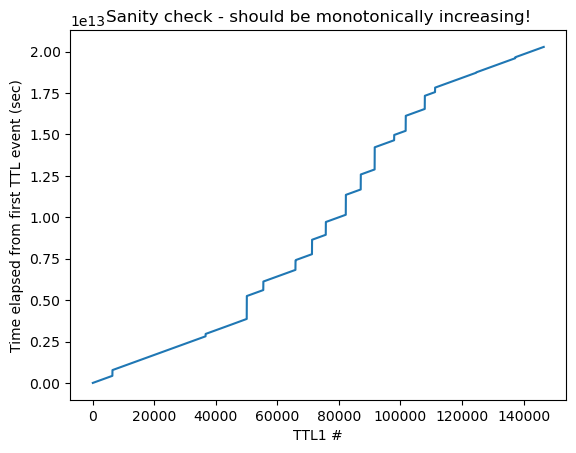

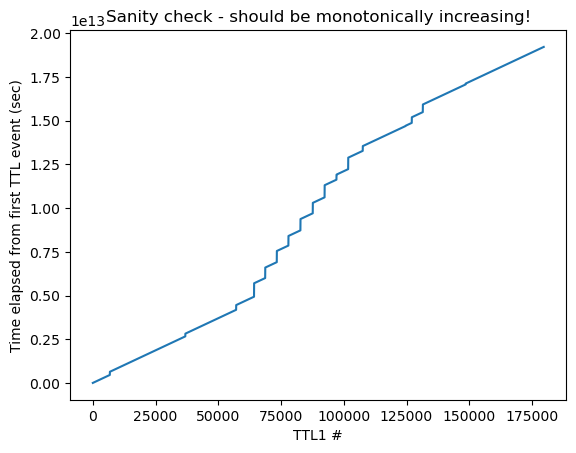

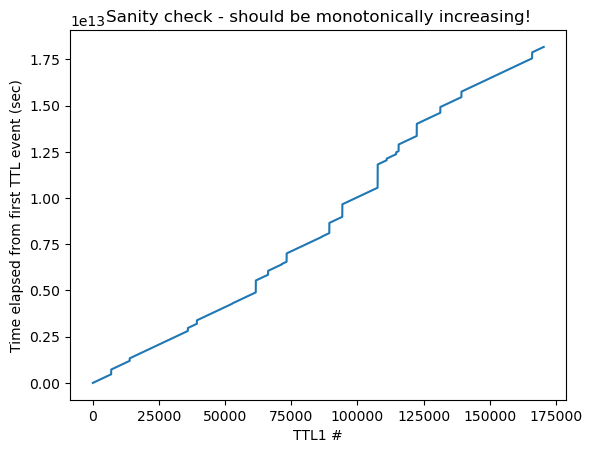

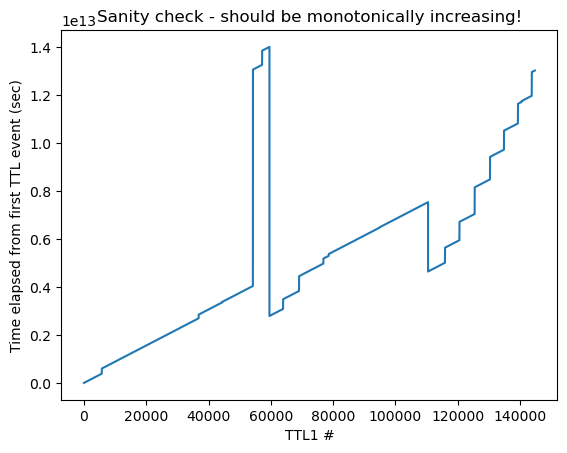

In [39]:

#Loop through and load in artifacts, signal, and do theta wavelet
training_sessions = [['Rey', 'training'],['Han','training'],['Django', 'training'], ['Finn2', 'training'], 
                     ['Rose', 'training'], ['Jyn','training']]
theta_channels = [26, 8, 59, 7, 25, 18]
theta_range = np.arange(4, 14, 0.25)
rec_list = []
ttl_lag_use = 0.8

for (animal, sess_name), theta_channel in zip(training_sessions, theta_channels):
#for (animal, sess_name), theta_channel in zip([training_sessions[1]], theta_channels):
    
    sess_dir = get_session_dir(animal, sess_name)
    sess = sess_use(sess_dir)
    sess.animal = animal
    sess.sess_name = sess_name
    art_epochs_file = sess.filePrefix.with_suffix(".art_epochs.npy")
    sess.signal = sess.eegfile.get_signal()
    sess.art_epochs = Epoch(epochs=None, file=art_epochs_file)
    # signal = sess.eegfile.get_signal()
    sess.tparams = ThetaParams(lfp=sess.signal.traces[theta_channel, :], fs=sess.signal.sampling_rate, method="waveshape")
    signal_use = sess.signal.time_slice(channel_id=theta_channel)
    # sess.wv_theta = WaveletSg(sess.signal.time_slice(channel_id=theta_channel, t_stop=np.min((80*60, signal_use.t_stop))), 
    #                           freqs=theta_range, sigma=None)
    theta_epochs, theta_power = detect_theta_epochs(signal_use, probegroup=None, mindur=1, maxdur=20, thresh=(1, None), 
                                                    edge_cutoff=0.25, ignore_epochs=sess.art_epochs, return_power=True)
    sess.theta_power = theta_power
    sess.theta_epochs = theta_epochs
    usv_epochs_file = sess.filePrefix.with_suffix(".usv_epochs.npy")
    usv_epochs = Epoch(epochs=None, file=usv_epochs_file)
    sess.usv_epochs = usv_epochs

    ripple_epochs_file = sess.filePrefix.with_suffix(".ripple_epochs.npy")
    sess.ripple_epochs = Epoch(epochs=None, file=ripple_epochs_file)

    cs_plus_events = {} 
    cs_starts, cs_stops, _ = load_trace_events(sess_dir, session_type="training", event_type="CS+", return_df=True)

    ttl_df = oeio.load_all_ttl_events(sess.basepath, sanity_check_channel=1, zero_timestamps=True)
    
    ttl_lag_use = pd.Timedelta(0.8, unit="seconds")
    cs_oe_start_df = trace_ttl_to_openephys(cs_starts, 
                                      ttl_df[ttl_df['channel_states'].abs() == 2], 
                                      ttl_lag=ttl_lag_use)
    cs_oe_stop_df = trace_ttl_to_openephys(cs_stops, 
                                  ttl_df[ttl_df['channel_states'].abs() == 2], 
                                  ttl_lag=ttl_lag_use)
    
    # cs_plus_events = (cs_starts, cs_stops)  
    sess.sync_df = oeio.create_sync_df(sess.basepath)
    cs_starts_combined = oeio.recording_events_to_combined_time(cs_oe_start_df, sess.sync_df)
    cs_stops_combined = oeio.recording_events_to_combined_time(cs_oe_stop_df, sess.sync_df)
    sess.cs_plus_events=(cs_starts_combined, cs_stops_combined) # Store the CS+ starts and stops for each animal

    # Load in previously aligned data - better to do after running individual animal notebooks!
    # cs_epochs = Epoch(epochs=None, file=sess.filePrefix.with_suffix(".csp_epochs.npy"))
    # sess.cs_plus_events=(cs_epochs.starts, cs_epochs.stops) # Store the CS+ starts and stops for each animal
    
    rec_list.append(sess)
rec_list

In [40]:
lowusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min <= 23]
lowusv_epochs

,start,stop,Begin_Time,Freq_Min,Duration,Freq_Range,Score,Accept,label


In [41]:
sess.usv_epochs

16 epochs
Snippet: 
         start        stop  Begin_Time   Freq_Min  Duration  Freq_Range  Score  \
0  870.126212  870.171338  505.926529  47.944444  0.045134   27.777778    1.0   
1  871.160586  871.233890  506.961084  45.345779  0.073317   25.343152    1.0   
2  871.556279  871.597182  507.356846  50.209416  0.040911    5.905844    1.0   
3  871.961179  872.056770  507.761818  46.842283  0.095608    5.095238    1.0   
4  872.405570  872.475605  508.206287  45.924784  0.070048    5.326840    1.0   

   Accept label  
0       1        
1       1        
2       1        
3       1        
4       1        

In [42]:
pip install PyQt5

Note: you may need to restart the kernel to use updated packages.


In [43]:
sess.cs_plus_events[1]

array([ 847.789123, 1139.957356, 1411.835723, 1690.794023, 1950.49249 ,
       2240.630756])

In [44]:
sess.cs_plus_events

(array([ 837.867123, 1130.022723, 1401.89599 , 1680.874456, 1940.554756,
        2230.696656]),
 array([ 847.789123, 1139.957356, 1411.835723, 1690.794023, 1950.49249 ,
        2240.630756]))

In [45]:
highusv_epochs

,start,stop,Begin_Time,Freq_Min,Duration,Freq_Range,Score,Accept,label
0,870.126212,870.171338,505.926529,47.944444,0.045134,27.777778,1.000000,1,
1,871.160586,871.233890,506.961084,45.345779,0.073317,25.343152,1.000000,1,
2,871.556279,871.597182,507.356846,50.209416,0.040911,5.905844,1.000000,1,
3,871.961179,872.056770,507.761818,46.842283,0.095608,5.095238,1.000000,1,
4,872.405570,872.475605,508.206287,45.924784,0.070048,5.326840,1.000000,1,
5,872.623204,872.696609,508.423960,42.557651,0.073417,27.213203,1.000000,1,
6,873.303583,873.349983,509.104458,38.860931,0.046408,29.645022,1.000000,1,
7,873.580485,873.676931,509.381408,42.366841,0.096464,7.597611,0.544231,1,
8,873.851948,873.887906,509.652919,37.355519,0.035965,29.521707,1.000000,1,
9,874.088381,874.238507,509.889394,43.608766,0.150152,8.221861,0.544231,1,


## Theta and high/low USV epoch plot

/tmp/ipykernel_284390/1078063661.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = Rectangle((start_time, 0.1), duration, 0.3, color='green', edgecolor='none', alpha=0.5)
/tmp/ipykernel_284390/1078063661.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = Rectangle((start_time, 0.4), duration, 0.3, color='darkblue', edgecolor='none', alpha=0.7)
/tmp/ipykernel_284390/1078063661.py:54: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = Rectangle((start_time, 0.4), duration, 0.3, color='lightblue', edgecolor='none', alpha=0.5)
/tmp/ipykernel_284390/1078063661.py:69: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = Rectangle((cs_start, 0.7), duration, 0.2, color='red', edgecolor='none', alpha=0.5)
/tmp/ipykernel_284390/1078063661.py:30: UserWarning: Setting the 'col

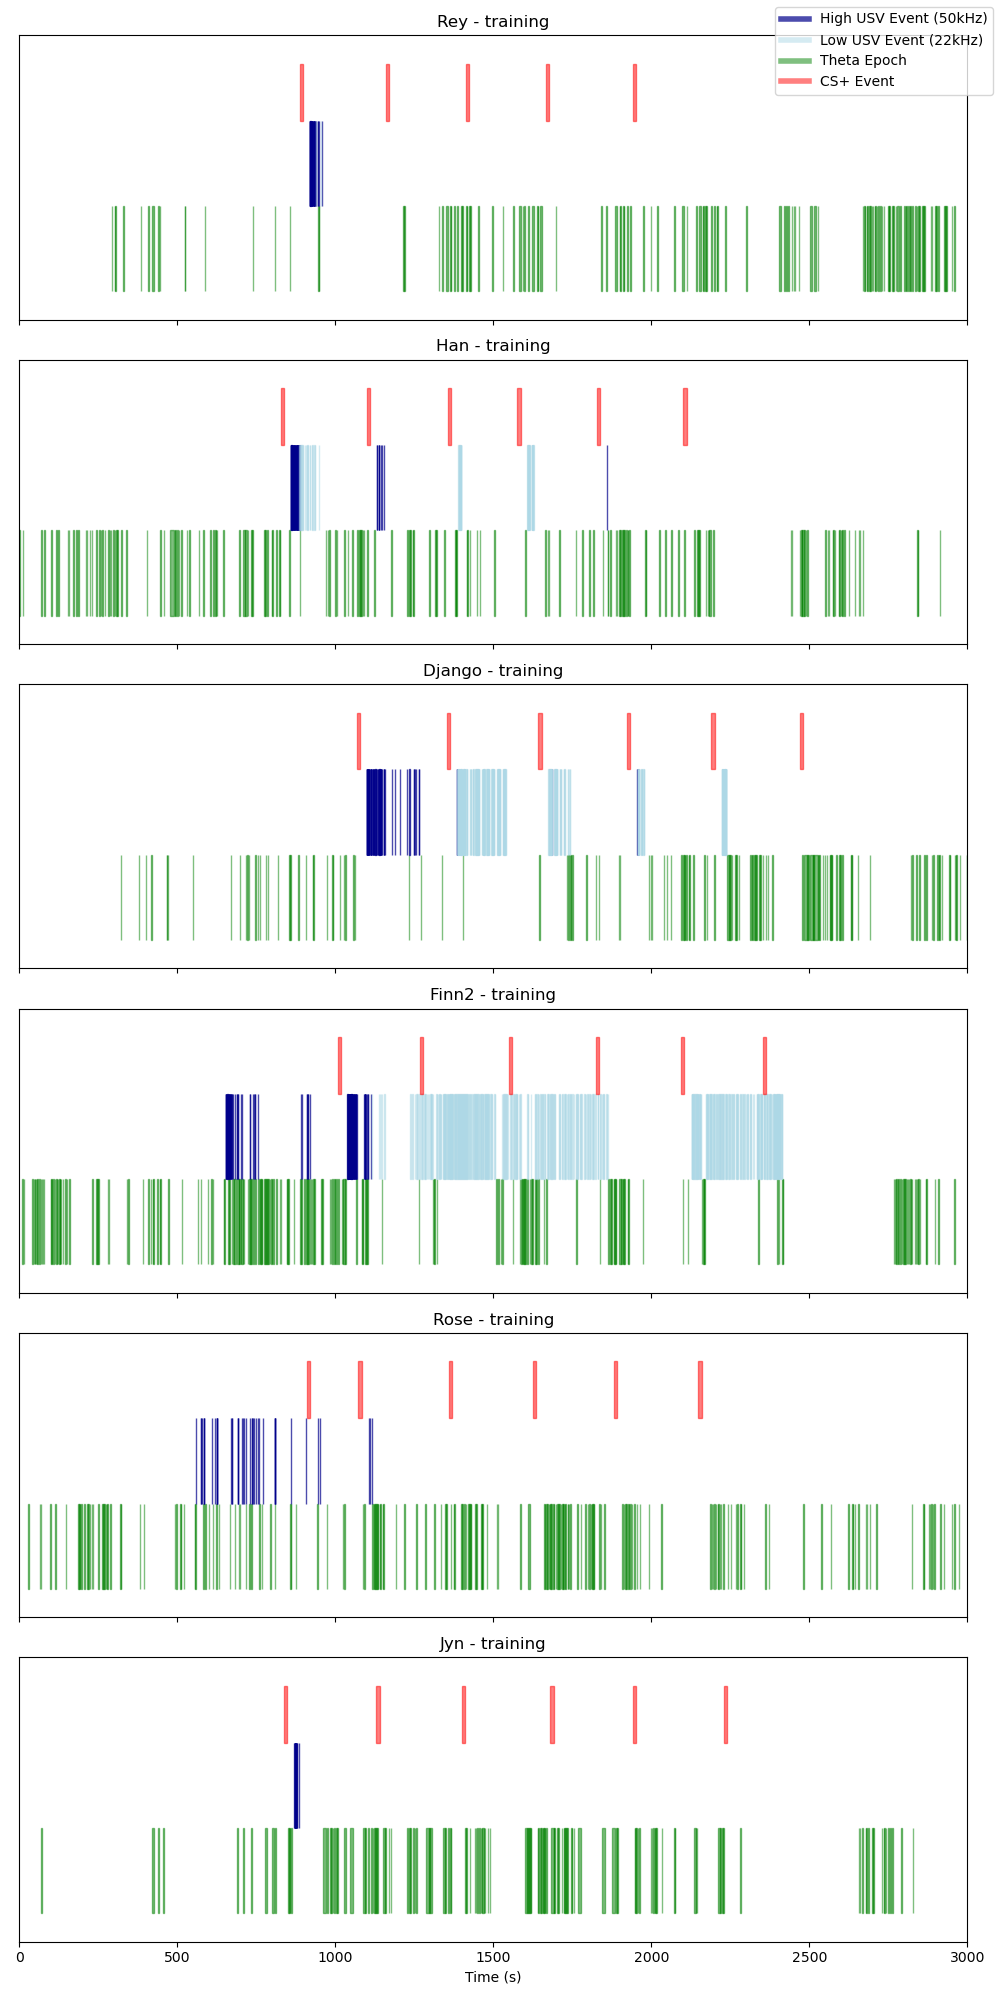

In [46]:
%matplotlib widget
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

rey_cs_plus_events_df = pd.DataFrame({
    'start': [888.010181, 1158.932758, 1413.676286, 1666.504224, 1942.196907],
    'stop': [897.743285, 1168.777502, 1423.470004, 1676.333697, 1952.031331],
    'label': ['CS+ from WAV file'] * 5
})


fig, axs = plt.subplots(len(training_sessions), 1, figsize=(10, 20), sharex=True)
if len(training_sessions) == 1:
    axs = [axs]

for idx, sess in enumerate(rec_list):
    ax = axs[idx]

    highusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min > 23]
    lowusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min <= 23]
    
    # Plot Theta epochs
    theta_start_times = sess.theta_epochs.starts  
    theta_stop_times = sess.theta_epochs.stops  
    theta_durations = theta_stop_times - theta_start_times 

    for start_time, duration in zip(theta_start_times, theta_durations):
        if start_time <= 3000:  # Limit to the first 3000 seconds
            rect = Rectangle((start_time, 0.1), duration, 0.3, color='green', edgecolor='none', alpha=0.5)
            ax.add_patch(rect)
        
    # Plot high USV events
    # if sess.animal == "Han":
    if "t_start_eeg" in sess.usv_epochs.to_dataframe().columns:
        start_key, stop_key = "t_start_eeg", "t_stop_eeg"
        
    else:
        start_key, stop_key = "start", "stop"
    # for start_time, stop_time in zip(highusv_epochs.start, highusv_epochs.stop):
    
        
    for start_time, stop_time in zip(highusv_epochs[start_key], highusv_epochs[stop_key]):
        if start_time <= 3000: 
            duration = stop_time - start_time
            rect = Rectangle((start_time, 0.4), duration, 0.3, color='darkblue', edgecolor='none', alpha=0.7)
            ax.add_patch(rect)
            
    # Plot low USV events
    # for start_time, stop_time in zip(lowusv_epochs.start, lowusv_epochs.stop):
    for start_time, stop_time in zip(lowusv_epochs[start_key], lowusv_epochs[stop_key]):
        if start_time <= 3000:  
            duration = stop_time - start_time
            rect = Rectangle((start_time, 0.4), duration, 0.3, color='lightblue', edgecolor='none', alpha=0.5)
            ax.add_patch(rect)  



    # Retrieve CS+ start and stop times for the current animal
    cs_starts, cs_stops = sess.cs_plus_events
    # Plot CS+ events as red bars
    if sess.animal == 'Rey':
        # Use the specific CS+ events for 'Rey'
        cs_starts = rey_cs_plus_events_df['start'].values
        cs_stops = rey_cs_plus_events_df['stop'].values
    for cs_start, cs_stop in zip(cs_starts, cs_stops):
        if cs_start <= 3000:  # Adjust based on your time window
            duration = cs_stop - cs_start
            rect = Rectangle((cs_start, 0.7), duration, 0.2, color='red', edgecolor='none', alpha=0.5)
            ax.add_patch(rect)



    # Setup subplot
    ax.set_xlim(0, 3000)
    ax.set_ylim(0, 1)
    ax.set_title(f'{sess.animal} - {sess.sess_name}')
    ax.set_yticks([])

# Add custom legend for all the epoch types including CS+ events
custom_lines = [
    Line2D([0], [0], color='darkblue', lw=4, alpha=0.7),
    Line2D([0], [0], color='lightblue', lw=4, alpha=0.5),
    Line2D([0], [0], color='green', lw=4, alpha=0.5),
    Line2D([0], [0], color='red', lw=4, alpha=0.5),  # For CS+ events
]
fig.legend(custom_lines, ['High USV Event (50kHz)', 'Low USV Event (22kHz)', 'Theta Epoch', 'CS+ Event'], loc='upper right')

# Set the x-axis label for the last subplot
axs[-1].set_xlabel('Time (s)')

plt.tight_layout()
plt.show()
fig.savefig('/home/bowenw/Documents/thesisplots/group_theta_usv_epoch_plots.png', dpi=500)

## Ripple and high/low USV epoch plot

/tmp/ipykernel_284390/4292259315.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = Rectangle((start_time, 0.1), duration, 0.3, color='green', edgecolor='none', alpha=0.5)
/tmp/ipykernel_284390/4292259315.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = Rectangle((start_time, 0.4), duration, 0.3, color='darkblue', edgecolor='none', alpha=0.7)
/tmp/ipykernel_284390/4292259315.py:54: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = Rectangle((start_time, 0.4), duration, 0.3, color='lightblue', edgecolor='none', alpha=0.5)
/tmp/ipykernel_284390/4292259315.py:69: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = Rectangle((cs_start, 0.7), duration, 0.2, color='red', edgecolor='none', alpha=0.5)
/tmp/ipykernel_284390/4292259315.py:30: UserWarning: Setting the 'col

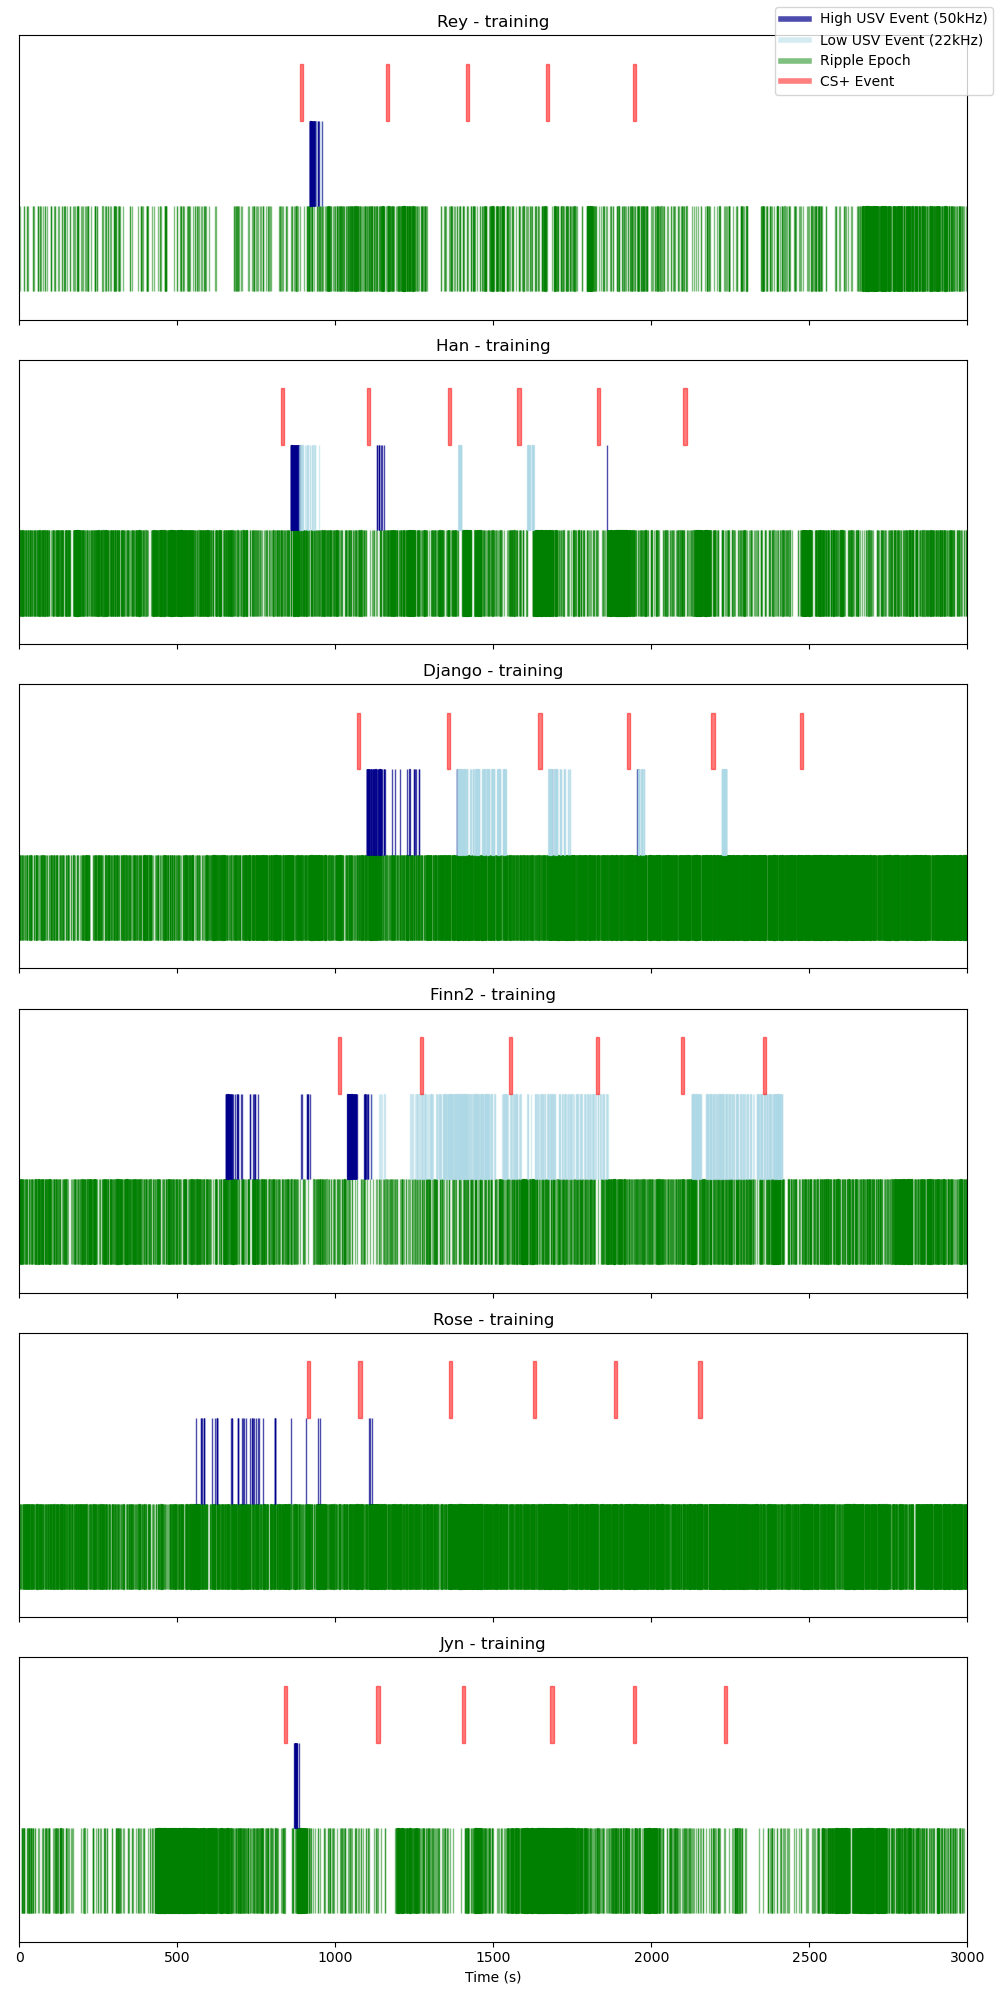

In [47]:
%matplotlib widget
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

rey_cs_plus_events_df = pd.DataFrame({
    'start': [888.010181, 1158.932758, 1413.676286, 1666.504224, 1942.196907],
    'stop': [897.743285, 1168.777502, 1423.470004, 1676.333697, 1952.031331],
    'label': ['CS+ from WAV file'] * 5
})


fig, axs = plt.subplots(len(training_sessions), 1, figsize=(10, 20), sharex=True)
if len(training_sessions) == 1:
    axs = [axs]

for idx, sess in enumerate(rec_list):
    ax = axs[idx]

    highusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min > 23]
    lowusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min <= 23]
    
    # Plot ripple epochs
    ripple_start_times = sess.ripple_epochs.starts  
    ripple_stop_times = sess.ripple_epochs.stops  
    ripple_durations = ripple_stop_times - ripple_start_times 

    for start_time, duration in zip(ripple_start_times, ripple_durations):
        if start_time <= 3000:  # Limit to the first 3000 seconds
            rect = Rectangle((start_time, 0.1), duration, 0.3, color='green', edgecolor='none', alpha=0.5)
            ax.add_patch(rect)
        
    # Plot high USV events
    # if sess.animal == "Han":
    if "t_start_eeg" in sess.usv_epochs.to_dataframe().columns:
        start_key, stop_key = "t_start_eeg", "t_stop_eeg"
        
    else:
        start_key, stop_key = "start", "stop"
    # for start_time, stop_time in zip(highusv_epochs.start, highusv_epochs.stop):
    
        
    for start_time, stop_time in zip(highusv_epochs[start_key], highusv_epochs[stop_key]):
        if start_time <= 3000: 
            duration = stop_time - start_time
            rect = Rectangle((start_time, 0.4), duration, 0.3, color='darkblue', edgecolor='none', alpha=0.7)
            ax.add_patch(rect)
            
    # Plot low USV events
    # for start_time, stop_time in zip(lowusv_epochs.start, lowusv_epochs.stop):
    for start_time, stop_time in zip(lowusv_epochs[start_key], lowusv_epochs[stop_key]):
        if start_time <= 3000:  
            duration = stop_time - start_time
            rect = Rectangle((start_time, 0.4), duration, 0.3, color='lightblue', edgecolor='none', alpha=0.5)
            ax.add_patch(rect)  



    # Retrieve CS+ start and stop times for the current animal
    cs_starts, cs_stops = sess.cs_plus_events
    # CS+ events as red bars
    if sess.animal == 'Rey':
        # Use the specific CS+ events for 'Rey'
        cs_starts = rey_cs_plus_events_df['start'].values
        cs_stops = rey_cs_plus_events_df['stop'].values
    for cs_start, cs_stop in zip(cs_starts, cs_stops):
        if cs_start <= 3000:  # Adjust based on your time window
            duration = cs_stop - cs_start
            rect = Rectangle((cs_start, 0.7), duration, 0.2, color='red', edgecolor='none', alpha=0.5)
            ax.add_patch(rect)



    # Setup subplot
    ax.set_xlim(0, 3000)
    ax.set_ylim(0, 1)
    ax.set_title(f'{sess.animal} - {sess.sess_name}')
    ax.set_yticks([])

# custom legend for all the epoch types including CS+ events
custom_lines = [
    Line2D([0], [0], color='darkblue', lw=4, alpha=0.7),
    Line2D([0], [0], color='lightblue', lw=4, alpha=0.5),
    Line2D([0], [0], color='green', lw=4, alpha=0.5),
    Line2D([0], [0], color='red', lw=4, alpha=0.5),  # For CS+ events
]
fig.legend(custom_lines, ['High USV Event (50kHz)', 'Low USV Event (22kHz)', 'Ripple Epoch', 'CS+ Event'], loc='upper right')

# Set the x-axis label for the last subplot
axs[-1].set_xlabel('Time (s)')

plt.tight_layout()
plt.show()
fig.savefig('/home/bowenw/Documents/thesisplots/group_ripple_usv_epoch_plots.png', dpi=500)

In [48]:
# %matplotlib widget
# from matplotlib.patches import Rectangle
# from matplotlib.lines import Line2D

# fig, axs = plt.subplots(len(training_sessions), 1, figsize=(10, 20), sharex=True) 
# if len(training_sessions) == 1:
#     axs = [axs]  

# for idx, ((animal, sess_name), sess) in enumerate(zip(training_sessions, rec_list)):
#     ax = axs[idx]
    

#     highusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min > 23]
#     lowusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min <= 23]
    
#     # Plot Theta epochs
#     theta_start_times = sess.theta_epochs.starts  
#     theta_stop_times = sess.theta_epochs.stops  
#     theta_durations = theta_stop_times - theta_start_times 

#     for start_time, duration in zip(theta_start_times, theta_durations):
#         if start_time <= 3000:  # Limit to the first 3000 seconds
#             rect = Rectangle((start_time, 0.1), duration, 0.3, color='green', edgecolor='none', alpha=0.5)
#             ax.add_patch(rect)
        
#     # Plot high USV events
#     for start_time, stop_time in zip(highusv_epochs.start, highusv_epochs.stop):
#         if start_time <= 3000: 
#             duration = stop_time - start_time
#             rect = Rectangle((start_time, 0.4), duration, 0.3, color='darkblue', edgecolor='none', alpha=0.7)
#             ax.add_patch(rect)
            
#     # Plot low USV events
#     for start_time, stop_time in zip(lowusv_epochs.start, lowusv_epochs.stop):
#         if start_time <= 3000:  
#             duration = stop_time - start_time
#             rect = Rectangle((start_time, 0.4), duration, 0.3, color='lightblue', edgecolor='none', alpha=0.5)
#             ax.add_patch(rect)
    
#     # Setup subplot
#     ax.set_xlim(0, 3000)
#     ax.set_ylim(0, 1)
#     ax.set_title(f'{animal} - {sess_name}')
#     ax.set_yticks([])


# custom_lines = [
#     Line2D([0], [0], color='darkblue', lw=4, alpha=0.7),
#     Line2D([0], [0], color='lightblue', lw=4, alpha=0.5),
#     Line2D([0], [0], color='green', lw=4, alpha=0.5),
# ]
# fig.legend(custom_lines, ['High USV Event (50kHz)', 'Low USV Event (22kHz)', 'Theta Epoch'], loc='upper right')

# # Set the x-axis label for the last subplot
# axs[-1].set_xlabel('Time (s)')

# plt.tight_layout()
# plt.show()
# fig.savefig('/home/bowenw/Documents/thesisplots/group_theta_usv_epoch_plots.png')

In [49]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming 'training_sessions' and 'rec_list' are defined as in your code

# # Initialize lists to store counts
# usv_counts = []
# theta_counts = []
# overlap_counts = []

# for sess in rec_list:
#     highusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min > 23]
#     lowusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min <= 23]
    
#     total_usv_epochs = pd.concat([highusv_epochs, lowusv_epochs])
#     usv_counts.append(len(total_usv_epochs[total_usv_epochs.start <= 3000]))
    

#     theta_epochs = sess.theta_epochs
#     theta_counts.append(len(theta_epochs.starts[theta_epochs.starts <= 3000]))
    
#     overlap_count = 0
#     for theta_start, theta_stop in zip(theta_epochs.starts, theta_epochs.stops):
#         if theta_start > 3000:
#             continue
#         overlap_count += sum((total_usv_epochs.start < theta_stop) & (total_usv_epochs.stop > theta_start))
#     overlap_counts.append(overlap_count)

# # Plotting
# fig, ax = plt.subplots()
# ind = np.arange(len(training_sessions))  # the x locations for the groups
# width = 0.25  # the width of the bars

# # Plot each type of count
# rects1 = ax.bar(ind - width, usv_counts, width, label='USV Epochs')
# rects2 = ax.bar(ind, theta_counts, width, label='Theta Epochs')
# rects3 = ax.bar(ind + width, overlap_counts, width, label='Overlapping Epochs')

# # Add some text for labels, title and axes ticks
# ax.set_xlabel('Animals')
# ax.set_ylabel('Counts')
# ax.set_title('Counts by animal and epoch type')
# ax.set_xticks(ind)
# ax.set_xticklabels([animal for animal, _ in training_sessions])
# ax.legend()

# plt.show()


## USV/Theta overlapping counts barplot

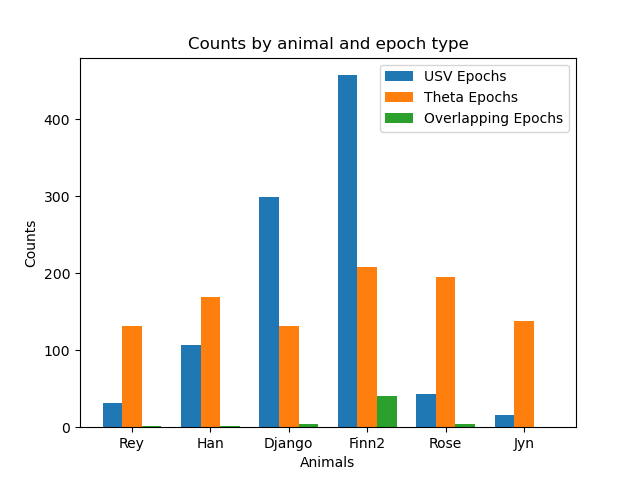

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Initialize lists to store counts
usv_counts = []
theta_counts = []
overlap_counts = []

for sess in rec_list:
    # Check which columns are available and adjust accordingly
    if "t_start_eeg" in sess.usv_epochs._epochs.columns:
        start_key, stop_key = "t_start_eeg", "t_stop_eeg"
    else:
        start_key, stop_key = "start", "stop"
    
    highusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min > 23]
    lowusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min <= 23]
    
    # Concatenate and select the correct columns based on the session type
    total_usv_epochs = pd.concat([highusv_epochs, lowusv_epochs])[[start_key, stop_key]]
    
    usv_counts.append(len(total_usv_epochs[total_usv_epochs[start_key] <= 3000]))
    
    theta_epochs = sess.theta_epochs
    theta_counts.append(len(theta_epochs.starts[theta_epochs.starts <= 3000]))
    
    overlap_count = 0
    for theta_start, theta_stop in zip(theta_epochs.starts, theta_epochs.stops):
        if theta_start > 3000:
            continue
        overlap_count += sum((total_usv_epochs[start_key] < theta_stop) & (total_usv_epochs[stop_key] > theta_start))
    overlap_counts.append(overlap_count)

# Plotting
fig, ax = plt.subplots()
ind = np.arange(len(rec_list))  # the x locations for the groups
width = 0.25  # the width of the bars

# Plot each type of count
rects1 = ax.bar(ind - width, usv_counts, width, label='USV Epochs')
rects2 = ax.bar(ind, theta_counts, width, label='Theta Epochs')
rects3 = ax.bar(ind + width, overlap_counts, width, label='Overlapping Epochs')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Animals')
ax.set_ylabel('Counts')
ax.set_title('Counts by animal and epoch type')
ax.set_xticks(ind)
# Assuming training_sessions is a list of tuples (animal, session_name), adjust as necessary
ax.set_xticklabels([animal for animal, _ in training_sessions])
ax.legend()

plt.show()
fig.savefig('/home/bowenw/Documents/thesisplots/group_theta_allusv_epoch_plots_overlap_barplots.png')

## Low USV/Theta overlapping counts barplot

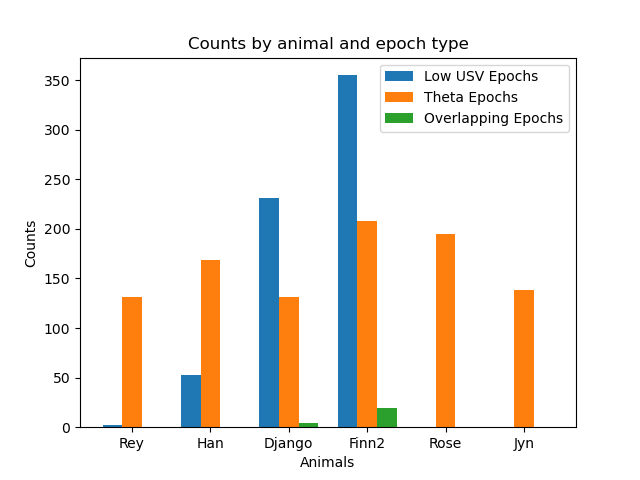

In [51]:
#low usv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Initialize lists to store counts
usv_counts = []
theta_counts = []
overlap_counts = []

for sess in rec_list:
    # Check which columns are available and adjust accordingly
    if "t_start_eeg" in sess.usv_epochs._epochs.columns:
        start_key, stop_key = "t_start_eeg", "t_stop_eeg"
    else:
        start_key, stop_key = "start", "stop"
    
    highusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min > 23]
    lowusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min <= 23]
    
    # Concatenate and select the correct columns based on the session type
    lowusv_epochs = pd.concat([lowusv_epochs])[[start_key, stop_key]]
    
    usv_counts.append(len(lowusv_epochs[lowusv_epochs[start_key] <= 3000]))
    
    theta_epochs = sess.theta_epochs
    theta_counts.append(len(theta_epochs.starts[theta_epochs.starts <= 3000]))
    
    overlap_count = 0
    for theta_start, theta_stop in zip(theta_epochs.starts, theta_epochs.stops):
        if theta_start > 3000:
            continue
        overlap_count += sum((lowusv_epochs[start_key] < theta_stop) & (lowusv_epochs[stop_key] > theta_start))
    overlap_counts.append(overlap_count)

# Plotting
fig, ax = plt.subplots()
ind = np.arange(len(rec_list))  # the x locations for the groups
width = 0.25  # the width of the bars

# Plot each type of count
rects1 = ax.bar(ind - width, usv_counts, width, label='Low USV Epochs')
rects2 = ax.bar(ind, theta_counts, width, label='Theta Epochs')
rects3 = ax.bar(ind + width, overlap_counts, width, label='Overlapping Epochs')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Animals')
ax.set_ylabel('Counts')
ax.set_title('Counts by animal and epoch type')
ax.set_xticks(ind)
# Assuming training_sessions is a list of tuples (animal, session_name), adjust as necessary
ax.set_xticklabels([animal for animal, _ in training_sessions])
ax.legend()


plt.show()
fig.savefig('/home/bowenw/Documents/thesisplots/group_theta_lowusv_epoch_plots_overlap_barplots.png')

## High USV/Theta overlapping counts barplot

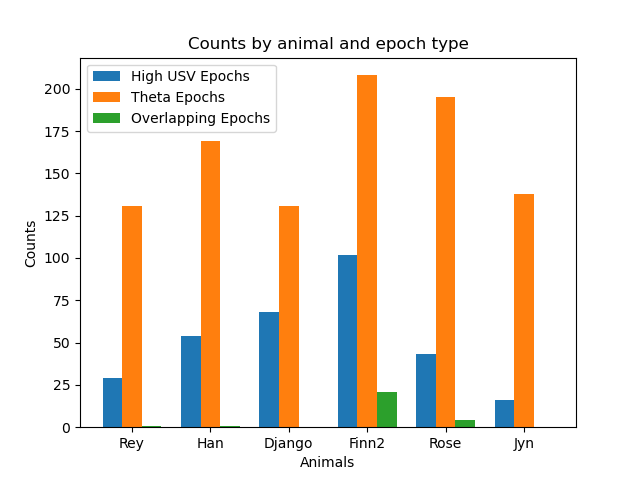

In [52]:
#high usv
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store counts
usv_counts = []
theta_counts = []
overlap_counts = []

for sess in rec_list:
    # Check which columns are available and adjust accordingly
    if "t_start_eeg" in sess.usv_epochs._epochs.columns:
        start_key, stop_key = "t_start_eeg", "t_stop_eeg"
    else:
        start_key, stop_key = "start", "stop"
    
    highusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min > 23]
    lowusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min <= 23]
    
    # Concatenate and select the correct columns based on the session type
    highusv_epochs = pd.concat([highusv_epochs])[[start_key, stop_key]]
    
    usv_counts.append(len(highusv_epochs[highusv_epochs[start_key] <= 3000]))
    
    theta_epochs = sess.theta_epochs
    theta_counts.append(len(theta_epochs.starts[theta_epochs.starts <= 3000]))
    
    overlap_count = 0
    for theta_start, theta_stop in zip(theta_epochs.starts, theta_epochs.stops):
        if theta_start > 3000:
            continue
        overlap_count += sum((highusv_epochs[start_key] < theta_stop) & (highusv_epochs[stop_key] > theta_start))
    overlap_counts.append(overlap_count)

# Plotting
fig, ax = plt.subplots()
ind = np.arange(len(rec_list))  # the x locations for the groups
width = 0.25  # the width of the bars

# Plot each type of count
rects1 = ax.bar(ind - width, usv_counts, width, label='High USV Epochs')
rects2 = ax.bar(ind, theta_counts, width, label='Theta Epochs')
rects3 = ax.bar(ind + width, overlap_counts, width, label='Overlapping Epochs')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Animals')
ax.set_ylabel('Counts')
ax.set_title('Counts by animal and epoch type')
ax.set_xticks(ind)
# Assuming training_sessions is a list of tuples (animal, session_name), adjust as necessary
ax.set_xticklabels([animal for animal, _ in training_sessions])
ax.legend()

plt.show()
fig.savefig('/home/bowenw/Documents/thesisplots/group_theta_highusv_epoch_plots_overlap_barplots.png')

## USV/Ripple overlapping counts barplot

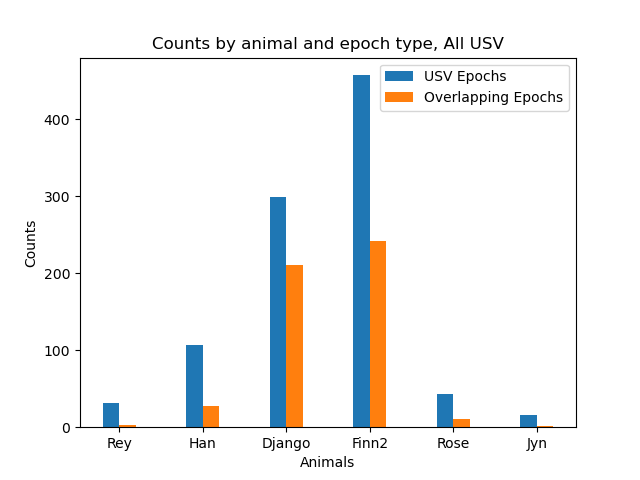

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Initialize lists to store counts
usv_counts = []
overlap_counts = []

for sess in rec_list:
    # Check which columns are available and adjust accordingly
    if "t_start_eeg" in sess.usv_epochs._epochs.columns:
        start_key, stop_key = "t_start_eeg", "t_stop_eeg"
    else:
        start_key, stop_key = "start", "stop"
    
    highusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min > 23]
    lowusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min <= 23]
    
    # Concatenate and select the correct columns based on the session type
    total_usv_epochs = pd.concat([highusv_epochs, lowusv_epochs])[[start_key, stop_key]]
    
    usv_counts.append(len(total_usv_epochs[total_usv_epochs[start_key] <= 3000]))
    
    ripple_epochs = sess.ripple_epochs

    # Count Overlaps
    overlap_count = 0
    for index, row in total_usv_epochs.iterrows():
        usv_start = row[start_key]
        usv_stop = row[stop_key]
        if usv_start > 3000:
            continue
        # Check if there's at least one ripple epoch overlapping this USV epoch
        overlaps = ((ripple_epochs.starts < usv_stop) & (ripple_epochs.stops > usv_start)).any()
        if overlaps:
            overlap_count += 1  # Count once per USV epoch with any overlap
    overlap_counts.append(overlap_count)

# Plotting
fig, ax = plt.subplots()
ind = np.arange(len(rec_list))  # the x locations for the groups
width = 0.2  # the width of the bars, adjusted for side by side placement

# Plot each type of count
rects1 = ax.bar(ind - width/2, usv_counts, width, label='USV Epochs')
rects2 = ax.bar(ind + width/2, overlap_counts, width, label='Overlapping Epochs')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Animals')
ax.set_ylabel('Counts')
ax.set_title('Counts by animal and epoch type, All USV')
ax.set_xticks(ind)
ax.set_xticklabels([animal for animal, _ in training_sessions])
ax.legend()

plt.show()
fig.savefig('/home/bowenw/Documents/thesisplots/group_ripple_allhusv_epoch_plots_overlap_barplots.png')

In [54]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming 'training_sessions' and 'rec_list' are defined as in your code

# # Initialize lists to store counts
# usv_counts = []
# ripple_counts = []
# overlap_counts = []

# for sess in rec_list:
#     highusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min > 23]
#     lowusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min <= 23]
    
#     lowusv_epochs = pd.concat([highusv_epochs, lowusv_epochs])
#     usv_counts.append(len(total_usv_epochs[total_usv_epochs.start <= 3000]))
    

#     ripple_epochs = sess.ripple_epochs
#     ripple_counts.append(len(ripple_epochs.starts[ripple_epochs.starts <= 3000]))
    
#     overlap_count = 0
#     for ripple_start, ripple_stop in zip(ripple_epochs.starts, ripple_epochs.stops):
#         if ripple_start > 3000:
#             continue
#         overlap_count += sum((total_usv_epochs.start < ripple_stop) & (total_usv_epochs.stop > ripple_start))
#     overlap_counts.append(overlap_count)

# # Plotting
# fig, ax = plt.subplots()
# ind = np.arange(len(training_sessions))  # the x locations for the groups
# width = 0.25  # the width of the bars

# # Plot each type of count
# rects1 = ax.bar(ind - width, usv_counts, width, label='USV Epochs')
# rects2 = ax.bar(ind, ripple_counts, width, label='Ripple Epochs')
# rects3 = ax.bar(ind + width, overlap_counts, width, label='Overlapping Epochs')

# # Add some text for labels, title and axes ticks
# ax.set_xlabel('Animals')
# ax.set_ylabel('Counts')
# ax.set_title('Counts by animal and epoch type')
# ax.set_ylim(0,1000)
# ax.set_xticks(ind)
# ax.set_xticklabels([animal for animal, _ in training_sessions])
# ax.legend()

# plt.show()
# fig.savefig('/home/bowenw/Documents/thesisplots/group_ripple_usv_epoch_plots_overlap_barplots.png')

## Low USV/Ripple overlapping counts barplot

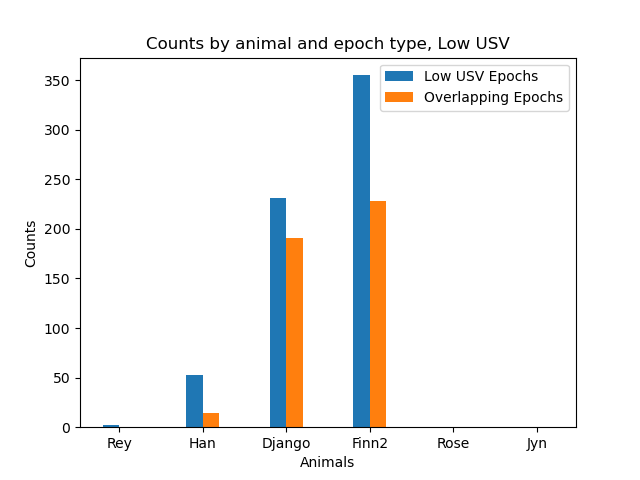

In [55]:
#low usv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Initialize lists to store counts
usv_counts = []
overlap_counts = []

for sess in rec_list:
    # Check which columns are available and adjust accordingly
    if "t_start_eeg" in sess.usv_epochs._epochs.columns:
        start_key, stop_key = "t_start_eeg", "t_stop_eeg"
    else:
        start_key, stop_key = "start", "stop"
    
    highusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min > 23]
    lowusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min <= 23]
    
    # Concatenate and select the correct columns based on the session type
    lowusv_epochs = pd.concat([lowusv_epochs])[[start_key, stop_key]]
    
    usv_counts.append(len(lowusv_epochs[lowusv_epochs[start_key] <= 3000]))
    
    ripple_epochs = sess.ripple_epochs

    # Count Overlaps
    overlap_count = 0
    for index, row in lowusv_epochs.iterrows():
        usv_start = row[start_key]
        usv_stop = row[stop_key]
        if usv_start > 3000:
            continue
        # Check if there's at least one ripple epoch overlapping this USV epoch
        overlaps = ((ripple_epochs.starts < usv_stop) & (ripple_epochs.stops > usv_start)).any()
        if overlaps:
            overlap_count += 1  # Count once per USV epoch with any overlap
    overlap_counts.append(overlap_count)

# Plotting
fig, ax = plt.subplots()
ind = np.arange(len(rec_list))  # the x locations for the groups
width = 0.2  # the width of the bars, adjusted for side by side placement

# Plot each type of count
rects1 = ax.bar(ind - width/2, usv_counts, width, label='Low USV Epochs')
rects2 = ax.bar(ind + width/2, overlap_counts, width, label='Overlapping Epochs')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Animals')
ax.set_ylabel('Counts')
ax.set_title('Counts by animal and epoch type, Low USV')
ax.set_xticks(ind)
ax.set_xticklabels([animal for animal, _ in training_sessions])
ax.legend()

plt.show()

fig.savefig('/home/bowenw/Documents/thesisplots/group_ripple_lowusv_epoch_plots_overlap_barplots.png')

## High USV/Ripple overlapping counts barplot

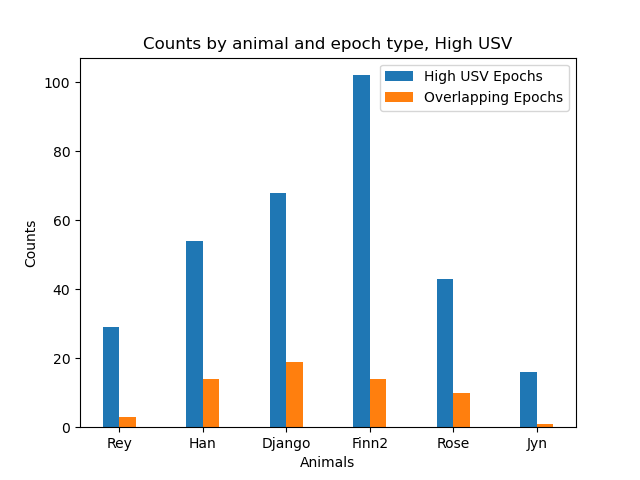

In [56]:
#high usv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Initialize lists to store counts
usv_counts = []
overlap_counts = []

for sess in rec_list:
    # Check which columns are available and adjust accordingly
    if "t_start_eeg" in sess.usv_epochs._epochs.columns:
        start_key, stop_key = "t_start_eeg", "t_stop_eeg"
    else:
        start_key, stop_key = "start", "stop"
    
    highusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min > 23]
    lowusv_epochs = sess.usv_epochs._epochs[sess.usv_epochs._epochs.Freq_Min <= 23]
    
    # Concatenate and select the correct columns based on the session type
    highusv_epochs = pd.concat([highusv_epochs])[[start_key, stop_key]]
    
    usv_counts.append(len(highusv_epochs[highusv_epochs[start_key] <= 3000]))
    
    ripple_epochs = sess.ripple_epochs

    # Count Overlaps
    overlap_count = 0
    for index, row in highusv_epochs.iterrows():
        usv_start = row[start_key]
        usv_stop = row[stop_key]
        if usv_start > 3000:
            continue
        # Check if there's at least one ripple epoch overlapping this USV epoch
        overlaps = ((ripple_epochs.starts < usv_stop) & (ripple_epochs.stops > usv_start)).any()
        if overlaps:
            overlap_count += 1  # Count once per USV epoch with any overlap
    overlap_counts.append(overlap_count)

# Plotting
fig, ax = plt.subplots()
ind = np.arange(len(rec_list))  # the x locations for the groups
width = 0.2  # the width of the bars, adjusted for side by side placement

# Plot each type of count
rects1 = ax.bar(ind - width/2, usv_counts, width, label='High USV Epochs')
rects2 = ax.bar(ind + width/2, overlap_counts, width, label='Overlapping Epochs')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Animals')
ax.set_ylabel('Counts')
ax.set_title('Counts by animal and epoch type, High USV')
ax.set_xticks(ind)
ax.set_xticklabels([animal for animal, _ in training_sessions])
ax.legend()

plt.show()

fig.savefig('/home/bowenw/Documents/thesisplots/group_ripple_highusv_epoch_plots_overlap_barplots.png')

In [57]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os
from pathlib import Path
import platform

# Define your class imports here
from neuropy.core.session import ProcessData
from neuropy.core import Epoch
from neuropy.utils.signal_process import ThetaParams

def sess_use(basepath=os.getcwd()):
    return ProcessData(basepath)

In [58]:
training_sessions = [['Rey', 'training'], ['Han', 'training'], ['Django', 'training'], ['Finn2', 'training'], 
                     ['Rose', 'training'], ['Jyn', 'training']]

# Instantiate a list to keep track of session data
rec_list = []

for animal_sess in training_sessions:
    animal, sess_name = animal_sess
    sess_dir = get_session_dir(animal, sess_name)
    sess = sess_use(sess_dir) 

    art_epochs_file = sess.filePrefix.with_suffix(".art_epochs.npy")
    sess.art_epochs = Epoch(epochs=None, file=art_epochs_file)

    usv_epochs_file = sess.filePrefix.with_suffix(".usv_epochs.npy")
    sess.usv_epochs = Epoch(epochs=None, file=usv_epochs_file)

    ripple_epochs_file = sess.filePrefix.with_suffix(".ripple_epochs.npy")
    sess.ripple_epochs = Epoch(epochs=None, file=ripple_epochs_file) 

    rec_list.append(sess)

## Stupid way of getting theta power for all USV/nonUSV/freezing epochs for all animals

In [59]:
theta_power_usv_all=([-0.74215805, -0.82844559,  0.08333973, -0.58594845, -0.58583886,
       -0.50634875,  0.22692767, -0.27258911,  0.16099873,  0.17460145,
       -0.28948005,  0.24616894, -0.35564087, -0.36399443,  0.2253516 ,
       -0.79005408, -0.42903917, -0.70617564, -0.53082991, -0.48335332,
       -1.31393227, -0.5327348 ,  0.3428949 ,  0.14632902, -0.50356125,
       -0.57657339, -0.69949232,  1.11210808, -0.85936915,  0.1229693 ,
       -0.7865533 ,  0.68490207, -0.03478214,  0.2216626 ,  0.75983104,
        0.14734248, -1.01630789,  0.6446192 ,  0.04872403, -0.13150869,
       -0.94553237, -0.24546559,  0.03818674,  0.39912097,  0.67703329,
       -0.5891172 ,  0.46953374,  0.03760685, -0.43279106, -0.18941682,
        0.03606697,  0.43516403, -1.20239093,  0.8574645 ,  0.206861  ,
        0.07474044,  0.88561805,  0.89497146, -0.95885618, -0.3434491 ,
       -0.62181565, -1.28062925, -0.90830043, -1.0480056 , -0.98117734,
       -0.67632397, -0.33368154, -0.97471716, -0.56664848, -0.51132979,
        0.05032205, -0.04158534, -0.36318938, -0.46507192, -0.1548966 ,
       -0.33542822, -0.18980105, -0.42295139, -0.31472678,  0.30556035,
       -0.50868834,  0.3680026 , -0.09591336, -0.66893295, -0.3872405 ,
        0.36661643,  0.24487431, -0.61097902, -0.39742704, -1.44055729,
        0.35861196, -0.17584391, -0.02806658,  0.25842248, -0.19043505,
       -0.02900711,  0.44518314, -0.43601709,  0.63803507, -0.02365526,
       -0.5463233 , -0.33921892, -0.75618338, -0.71468119, -0.63479224,
       -0.72053957, -0.31428259, -0.907951  , -1.11708907,  0.41153844,
       -0.37552728, -0.22690281, -0.57679666, -0.37517087,  0.02473026,
       -0.26777863, -1.36078578, -0.18269005,  0.23225428, -0.4639996 ,
       -1.06715811,  0.02584709,  0.03576397, -0.2614884 , -1.12363998,
       -0.61462033, -1.21910143, -0.47206251, -0.95200049,  0.27466817,
       -0.4258925 , -0.14219094, -0.61733377, -0.59058729, -0.6085727 ,
       -1.12399506,  0.02659394, -0.62502472, -0.33543178, -0.39664299,
       -0.08538492, -0.29408845, -0.45195437, -0.34007266,  0.65169695,
        0.17012711, -0.31672427, -0.32785082, -0.3645585 , -0.16664338,
       -1.04483086, -0.48265418,  0.01317335,  0.02341909, -0.80984466,
       -0.58810728, -1.08356075, -0.52110452, -1.23325883, -0.57396599,
       -0.08062925, -0.38134341,  0.37860479, -0.87668493, -0.71622292,
       -0.8842516 , -0.73730964,  0.87290062, -0.12120649, -0.0533243 ,
        0.81016426, -0.45693624, -0.70210402, -0.31537179, -0.07212457,
       -0.42876651,  0.04529884, -0.85531768, -0.56277152, -0.68983961,
       -0.64358702, -0.75469685, -0.49659436, -0.22644297,  0.19985867,
       -0.36906757, -1.05161323, -0.81701269, -0.84039505,  0.28879115,
       -0.82116748, -0.77192055, -0.75480133, -0.54160342, -0.51247752,
       -0.26486583, -1.65640827, -0.649237  , -1.21076669, -0.39237293,
       -0.49498496, -1.42537834, -1.17064727, -1.02380374, -0.71335475,
       -0.84986209,  0.66501112, -0.30671978, -0.42874275, -0.21602951,
       -0.81810811, -1.13181788, -0.28939481, -0.52945456, -0.69514073,
       -0.7161949 , -0.03059829, -0.16137003,  0.27920429,  0.11856948,
        0.01745095, -0.54096159, -0.96980916, -0.30169366, -0.28422865,
        0.77283382,  0.1388117 , -0.48427124, -0.66075593,  0.65842536,
        0.19431281, -0.8575045 , -0.53565492,  0.44163713,  0.27220383,
       -0.04853377, -0.03652375, -0.22117044,  0.34441853,  0.27255883,
        1.00258081,  0.23151787,  0.77530732,  0.17805032,  0.31795051,
        0.56223626,  0.55043567, -0.04726626,  0.01013299,  1.91439812,
        0.36618561,  0.18386741,  0.28312647,  0.07916743, -0.29427435,
       -0.36338954, -0.55371411, -0.68256311,  0.19508447, -0.86735134,
       -0.22750511,  0.12709269, -0.15824068,  0.42082529, -0.7013211 ,
       -0.6359481 , -1.35494   , -0.65982669, -1.19890874, -0.46615429,
        0.52380209,  0.25822685, -0.04413046,  0.4867246 , -0.14780777,
        0.49497001,  1.06968143,  0.3186923 ,  0.24000661, -0.18078671,
       -0.25698312, -0.46370549,  0.88878124,  0.42622085,  0.02752742,
       -0.04911105, -0.39920568, -0.48065391,  0.12470264, -0.65517678,
       -0.42068059,  0.81070058, -0.50059578,  0.73589076,  0.25316845,
        0.11868901,  0.58443189, -0.46677091,  0.72023616])+ ([-3.56082980e-01, -7.65086059e-01, -1.50879560e-01, -5.31718088e-01,
        1.95620648e-01, -6.39049809e-01,  8.53976081e-01, -1.78163588e-01,
       -1.21897112e-01,  8.31518297e-01,  7.71673624e-01, -1.95562724e-01,
        1.32285797e+00,  6.91073189e-01,  1.81571356e-01, -3.87846020e-01,
        6.18760821e-01,  7.13885099e-02,  1.84687027e-01,  3.44195799e-01,
        2.35357421e+00,  3.14174093e-01,  9.79253017e-01,  4.78348827e-01,
        1.86152490e+00,  1.16203403e+00,  8.34711547e-01,  2.29204112e+00,
        7.12039462e-01,  5.07339488e-01,  1.03916566e+00,  1.16437475e-01,
        1.58173664e+00,  1.07308408e-01,  1.97214686e+00,  1.42406704e+00,
        8.42284760e-01, -9.12808188e-01, -4.06082159e-02, -1.03893949e-01,
        1.17964128e+00,  3.71529395e-01,  1.33729061e+00, -2.58998706e+00,
        1.52884911e+00,  8.65655445e-02, -4.92536215e-01,  3.93912670e-01,
       -5.27672041e-01, -4.56881582e-01,  1.11703588e-01, -6.21477390e-01,
       -3.05666563e-01,  4.36047755e-01, -7.06334385e-01,  8.27857073e-01,
       -5.09968880e-01, -7.05389364e-02,  6.08268967e-03, -1.21032558e+00,
       -1.17883348e-01, -3.02304780e-01,  1.96900010e-01, -1.17236574e+00,
       -9.00846218e-01,  1.40041750e+00, -7.74401614e-01, -1.63573038e-01,
       -9.96025139e-01,  9.96798515e-01,  2.15688660e-01, -9.42623381e-01,
       -4.70622878e-01, -8.58392141e-02, -9.27821114e-01,  5.81295312e-01,
        7.21376065e-02, -1.82349830e-01, -3.40913518e-01,  3.17967041e-01,
        5.28154736e-01, -3.26376338e-01,  1.65031509e-01,  6.38542366e-01,
       -1.16950316e-01, -4.93712339e-01, -8.03268657e-01, -4.35663522e-01,
       -8.09161024e-01,  3.60194436e-01,  8.32191633e-01,  7.18625050e-01,
       -7.00145763e-01, -1.91159855e-01,  3.50189853e-01, -6.22567890e-01,
        1.55592230e-01, -2.78464765e-01,  1.03720607e+00,  1.39413235e+00,
        8.04420354e-01,  1.17822971e+00, -9.02422307e-01, -1.24993695e+00,
        7.09166903e-03, -2.82129616e-01, -4.85488714e-01, -3.68685610e-01,
       -3.61936880e-01, -4.18797422e-01, -4.00581961e-01, -2.13400256e-01,
       -4.36526333e-01, -7.83199758e-02, -8.40805466e-01, -4.07975419e-01,
       -3.17494393e-02, -4.46139938e-01, -3.89989839e-01, -3.91169750e-01,
       -9.75949481e-01,  4.51042381e-01, -7.82742561e-01, -2.36356029e-01,
       -2.04050977e-02,  8.24802528e-03, -6.94206750e-01, -1.96108694e-01,
        5.27621906e-01,  8.76104587e-01, -2.44070610e-01,  2.02556764e-01,
       -5.04097063e-01, -4.70937197e-01, -6.04315097e-01, -1.33969003e-01,
        1.17329626e-01,  4.28380524e-01, -1.72608202e-01, -6.94268871e-03,
       -7.36650396e-01, -3.60826061e-01, -1.09772769e+00, -4.36009458e-01,
        2.54951295e-01, -8.53017602e-01, -7.59631000e-01, -5.92827262e-01,
       -8.59052565e-01, -4.07275492e-01,  4.19153905e-02, -7.70349692e-01,
       -2.76819188e-01, -8.11737463e-01, -3.40961206e-01, -3.21874449e-01,
       -8.24569826e-01, -6.36452170e-01, -4.93282490e-01, -4.00805703e-01,
       -8.02897036e-01, -6.67595907e-01, -1.22493878e+00, -3.24154506e-01,
       -5.01588818e-01, -5.52036340e-01, -1.07808620e+00, -8.13050076e-01,
       -9.13428833e-01, -5.78085803e-02, -9.01385777e-01, -5.15830299e-01,
       -7.14471290e-01, -8.28870135e-01, -2.91322429e-01, -6.81536926e-01,
       -7.51116801e-01, -9.50304220e-01, -5.39257398e-01, -8.51338791e-01,
       -3.39503238e-01, -2.07995136e-01,  8.64514376e-03, -1.07407781e+00,
       -4.01844314e-01, -8.50632498e-01,  3.50417771e-02, -6.15482609e-01,
       -1.24378330e+00, -1.86939248e-01, -2.42269006e-01, -1.05345281e+00,
       -1.37457253e-01, -1.24385525e+00, -1.20164509e+00, -7.22954857e-01,
       -3.02376442e-01, -8.76095217e-01,  1.73023682e-01, -4.78337196e-01,
       -1.00919842e+00, -2.08682166e-01, -5.66989872e-01, -5.92923821e-01,
       -8.65845133e-01, -4.01333412e-01, -7.76575933e-01, -5.78258351e-01,
       -6.49341940e-01, -1.07218883e+00, -4.16375334e-01, -2.83306538e-01,
       -6.05493208e-01, -3.20757902e-01, -7.86455757e-01, -6.81886664e-01,
       -5.37331449e-01, -4.78273586e-01, -6.76575344e-01, -2.22881784e-01,
       -7.58882144e-01, -1.33362848e-01, -3.40222449e-01, -6.77271319e-01,
       -8.77170320e-01, -1.23889347e+00,  2.71966257e-01, -6.62869852e-01,
       -2.19329382e-01, -3.74737448e-01,  4.49739946e-01, -2.95735310e-01,
       -5.94783285e-01, -6.42907578e-01,  2.45045150e-01, -1.48607082e-01,
        6.64468600e-01, -4.00455447e-01, -6.12151240e-01, -9.82224286e-01,
        2.27931683e-02, -9.58706859e-02, -1.81431715e-03,  3.79858189e-01,
        1.05587090e+00,  4.80476058e-01,  1.39974383e-01, -1.47022289e-03,
       -3.15550226e-01, -2.80813454e-01,  7.32022931e-01, -9.46932207e-02,
        4.67427941e-01,  7.00282155e-02, -2.14458438e-01, -2.72712145e-01,
        2.04933439e-02, -1.22929898e-01, -3.75687233e-01,  2.45789400e-02,
        2.22286488e-01, -4.43948691e-01, -6.57148144e-01, -9.91807581e-02,
       -2.35227669e-01, -2.45178285e-01, -2.77555868e-01, -3.66690785e-01,
       -1.17775319e-01, -3.28361994e-01,  1.48541631e-02, -1.54250246e-01,
       -3.68851216e-01, -7.57035399e-02, -2.19993092e-01,  2.29527095e-02,
       -1.24735523e-01,  6.12624790e-02, -5.46672511e-01, -1.29069754e-01,
       -3.72186220e-01, -1.38087762e-01, -7.14896305e-01, -1.00834519e+00,
        4.09205039e-01, -6.11560718e-01, -3.19614460e-01, -3.88462712e-01,
       -4.19892562e-01,  5.87960389e-01,  4.62368990e-02, -5.72833191e-01,
       -1.16479142e+00,  7.52994569e-02, -9.06916305e-02,  2.59151828e-01,
        3.80998268e-02, -1.13770497e-02, -6.16868429e-01, -1.79991718e-01,
       -9.13964904e-01, -7.76417126e-02,  2.57633509e-01, -9.38249692e-02,
       -6.63465139e-01, -1.90313872e-01,  3.46692736e-02, -5.33185796e-01,
       -3.95822855e-01, -4.98401771e-01, -8.42855157e-01,  4.40232706e-01,
        9.59486945e-02, -2.59058236e-01, -4.22277829e-01, -2.50333004e-01,
        5.44284225e-02, -1.93672560e-01, -2.92285277e-01, -6.71116623e-01,
        4.60855269e-03,  9.38215556e-01, -3.82460386e-01,  1.73428662e-01,
       -1.96515331e-01, -1.81982535e-01, -7.95185101e-02, -6.67587746e-02,
       -8.24679542e-01, -1.59338379e-01, -8.29328482e-02,  5.97539224e-01,
        2.22674191e-01, -4.60258004e-01,  1.34404750e-01, -3.73503383e-01,
       -5.98053750e-01, -7.24531926e-01, -5.10935956e-01, -4.21965224e-01,
       -7.50495946e-01, -9.44297999e-02, -2.13715215e-01, -5.88074846e-01,
        4.86200358e-01,  1.56587491e-02,  3.64603134e-01,  3.23348375e-01,
        1.88719948e-01, -2.84750394e-01, -4.37562915e-01, -5.08838816e-01,
       -6.20846313e-02,  1.15972951e-01, -2.35776100e-01,  4.67353414e-01,
       -2.30873940e-01, -4.43471855e-01, -2.70182811e-01, -4.27121219e-01,
        8.83187314e-02, -2.29303730e-01,  1.50223595e-01,  1.95285574e-02,
       -7.34261108e-01, -4.80679331e-02,  8.61884600e-02, -4.79888580e-02,
       -5.94693937e-01, -6.23675982e-01,  8.73432473e-02,  9.41421003e-03,
       -1.51231714e-01,  1.63930024e-02,  1.68112618e-01,  1.73446793e-01,
       -6.42195189e-01, -3.90866595e-01, -2.73271569e-02, -6.63060097e-01,
       -2.85689611e-02, -8.03893536e-02, -2.62284608e-01, -3.24566414e-02,
       -6.22462515e-01, -3.54931705e-01, -4.64816782e-01, -2.82877043e-01,
       -4.14030089e-01, -3.08153517e-01, -4.18433957e-02, -4.36586811e-01,
        1.91618634e-01, -2.50047763e-01, -1.46506888e-01, -4.64166916e-01,
        2.55780446e-01, -7.15642252e-02, -8.34141183e-01, -1.59149282e-01,
       -3.64478074e-01, -5.04465488e-01, -5.94943745e-01, -5.94070288e-01,
       -7.58619394e-01,  6.81657156e-01,  4.22046999e-01, -4.49758035e-01,
        5.16267037e-01,  5.40596907e-01, -2.67646875e-01, -2.51552846e-01,
       -4.06796572e-01, -5.22373995e-01, -4.66574339e-01,  5.91210764e-02,
       -1.06362686e+00,  1.27702254e+00, -1.65314332e-01,  6.92391334e-02,
        5.56703532e-02,  8.83387218e-02, -3.86241068e-01, -1.83031555e-01,
        5.19156474e-01, -6.10791020e-01, -8.70879822e-01, -1.39522032e-01,
       -2.07130677e-01, -2.66137637e-02, -5.51443253e-01, -5.15644948e-01,
       -3.59768290e-01, -1.70041113e-01, -1.14033771e+00, -8.01592938e-01,
        3.20748101e-01,  7.58123249e-01,  1.93860278e-01, -1.70301800e-02,
        8.15166181e-01,  3.93851015e-01,  1.29587230e+00,  1.07911918e+00,
       -1.62279875e-01,  3.44475190e-02,  7.89801955e-01,  1.21018411e-01,
       -7.81941140e-01,  3.15886077e-01,  7.43430605e-01, -2.74152892e-01,
        6.64415362e-03,  6.64594471e-02, -1.04318126e-01, -2.48202755e-01,
       -6.64327362e-02]) + [-1.82656952, -1.05892095, -0.05369524, -0.35557544, -1.25485886,
       -0.70176961, -0.33291615,  0.06263998, -0.46052408, -0.15982511,
        0.31741871, -0.52333222, -0.66175248, -0.48060496, -0.17274039,
        0.43919942] + ([-0.67347962, -0.89079512, -0.49104991,  0.00720878,  0.68855555,
       -0.21663647, -0.93993984, -0.82167716, -0.84612058, -0.44374228,
       -0.39519119, -0.19190114, -0.54125826, -0.42431207, -0.97520152,
        0.79808066, -0.19301369, -0.71526669, -0.68625894, -0.1004135 ,
       -0.58626864,  0.05325709,  0.17986803, -0.79530246,  0.39503017,
        0.31831947, -0.63298205, -0.26467779,  0.26285654, -0.30519126,
       -0.64392195]) + ([-1.97957609e+00, -1.97957609e+00, -1.97957609e+00, -1.97957609e+00,
       -1.97957609e+00, -3.57749497e-01, -3.35218212e-01,  3.80193018e-01,
       -5.26335101e-01, -4.31259772e-01, -9.00548894e-01,  9.92541993e-01,
        1.72859671e-01,  4.79559366e-01, -9.80722835e-01,  2.43539908e-01,
        5.24463468e-01, -1.13725769e-01, -1.52954645e-01, -5.35291570e-01,
       -7.96047653e-01, -2.96868761e-01, -1.34573675e+00, -8.43711503e-01,
       -4.46251669e-02, -9.81147538e-02, -8.54825186e-01, -1.69406842e-01,
       -3.41582282e-01, -1.10156846e+00, -9.97515192e-01, -3.71836447e-01,
        1.07751643e-03,  5.97942372e-01,  8.02207965e-01,  3.85332950e-01,
        1.16562079e-01,  6.51702732e-01, -4.68632438e-01, -4.90122718e-01,
       -1.16614595e+00, -9.50349356e-01, -4.35132892e-01, -4.75408685e-01,
        8.01234312e-01, -3.49243353e-01, -2.74631813e-01, -3.24228601e-01,
       -3.13182214e-01, -8.43197082e-01, -3.62114195e-01, -5.70015807e-01,
       -4.80144081e-01, -1.03386092e+00, -8.12293257e-01, -1.12738229e+00,
       -3.99296756e-01, -6.46268973e-01, -4.67033374e-01, -1.12107412e+00,
       -4.52992689e-01,  4.05190903e-01, -1.04758778e+00, -1.97957609e+00,
       -1.97957609e+00, -1.03085272e+00, -1.01816195e+00, -8.57201837e-01,
       -1.06256276e+00, -2.20929715e-02, -2.07491837e-01, -6.43964292e-01,
        1.28282040e-01,  4.13039686e-01,  2.56792005e-01, -7.87707515e-03,
       -1.11704161e-01, -4.95872515e-01, -5.46903713e-01, -1.50757089e-01,
       -6.38547415e-02, -1.04697287e+00, -3.98878897e-01,  2.35788654e-02,
       -9.63617568e-02,  3.31775624e-01,  7.10206991e-02, -1.69886761e-01,
        4.89662102e-01,  2.44372417e-01, -6.50143238e-01, -2.80888419e-01,
       -8.54731810e-02,  9.12526986e-02, -6.16888313e-01, -1.25776855e-01,
       -9.58861165e-01,  1.16915284e-01, -4.42775615e-01, -6.87571537e-01,
       -4.53842203e-01, -5.40140341e-01, -8.74724452e-01, -4.31692095e-01,
       -8.26173861e-01, -6.05950585e-01, -8.06280516e-01]) + ([ 0.58536711, -0.21431873,  0.12505482,  0.41760634,  1.12703748,
        0.27883317,  0.19135491,  0.37530878, -0.48569344,  0.75170591,
       -0.67371642, -0.33578017,  0.1171071 , -0.8579839 , -0.26077164,
       -1.08067936, -1.02720023, -0.14327523,  0.10231134, -0.47400129,
       -0.44169831, -0.21739462, -0.7084075 , -0.33030244, -0.66782174,
       -0.67828304,  0.75668829, -0.61909543, -0.4427132 ,  0.50743764,
        0.32267622,  0.16582526,  0.81821172,  1.74500348,  1.73878536,
        1.65549958,  0.64709657, -0.54450126, -0.72152271, -0.31662326,
        0.15163739, -0.03865911,  0.06016991])


In [60]:
theta_power_non_usvs_all=([ 0.0719629 ,  0.11104347,  0.06461861,  0.07645621, -0.41290294,
       -0.66363108, -0.17569737,  0.68678357, -0.2938963 , -0.4414429 ,
       -0.32851698,  0.08579091,  0.5080539 , -0.30297647, -0.14948448,
       -0.62190707, -0.15504577, -0.28083202, -0.27688953, -0.23624273,
       -0.28080432, -0.29339522, -0.32521794,  0.14218958, -0.19826213,
       -0.16905805,  0.25686675, -0.20640706, -0.21864876,  0.38814424,
       -0.62499024, -0.26972331, -0.60447235, -0.6267115 , -0.30297141,
        0.07728624, -0.19462724, -0.27190698, -0.5665919 , -0.50718491,
       -0.36978333,  0.0953178 , -0.19241572,  0.06135733, -0.00887557,
        0.21062213, -0.00929482,  0.03106265,  0.12011923, -0.15468224,
        0.07752854,  0.23187082]) + ([-0.49480607,  0.20813953, -0.19209213,  0.11174097, -0.08850525,
        1.22356327,  0.42179743, -0.14807222,  0.47019686,  1.53567488,
        0.25332167,  1.08014637,  0.51028364,  0.92503822,  1.27230801,
        0.49198105,  0.72595973,  0.27189012,  0.42560902,  0.26334778,
        0.54677833,  0.17158427,  0.47011421,  0.35146587, -0.36075663,
       -0.38904975,  0.03656414,  0.42281379, -0.55892659,  0.63348688,
        0.08806791, -0.31618196, -0.13956001,  0.46821695,  0.82069319,
       -0.13987009, -0.04903751, -0.05253265, -0.41139968,  0.28221706,
        0.44265024,  0.12598814, -0.50946833, -0.29738317, -0.20690332,
       -0.4701031 , -0.29642692,  0.35127133, -0.27203077, -0.43812474,
       -0.58859878,  0.03127882, -0.43086917, -2.58998706,  0.36064013,
        0.77955355, -0.06234573,  0.37194735,  0.66662452, -0.05567909,
        0.62718864, -0.70225596, -0.44196158, -1.06373803, -0.75381264,
       -0.66546963, -0.35391511, -0.81528486, -1.13203238, -0.95406119,
       -1.03222284, -0.59014403, -1.11154315, -0.70700254,  0.34582183,
        0.39073381,  0.11300644, -0.73075411, -0.4588812 , -0.99605203,
        0.11209176,  0.92495261,  0.22365776,  0.39751117,  0.60828188,
       -0.08738546, -0.26232195,  0.28708809, -0.03404173, -0.89739434,
       -0.09739596, -0.55283003,  0.09516417, -0.59458965, -0.0853128 ,
       -0.62798045, -0.4751348 , -0.49409259, -0.30672957, -0.30215932,
       -0.75967485, -0.21864962, -0.20389653, -0.21785665, -0.40954763,
       -0.66090182, -0.40812378, -0.36770008, -0.91916125, -0.38437233,
       -0.04650054, -0.23254316,  0.1345338 ,  0.47155233, -0.13852193,
        0.59673112,  0.08710198,  0.2417427 , -0.05426582, -0.67186168,
       -0.31402777, -0.12592123, -0.07405134, -0.19946117, -0.44706956,
       -0.11781368, -0.0631183 , -0.20804438, -0.26009085, -0.46093661,
       -0.95001694, -0.60205519, -0.5860555 , -0.26340656, -0.51597658,
       -0.2172733 ,  0.0184213 ,  0.16873059, -0.06611579, -0.5918992 ,
       -1.88304572,  0.31681548,  0.54347799, -0.14112889]) + ([ 0.12186619, -0.10278366,  0.11592332]) + ([-0.43640775, -0.52962219, -0.64627784, -0.334638  , -0.24772357,
       -0.57766775, -0.29018256,  2.34976218, -0.20101997, -0.37732064,
       -0.10739861])  + ([ 0.2635818 , -0.16381028, -0.53738305, -0.69418773, -0.42743652,
       -0.8499417 ,  0.06933927,  0.78335701, -0.37388351, -1.02591827,
       -0.45290919, -0.53600787, -0.18053993, -0.62701218, -0.6430702 ,
       -0.72528503, -0.5214023 , -0.02768101, -0.55500745, -0.36449071,
       -0.4504717 ,  0.13721533, -0.11781202, -0.07133   , -0.31018474,
       -0.37682884, -0.18478984, -0.24674544]) + ([-0.24675283, -0.24801994,  0.02614697,  0.06540286,  0.17262431,
       -0.09632151, -0.15229744, -0.20370429, -0.21236374,  0.20033405,
       -0.26120704,  0.42954472, -0.05882689,  0.08617419, -0.22626905,
       -0.26017375, -0.12962809, -0.31403733,  0.178091  , -0.04644668,
       -0.02941557, -0.16211904, -0.32979307, -0.14888054, -0.20967424,
        0.02984848,  0.02604421])




In [61]:
theta_power_frz_all=([ 0.10374728, -0.1441329 , -0.39527115,  0.24626492,  0.42192388,
        0.1954902 , -0.01617879,  0.09224788, -0.25031178, -0.267002  ,
       -0.23970812, -0.22998255,  0.65601365, -0.17723062, -0.18137492,
        0.69148601,  0.04484281, -0.11847618, -0.1380535 , -0.17640066,
       -0.44535152, -0.02417762, -0.22145971, -0.29555848, -0.43142165,
       -0.17126861, -0.06184563, -0.11063726,  0.34120991, -0.08241125,
        0.27338818,  0.08285754, -0.286136  , -0.39269198,  0.27039165,
        0.24306733, -0.23641294, -0.42500396, -0.58943417, -0.56082809,
       -0.45480828, -0.36313345, -0.29345164, -0.41513373, -0.4423043 ,
       -0.46127382, -0.23093229, -0.3527011 , -0.31197214, -0.56281367,
       -0.36569065, -0.65139478, -0.37257336,  0.07806972,  0.20625702,
        0.17492623,  0.1598135 , -0.09006841, -0.08713965, -0.41499858,
        0.14854542,  0.18956634, -0.10969214,  0.03198002, -0.09769581,
        0.27870784, -0.15139556, -0.2388095 ,  0.22541303,  0.03896792,
       -0.12748151, -0.05581919, -0.05209639,  0.18909783, -0.10874424,
       -0.06547383, -0.18897458,  0.00715425,  0.18213356, -0.07335649,
        0.23523624,  0.2302    ,  0.24276359, -0.03137484,  0.06446676,
       -0.003993  , -0.16446357, -0.34701056, -0.35573554, -0.6174327 ,
       -0.09766865, -0.36216943,  0.18772124,  0.30639343,  0.34378982,
        0.28139703,  0.04705799,  0.69460364, -0.42332493, -0.26278043,
       -0.02573515, -0.10896634,  0.02744196,  0.05375191, -0.06050411,
        0.01074204, -0.15672501,  0.35415629,  0.62880238,  0.01190961,
       -0.09923724,  0.25943484,  0.13976256, -0.3449252 ,  0.04555602,
        0.19014956, -0.30713238, -0.01791444, -0.14660944, -0.13958981]) + ([-5.86790055e-01, -1.47517998e-01,  5.21595391e-01, -3.69961788e-01,
       -9.02508803e-02, -3.25605581e-01, -1.63455784e-01, -1.16885259e-01,
       -4.33819671e-01, -4.69344703e-01, -4.13285035e-01, -7.09473227e-01,
       -2.13127734e-01, -2.46419358e-01, -4.22884144e-01,  6.66394211e-02,
       -3.76232666e-01, -4.79447775e-01, -7.06169544e-01, -5.87203007e-01,
       -5.38464881e-01, -4.07606000e-01, -6.73249446e-01, -1.32616846e-01,
       -6.12113142e-01, -1.99192278e-01, -6.39951562e-01, -8.82165612e-01,
       -7.29828640e-01, -9.32040371e-01, -5.21215577e-01, -5.34237712e-01,
       -6.84594915e-01, -3.54404465e-01, -3.47276420e-04, -6.75891744e-01,
       -6.21859451e-02, -4.27950700e-01, -4.30142672e-01, -2.76114409e-01,
       -1.27623267e-02, -3.26424563e-01, -2.88723775e-01,  2.70655575e-01,
       -1.21395759e-01, -3.02529293e-01, -5.27090973e-01, -2.73741148e-01,
       -3.06166752e-01, -5.71334907e-01,  4.03864569e-01, -6.79628996e-01,
       -2.50591332e-01, -5.51295966e-01, -1.18341858e-01,  3.82925549e-02,
       -2.14104169e-01, -6.73630658e-01, -5.93714152e-01, -2.30228607e-01,
        5.98955687e-01, -7.22287632e-02,  2.18004526e-01, -1.57223874e-01,
       -1.04608923e-01, -1.02657979e-01, -1.56365687e-01, -4.62756760e-01,
        4.65700829e-02,  2.39509958e-01, -4.11138967e-01, -5.20673420e-01,
       -4.10470248e-01, -2.08321056e-01, -5.24307162e-02, -5.50305223e-01,
        1.23632703e-01, -6.20718186e-01, -6.28871786e-01, -1.25551568e-01,
       -1.81508892e-01, -2.25666871e-01, -6.89064750e-01,  1.18381899e-01,
        1.82121142e-01, -2.08824181e-01, -1.67721205e-01, -3.64620352e-01,
       -5.95670037e-02, -1.61353409e-01, -3.76084789e-01, -8.60806531e-02,
       -7.38056349e-01, -1.14401256e-01, -1.16195750e-01, -3.15945974e-01,
        1.74861460e-01, -5.86779510e-01, -2.46883945e-01, -5.98336015e-02,
       -1.97406457e-01, -1.76944330e-01, -3.19564560e-01, -3.66791708e-01,
       -2.47918798e-01, -4.83063107e-01, -6.64094780e-01, -4.79153410e-01,
        1.23038118e-01,  4.47406496e-01, -4.15752501e-01, -2.51795419e-01,
       -3.39223615e-01, -4.44437826e-01, -1.44281130e-02, -2.93962343e-02,
       -3.58297547e-01, -4.40739675e-02, -1.99044553e-02, -5.27418267e-01,
        2.54054245e-01, -2.67525472e-01, -4.41808015e-02, -2.99554195e-01,
       -5.11096170e-01, -4.20264002e-01, -3.28433753e-01, -4.30976955e-01,
       -5.25582584e-01, -3.97034249e-01, -2.81486742e-01,  4.98018169e-02,
        1.45235868e-02, -2.63975370e-01, -4.21158205e-01, -3.89101958e-01,
       -4.74028378e-01, -3.04002935e-01, -4.82475787e-01, -7.56464512e-01,
       -4.20490589e-01, -2.08241238e-01, -2.60205046e-01, -9.31376496e-02,
       -4.97580485e-01, -3.70889769e-01, -9.94308304e-02,  1.90975782e-01,
        6.64446155e-02, -3.09705770e-01, -1.47933606e-01, -2.88232267e-01,
       -2.48911389e-01, -4.85052347e-01, -4.36555859e-01, -3.84172199e-01]) + ([-0.25337311,  3.57531441, -0.22022186,  1.30976283, -0.20467309,
       -0.3777279 ,  0.08559167, -0.40793156, -0.40019631, -0.30838883,
       -0.23015637,  3.25740327,  0.56022555,  2.53926257, -0.10334055,
        0.33714632,  0.46226288,  0.53760182,  1.42189512, -0.02339467,
       -0.78443445, -0.35253768, -0.20767035, -0.46688498, -0.48512226,
        1.50710745,  0.99295913,  0.15607104, -0.47347287, -0.50349706,
       -0.34889369, -0.59275031,  2.25168302,  0.06186318,  2.73962475,
        0.40669705,  0.29149213,  1.20251464, -0.4120952 , -0.41107217,
       -0.09219069,  0.03302717,  1.97397371,  1.76268001, -0.51656329,
       -0.31282192, -0.53568372,  0.83841079, -0.49350964, -0.45375964,
       -0.46664155, -0.50141374, -0.28321066,  0.03710301,  0.00518943,
       -0.26351388, -0.19199577, -0.25675535, -0.24280555, -0.40237583,
       -0.29082895, -0.30774911,  0.23820263,  0.00377393,  1.62310125,
       -0.26230687,  0.10077321,  2.46723987,  0.53889161,  0.6719991 ,
       -0.01919189, -0.18324812, -0.21500226, -0.6686914 ,  3.5647576 ,
       -0.36034388, -0.54423495, -0.17004632, -0.44219889, -0.21121566,
       -0.08029749,  0.32735097, -0.26047167, -0.04434125, -0.16089121,
       -0.08667529, -0.08113324, -0.11846524, -0.28496426, -0.44158228,
       -0.05912909, -0.22489506,  2.76147008,  1.84581776, -0.26747009,
       -0.38808247, -0.32967329,  1.41798343,  0.17200989, -0.0528667 ,
       -0.23937048, -0.15015899, -0.22562241, -0.46958571, -0.30441845,
       -0.37872607,  0.07893729, -0.34087415, -0.51662297, -0.69764263,
       -0.34159582, -0.38951802, -0.51779267, -0.53796694, -0.50477493,
       -0.51841034, -0.28527113, -0.33169873, -0.18177055, -0.30226071,
       -0.55257612, -0.44741269, -0.35273114, -0.41530915, -0.42790889,
       -0.48018303,  0.03626463, -0.18860494])+ ([-0.45335471, -0.42441002,  3.28379149,  3.09547156,  1.23655211,
        0.73571985,  0.73596175,  0.6130915 , -0.53063154, -0.40440544,
        2.80316881, -0.59551725,  0.16937049,  0.52066429, -0.43802079,
        0.60563828])+ ([-0.12902334, -0.19211845, -0.33638674, -0.13544221,  0.09118851,
       -0.39528869, -0.02187777, -0.34575343, -0.17673946, -0.09515017,
       -0.37780042, -0.28935199,  0.03286727,  0.10107187, -0.25974466,
       -0.20504631, -0.26271601, -0.16807645, -0.38345156, -0.21660384,
        0.8043665 ,  0.16135333, -0.18223816, -0.3074502 , -0.17080076,
        0.97284009, -0.38585771, -0.58077935, -0.366878  , -0.08217071,
        0.03749818,  0.30389818,  0.67567816, -0.24972304, -0.01069833,
        0.86702392,  0.13890105,  0.18502188,  0.1881323 , -0.0967609 ,
       -0.13263364, -0.20675179,  0.10279177, -0.24218232, -0.13814491,
       -0.16211979, -0.23791051, -0.09476174,  0.01459034,  0.30205815,
        0.10523698, -0.35862133,  0.13079693,  0.33373947,  0.22086238,
        0.20641132, -0.11469056,  0.11834549,  1.52934613,  0.18708704,
       -0.04969178,  0.77332055,  0.28019825,  0.07224752,  0.25125001,
        0.47003835,  0.22591427,  0.00340689, -0.02773904, -0.02044864,
       -0.21828801, -0.38720751, -0.11732393,  0.25732037, -0.02382164,
       -0.09977422, -0.07356336, -0.28955788, -0.24490391, -0.48922868,
       -0.59217326, -0.81503079, -0.25569981, -0.39710308, -0.00565836,
       -0.05548078, -0.20706982, -0.47748533, -0.18503429,  0.40578958,
        0.02516692,  0.17701397,  0.27563634,  0.35391683,  0.01827711,
        0.74312865,  0.25615859, -0.19451427,  0.53891541, -0.07836668,
       -0.22979219,  0.05028359, -0.18273946, -0.05601785,  0.0594751 ,
       -0.18917417,  0.0257196 ,  0.49651073, -0.10655127, -0.18535648,
       -0.0271182 , -0.49889017, -0.15110887, -0.05461211, -0.16204162,
       -0.11016062, -0.24124362, -0.63342319, -0.37109139,  0.2493256 ,
       -0.28497713]) + ([ 1.85243261,  1.78101864, -0.57046709, -0.49969845, -0.92616778,
       -0.73406442, -0.38118865,  0.37961963,  0.34792971,  1.15380636,
       -0.23742759, -0.57184438, -0.57805286,  0.04620815, -0.69676414,
       -0.20307869, -0.08168369,  0.19495099, -0.69221698, -0.55375466,
       -0.51651813, -0.63056588,  0.85709826, -0.46988936, -0.63524425,
       -0.66581023, -0.7875999 , -0.37633448, -0.58296462,  0.03415638,
        1.7179457 , -0.21813209, -0.61517453, -0.83044604, -0.77699864,
       -0.56704609, -0.59966254, -0.45031647, -0.80266467, -0.42121743,
       -0.34946678, -0.50454778,  1.93528756, -0.51132132, -0.32913907,
       -0.1123899 , -0.30387996, -1.07712159, -0.29387344, -0.46914421,
       -0.82664507, -0.19893456, -0.39736586, -0.61910713,  1.13240461,
       -0.10279581, -0.20096663,  0.88983536, -0.83669461, -0.82028261,
       -0.23696022, -0.88743355, -0.62689866, -0.674599  ,  0.81928518,
       -0.39912523,  0.27190528, -0.5861176 , -0.73627222, -0.54228934,
        0.75820434,  0.60344438, -0.54540616, -0.66852181,  0.04623598,
       -0.09287419, -0.36392224, -0.63657282, -0.52954219, -0.68751421,
       -0.40030512, -0.60297882, -0.58225002, -0.59607758, -0.7725272 ,
       -1.02188815, -0.60159883, -0.47015854, -0.66826131, -0.04798272])

## Violin plots for theta power during USV/nonUSV/Freezing for all animals

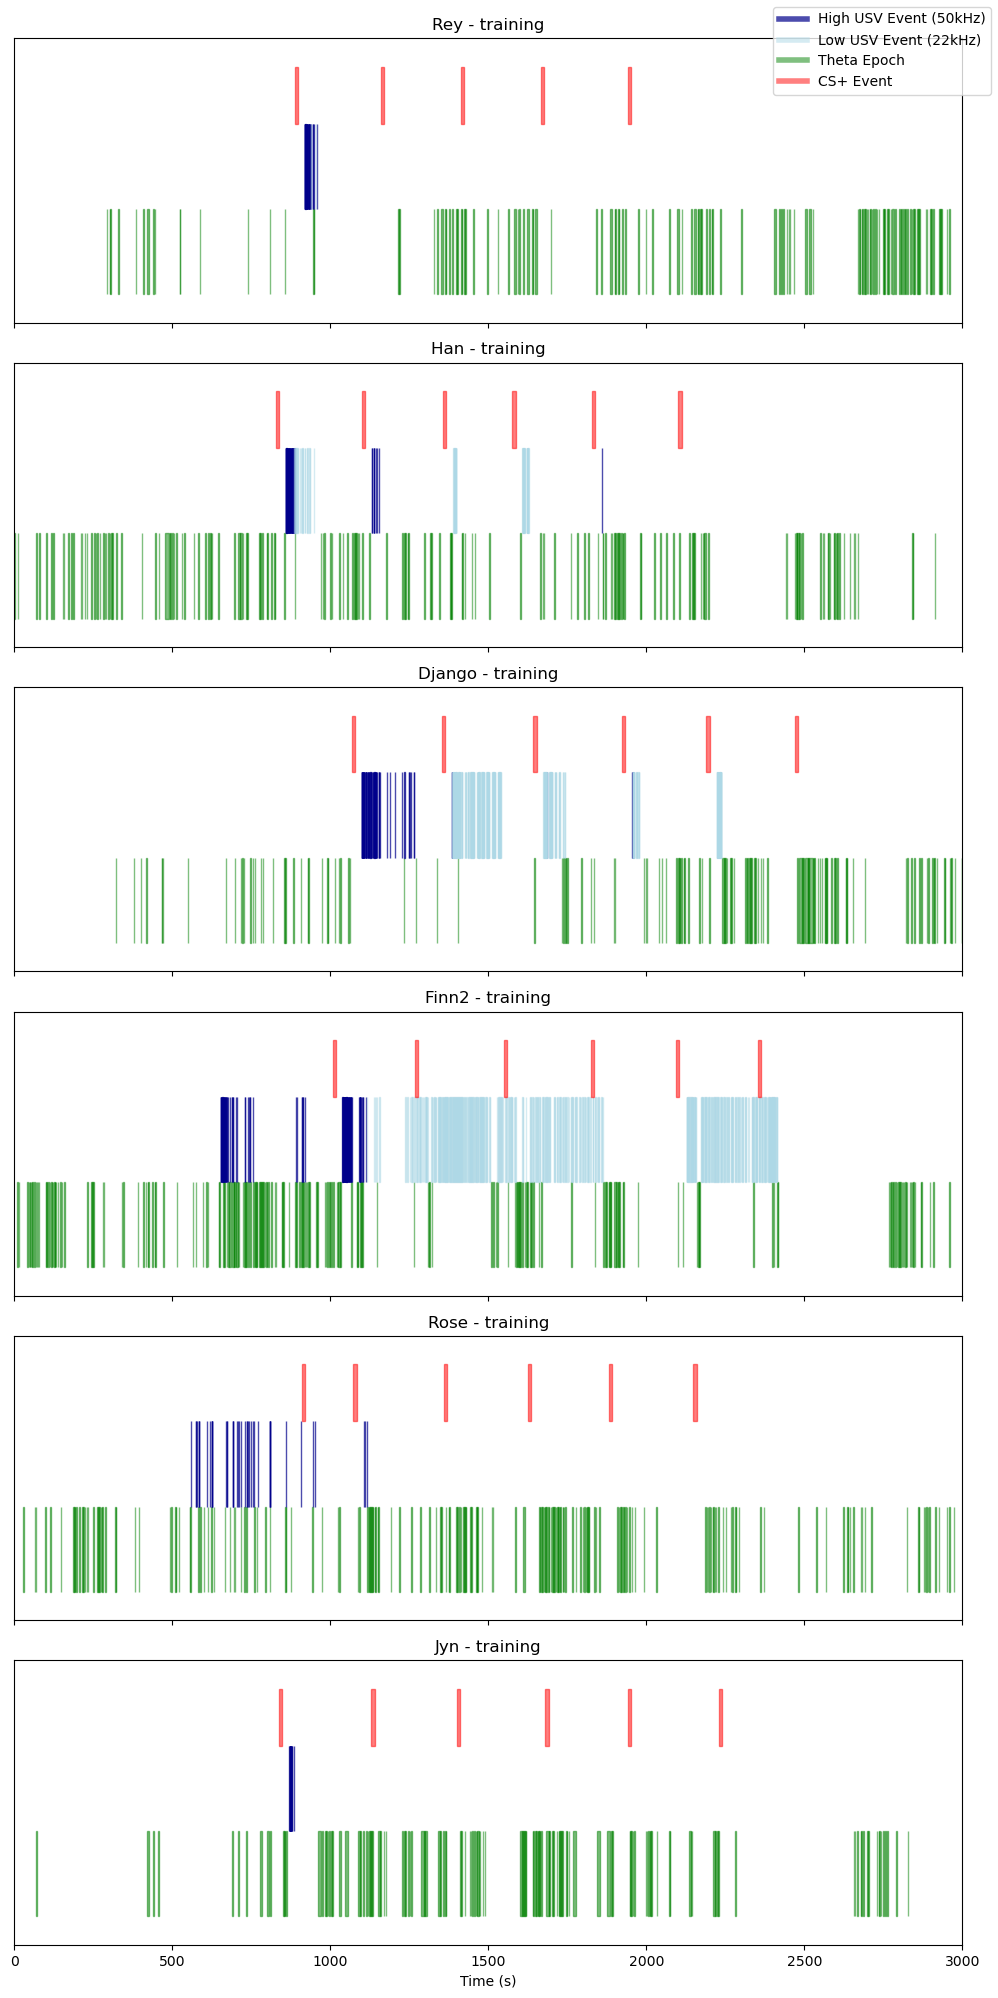

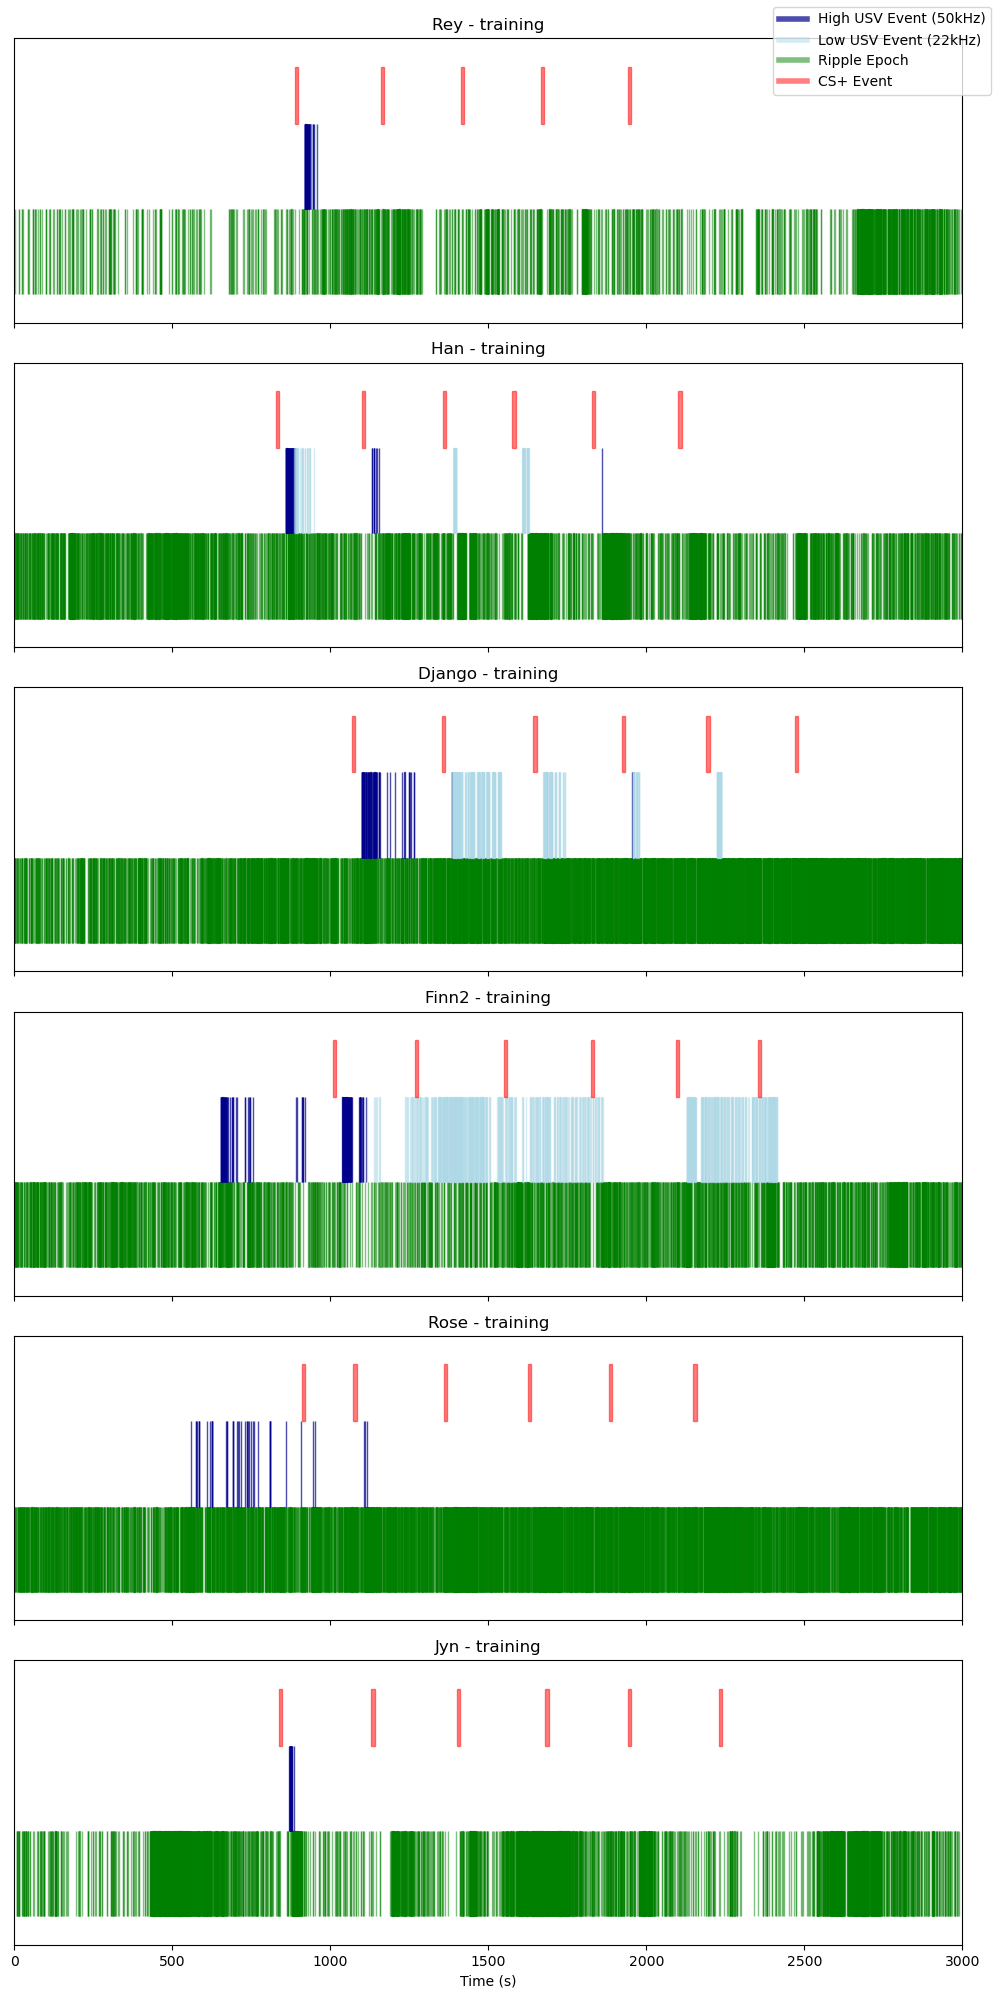

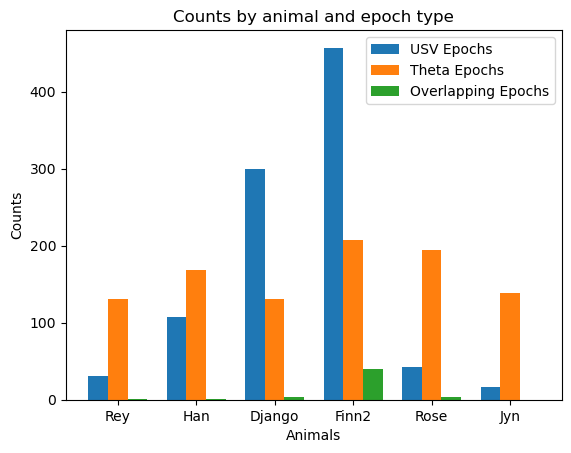

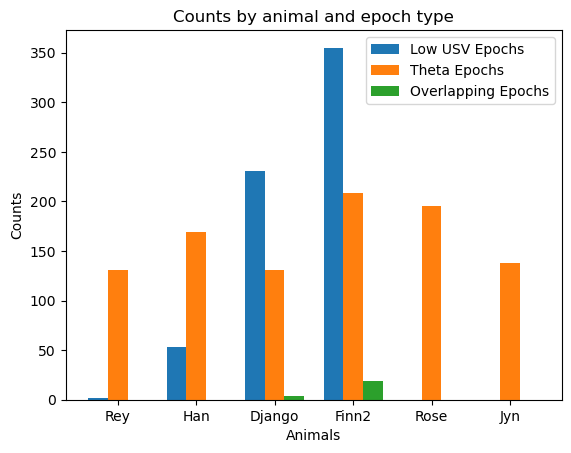

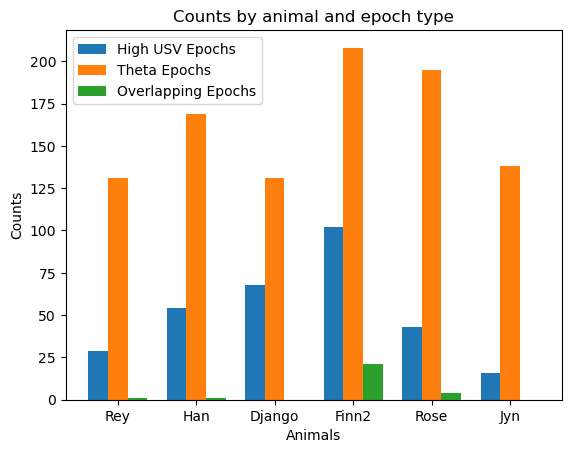

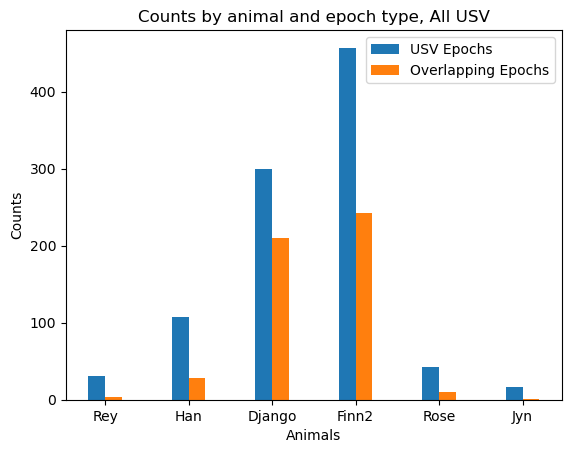

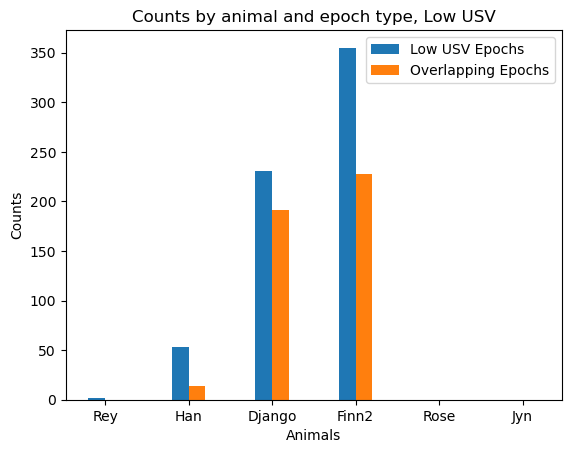

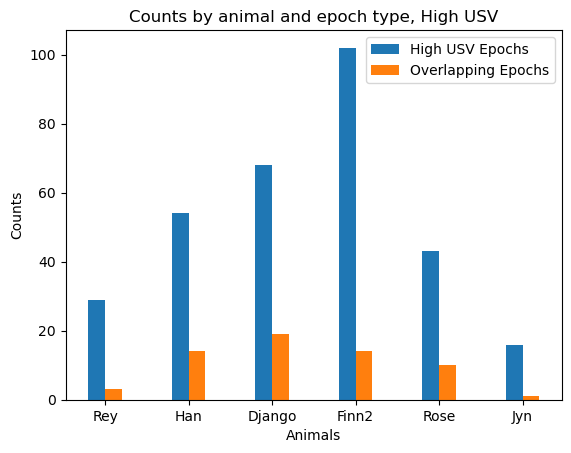

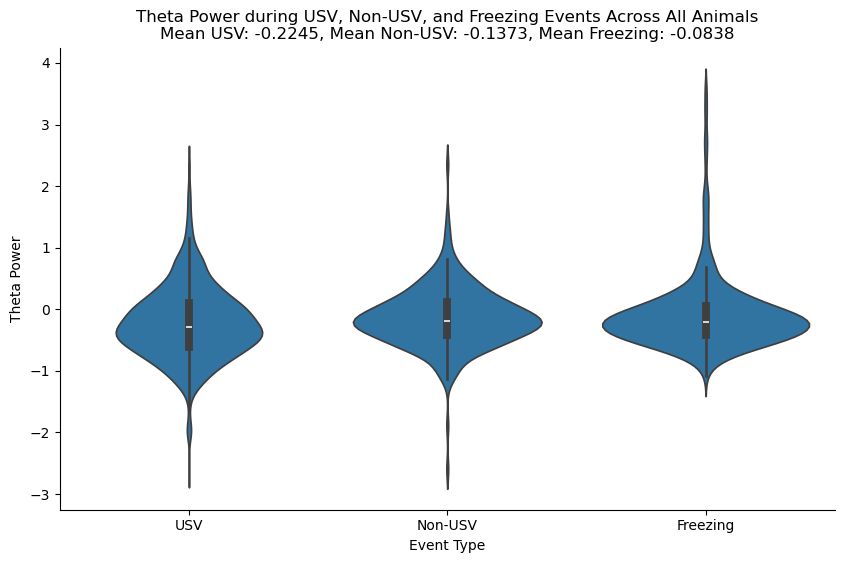

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Provided data for theta power during different events
theta_power_usv_all = np.array(theta_power_usv_all)
theta_power_non_usvs_all = np.array(theta_power_non_usvs_all)
theta_power_frz_all = np.array(theta_power_frz_all)

# Create a DataFrame for each event type
df_usv = pd.DataFrame({'Theta Power': theta_power_usv_all, 'Event Type': 'USV'})
df_non_usv = pd.DataFrame({'Theta Power': theta_power_non_usvs_all, 'Event Type': 'Non-USV'})
df_frz = pd.DataFrame({'Theta Power': theta_power_frz_all, 'Event Type': 'Freezing'})

# Concatenate the data into a single DataFrame
theta_power_df = pd.concat([df_usv, df_non_usv, df_frz], axis=0)

# Calculate the means for title text (optional, could remove if not needed)
mean_usv = theta_power_usv_all.mean()
mean_non_usv = theta_power_non_usvs_all.mean()
mean_frz = theta_power_frz_all.mean()

# Create the violin plot
fig10=plt.figure(figsize=(10, 6))
sns.violinplot(x='Event Type', y='Theta Power', data=theta_power_df)
plt.title(f"Theta Power during USV, Non-USV, and Freezing Events Across All Animals\n"
          f"Mean USV: {mean_usv:.4f}, Mean Non-USV: {mean_non_usv:.4f}, Mean Freezing: {mean_frz:.4f}")
plt.xlabel('Event Type')
plt.ylabel('Theta Power')

# Display the plot
sns.despine()
plt.show()
fig10.savefig('/home/bowenw/Documents/postposter/theta_violin_plots_aggregate.png')

## Stupid way of getting ripple power for all USV/nonUSV/freezing epochs for all animals

In [63]:
swr_power_usv_all= ([-3.35877328e-01, -3.01538139e-01, -4.31785071e-03, -5.59109566e-01,
       -1.03927604e+00, -4.88708425e-02, -4.15934552e-01, -6.81999970e-04,
       -3.97633034e-01,  3.22293528e-02,  4.27883650e-01, -3.24463350e-01,
       -1.44705364e-01, -2.79347817e-01,  7.84418172e-01,  1.85857774e-01,
       -3.09535663e-01,  1.48453266e+00,  1.85099804e+00,  1.20092216e+00,
       -4.58146571e-01, -5.22488121e-01, -7.83769910e-01, -8.59970200e-01,
       -1.06918516e-01,  2.16540578e+00, -5.39546249e-02,  9.84563320e-01,
        2.24941516e-01, -9.72003995e-01, -5.65811208e-01,  3.78518707e-01,
       -2.66522985e-01, -4.26060044e-01,  2.25926763e-01,  7.11931226e-01,
       -4.91145552e-01,  1.20437408e-01, -3.08230887e-01, -3.19364443e-01,
       -5.14542842e-01,  2.08708560e-02,  5.97630396e-02, -2.88311249e-01,
        5.88910458e-01, -3.10381079e-01, -1.35255739e-01, -8.79636212e-01,
       -2.52667847e-01, -7.96062829e-01,  5.20761544e-01,  2.15842934e-02,
       -5.27406030e-01,  1.11053033e-01,  5.53935238e-01,  7.60176080e-01,
        1.19486293e+00, -2.41605311e-01,  9.10580120e-02,  7.82441888e-01,
       -2.17630342e-01, -2.19697316e-01,  1.15282346e+00,  1.32929755e+00,
        1.17389919e+00,  1.20883009e+00,  2.65508570e+00,  8.12446679e-01,
        2.16600039e+00,  2.40047646e+00,  8.50298676e-01,  7.34138078e-01,
        1.32615914e+00,  1.55967778e+00,  1.32082892e+00,  1.34922560e+00,
        1.41802462e+00,  1.40861587e+00,  6.35883287e-01,  4.49900761e-01,
       -1.80880355e-02,  6.86680817e-01,  1.87350188e-01,  5.20388387e-01,
        9.50715946e-02,  3.35294562e-01,  5.80349424e-01,  9.40836097e-01,
        4.48032378e-01,  5.28059260e-02, -4.39667872e-02,  7.95954913e-01,
        1.45838058e+00, -2.41476806e-01,  5.51514474e-01,  2.80285613e-01,
        5.30493201e-02, -2.69254354e-01,  2.57825764e-01, -1.05469914e-01,
        3.03887207e-01,  2.70315876e-01,  7.36666352e-01,  1.50870042e+00,
        2.88116323e-01,  1.45437437e-01,  5.52384710e-01, -4.03297440e-01,
        4.19985141e-02,  3.27980483e-01,  3.87812715e-01,  1.96044579e-01,
        5.76034131e-01, -6.79730404e-02,  1.73936824e-01,  2.57244398e-01,
        1.73697448e-01, -2.14122471e-01,  3.45732566e-01,  7.03118267e-01,
        6.62715780e-01,  6.78019982e-01,  2.77295424e-01, -3.42833201e-02,
        4.39215617e-01,  5.72338203e-01,  2.20018596e-01,  2.88000509e-01,
       -4.18575390e-02,  9.56730372e-01,  2.91598307e-01,  4.11363403e-01,
        4.55128596e-01,  5.16120957e-01,  2.03622482e-01,  5.77176669e-02,
       -1.63487563e-01,  3.82614836e-01,  3.17597588e-01, -3.60475122e-01,
        3.33227825e-01,  3.49080856e-01, -2.50102169e-01, -3.88289368e-01,
       -3.19060165e-03, -4.97299351e-03,  1.40828834e-01, -1.13399693e-01,
        9.25643892e-02, -1.00587922e-01, -2.89329849e-01, -1.36863220e-01,
        1.42803831e-01, -9.68578193e-03, -2.48298493e-01, -1.12334489e-01,
        1.27004003e-01,  1.30973772e-01, -7.33438262e-02, -1.17543572e-01,
        6.54259696e-01,  5.20415086e-01,  1.42277992e-01, -1.40398332e-01,
       -2.02301535e-01,  3.54806187e-01,  5.08815504e-01,  1.72414018e-01,
        6.62104373e-01, -8.05408064e-02,  6.69849828e-01, -2.15839052e-01,
        3.45010107e-01,  4.20537915e-01,  1.12241114e-01,  4.88174920e-01,
       -3.99390470e-01,  3.12918525e-01, -1.71134096e-01, -2.63479874e-01,
        1.00346714e-01,  3.79140902e-02,  4.88453851e-01,  7.47185137e-01,
        2.45957823e-02,  8.89060085e-01, -8.87114911e-03,  2.55928294e-01,
        5.26665407e-01,  1.55989964e-02, -4.23883856e-01, -2.05823091e-01,
        5.99015769e-01,  4.53857340e-01,  3.47064063e-01,  5.85138325e-01,
        1.07351396e+00,  1.79376657e+00,  1.75464469e+00,  1.00748320e+00,
        6.66263747e-01,  2.08335123e+00,  1.20161036e+00,  1.29236666e+00,
        1.33348010e+00,  2.97883664e+00,  3.92674977e+00,  5.79942536e-01,
        1.99106507e+00,  9.21698181e-01,  4.78125941e-01,  3.63662203e-01,
        4.68625306e-01,  5.94785060e-01,  1.58052744e+00,  2.54795439e+00,
        1.06769586e+00, -3.15884433e-02,  8.80933094e-01,  2.92009950e-01,
        1.71707106e-01, -5.96150919e-02,  3.39590913e-01,  5.64697607e-01,
        6.31826752e-02,  4.63443581e-01,  2.36686441e-01,  4.02994895e-01,
        3.00503782e-01,  1.04233627e+00,  1.82736496e-01, -3.80536871e-02,
        5.36825570e-01,  2.67406906e-01,  9.28804854e-01,  3.97882201e-01,
       -4.44653373e-01,  9.61975115e-01,  1.25973151e+00,  8.91835087e-01,
        8.54082131e-01,  9.28551864e-01,  5.96432297e-01,  4.93066645e-01,
        4.53702285e-02, -2.24538946e-01,  1.53001073e+00, -4.98165167e-01,
        6.29772633e-01, -2.53847688e-02,  8.62652850e-01,  7.39278313e-01,
        1.44338740e+00, -4.46474523e-02,  1.73560800e-01,  6.89509679e-01,
        1.54045329e-01,  5.99258732e-01,  2.55064523e-01,  8.34379446e-01,
        3.06484354e-01,  7.73755458e-01,  1.40206879e+00,  8.14640070e-01,
        1.78330402e+00,  9.01720496e-01,  6.73359041e-01,  1.01034563e+00,
        9.44138519e-01,  4.88380500e-01,  9.32071381e-01,  5.29892064e-01,
        1.62167292e+00,  2.03833371e+00,  1.39157742e+00,  9.83008734e-02,
        1.76618616e+00,  2.16125972e+00,  7.21717470e-01,  8.82506209e-02,
        1.01134179e+00, -8.82471073e-02,  6.16653801e-01,  7.48395627e-01,
       -1.15150736e-01,  7.09826713e-02, -1.69538110e-01, -3.41648465e-01,
        1.30366220e-01,  1.06783052e-01,  4.42653256e-01,  1.47132034e+00,
       -1.08197243e-01,  1.87635703e+00,  4.00074795e-01,  1.17111836e+00,
        7.42316014e-01,  9.89720178e-02,  8.72125608e-01])+ ([ 6.27443425e-01,  5.03292502e-01,  1.26108818e+00,  2.74298503e-01,
        1.26912627e+00, -4.23384724e-01,  1.26880087e+00, -6.58385715e-03,
        1.48681073e-02,  5.22770970e-01,  9.52973454e-02,  1.04165384e+00,
       -5.35854996e-01,  4.94311643e-01, -3.08695020e-01, -6.01232610e-01,
        8.92284360e-01,  1.66511989e+00,  1.66529598e+00,  1.18482968e+00,
        3.78862269e-01,  1.31819626e-01,  1.25160233e+00, -3.59081276e-02,
       -1.58187615e-01, -1.37617053e-01,  6.19763529e-01,  8.67371829e-02,
       -8.29006447e-02,  2.30520584e-01,  2.69957044e-01,  2.64858131e-01,
       -2.48430633e-01,  1.43500986e+00,  8.64006248e-01, -4.33497609e-01,
       -8.00915420e-01,  1.08025627e-01, -1.53917169e-01,  3.84746409e-01,
       -7.14185600e-01, -2.43891010e-01, -1.26235134e-01, -2.50481116e+00,
        1.20851338e+00,  1.05414775e-01,  1.53470340e+00, -2.14308823e-01,
       -3.24204598e-01,  8.63496134e-03,  5.77602116e-01,  4.81406882e-01,
       -3.75901840e-01,  1.60714690e+00,  4.70012620e-02,  1.14053864e-01,
       -2.26433179e-01,  4.10996913e-02, -5.37561543e-01, -8.81959213e-02,
       -2.97316243e-01, -5.03839195e-01, -6.40260844e-01, -7.81885149e-01,
       -1.25952594e-01,  1.75982933e-01, -5.07829648e-01, -1.66224413e-02,
       -6.02918063e-01, -4.97272654e-01, -3.18216903e-01, -5.14066234e-01,
       -2.54246213e-01, -8.47841773e-01, -5.53137683e-01, -7.57348234e-01,
       -9.89400119e-01, -9.14312542e-01, -4.88515603e-01, -7.13515431e-01,
       -3.84711221e-01, -4.62601848e-01, -1.10818396e-01,  7.18001960e-01,
       -3.06982602e-01, -7.31426542e-01,  5.10060042e-01, -2.70395162e-01,
        3.29955459e-02, -1.25917879e-01, -3.62199701e-01, -6.16393779e-01,
       -2.94204958e-01, -9.09342323e-01, -7.39569956e-01, -1.13866765e-01,
       -8.67966776e-01, -5.35639867e-01, -3.05679609e-01, -4.61592532e-01,
       -1.81654052e-01, -3.43260370e-01, -2.49741133e-01, -1.21901630e-01,
        3.02282682e-01,  1.46225197e-01, -3.27009671e-01,  1.73172265e-01,
       -3.82160970e-01, -2.21287707e-01, -4.11472174e-01, -1.36721949e-01,
       -9.83236859e-02, -3.12975151e-01, -2.84048934e-01, -8.91730344e-02,
       -2.71100109e-01, -3.54895458e-01, -4.50475155e-01, -3.70694035e-01,
        1.26463205e-02,  6.15604658e-01, -2.52726898e-03, -1.33213569e-01,
       -2.05218695e-01,  7.65195738e-02,  1.65754923e-01,  1.23781189e-01,
       -1.76866968e-01,  1.32346234e-01, -6.65331361e-02, -2.66348432e-01,
       -3.41553161e-01, -1.75540578e-01, -3.52565755e-01,  2.93085709e-01,
       -1.32841330e-01,  2.37692527e-02, -4.99434017e-01, -3.57379036e-01,
       -3.79496849e-01, -4.07043966e-01, -3.77224629e-01,  2.39889056e-01,
       -3.45719445e-01, -3.73490960e-01, -6.48054675e-01, -4.25562261e-01,
       -4.30922742e-01, -5.22667333e-01, -1.72320650e-01, -4.82366318e-01,
       -2.60833995e-01, -5.13055598e-01, -3.13439421e-01, -5.63275693e-01,
       -3.72770550e-01, -1.67022577e-01, -4.43389723e-01, -4.33666080e-01,
       -1.60641554e-01, -5.72859309e-01, -5.93576628e-01, -3.52327977e-01,
        6.89719003e-01, -3.74639184e-01, -5.07361432e-01, -2.46305436e-01,
        6.26115187e-04, -2.98339574e-01, -1.54023074e-01, -4.92321848e-01,
       -5.39639586e-01, -3.92866466e-01, -3.50935104e-01, -6.99057033e-01,
       -5.36172564e-01, -4.68617708e-02, -1.92452767e-01, -2.68117423e-01,
       -6.23238505e-01, -6.50764772e-02,  3.19004823e-02, -5.31885852e-01,
        2.09066091e-01, -2.91395851e-01, -9.06635076e-02, -4.36504246e-02,
       -3.84869238e-01, -3.33586314e-01, -3.46897444e-01, -1.60761721e-01,
        1.00927028e-02, -3.36880005e-01, -4.58718950e-01, -1.26791947e-01,
       -3.59395918e-01,  2.55004217e-02, -6.51078668e-02, -7.25213790e-01,
       -5.75634032e-01, -5.55834866e-01, -4.98001371e-01, -3.10094045e-01,
        4.27845770e-01, -1.49305541e-01, -5.45800908e-01, -3.86517365e-01,
       -2.41299453e-01, -4.69613384e-01, -5.84870083e-01, -3.67948270e-01,
       -4.19782935e-01, -1.79077605e-01, -3.15933300e-01, -6.39255584e-01,
       -2.55794112e-01, -2.45628888e-01,  2.52106729e-01, -2.58657872e-01,
       -3.65445041e-01, -2.56172269e-01,  2.45840169e-01, -3.64419747e-01,
       -1.10686791e-01, -6.17860815e-01, -3.98259350e-01, -1.48991234e-01,
       -3.86465079e-01, -3.36465131e-01, -1.83198436e-01, -1.25455130e-01,
        7.11962979e-02, -5.64146878e-01, -1.12102322e-01, -1.06956854e-01,
       -2.98360840e-01,  3.09308658e-01, -1.59765879e-01, -3.89561246e-01,
        3.51664875e-01, -3.74983602e-01, -6.15288270e-01,  2.88889527e-01,
        1.47194887e-01,  3.49389202e-01,  3.36283107e-01,  2.59482507e-02,
        3.89271280e-01, -6.89287295e-02, -1.53987821e-01, -5.07665153e-02,
       -4.21616610e-02, -3.46990801e-01, -1.68569280e-01, -2.98217915e-01,
       -4.02127496e-01, -3.43011673e-03, -2.53485502e-01, -2.35857364e-01,
       -3.45541153e-01, -3.21393189e-01, -3.47383885e-01,  4.63233319e-02,
       -2.23509495e-01, -3.41720259e-01, -2.27570731e-01, -5.72695941e-01,
       -5.62098782e-01, -9.86256722e-02, -2.93002191e-01, -3.76026573e-01,
       -2.18691029e-01, -5.62903657e-02, -2.43310112e-01, -5.05228898e-01,
       -3.75203798e-01, -1.66290904e-01, -1.69751588e-01, -4.13954440e-01,
       -5.52267018e-01, -5.23987099e-03, -2.27810651e-01, -2.03959632e-01,
       -2.43230278e-01, -3.65063196e-01, -5.31255899e-01, -4.07013128e-01,
       -4.42825590e-01, -4.14872647e-02, -2.85303478e-01, -3.32966071e-01,
       -4.51082552e-01, -1.24719659e-01,  9.92926489e-02, -2.19829552e-01,
       -3.92055439e-01,  1.53750959e-01, -2.21436493e-01, -3.50389163e-01,
       -3.46385673e-01, -2.38302767e-01,  7.50473324e-02, -2.71884168e-01,
        2.23442308e-01, -4.92809031e-01,  5.67274645e-01, -4.56096876e-01,
        3.57771767e-01, -1.33359455e-01, -6.77217004e-01, -3.47869056e-01,
       -2.98700479e-01, -2.26815649e-01, -1.23045077e-01, -2.98756915e-01,
       -4.72241118e-01,  6.83129754e-01,  8.34605369e-01,  5.58421313e-01,
        1.36467291e+00,  1.91837129e+00,  1.41722588e+00,  1.37785503e+00,
        1.11517655e+00,  7.58408924e-01,  5.20565244e-01,  4.95592577e-01,
        4.04377870e-01,  3.74577334e-01,  1.70460648e-01, -7.02646816e-02,
       -3.83459537e-02, -4.71659847e-02, -2.45049792e-02, -1.07857939e-01,
       -2.14005714e-01,  7.38645281e-03,  4.35943858e-01, -1.42293688e-01,
       -5.57650789e-02,  3.31107511e-02, -2.10401578e-01,  3.69534335e-01,
       -1.53801748e-01, -1.54991428e-01, -9.85233997e-02, -3.20958189e-01,
       -2.00527021e-01, -6.17082511e-01, -1.43323883e-01, -6.34748861e-01,
       -4.12445948e-01, -2.24651487e-01, -4.90363175e-02, -4.32476724e-01,
       -4.46365249e-01, -7.17713912e-02, -3.60401255e-01, -6.17267738e-02,
       -3.07585877e-01, -5.50507291e-01, -2.96071087e-01, -1.58984087e-01,
       -2.58717737e-01, -2.16706151e-01, -3.08258164e-01, -3.03964015e-01,
       -7.41896614e-03, -7.16277261e-02,  3.77176384e-02, -5.99691381e-01,
       -1.40807126e-01, -1.45455107e-01, -2.65083651e-01, -7.70575858e-03,
       -2.69861439e-01, -2.61861146e-02, -2.30892390e-01,  9.62933351e-02,
       -3.11516129e-01, -1.44341183e-01, -5.04250105e-01, -6.91394202e-02,
        1.65986300e-02,  1.73027970e-02, -1.05926160e-01, -1.43576622e-01,
        1.82703225e-01, -2.21306621e-01, -2.41524337e-01, -3.15425040e-01,
       -1.28489694e-01, -5.45075025e-02, -7.92895203e-02, -3.30510461e-01,
       -3.19240010e-02, -7.77860144e-02,  6.17086568e-02, -5.41414758e-01,
        3.74613350e-02, -5.13763864e-01, -3.14104791e-01, -1.45048170e-01,
       -5.44845927e-01, -7.47859800e-01, -3.11571296e-01, -2.29099944e-01,
       -2.48611053e-01, -1.17124242e-01, -4.72880364e-01, -3.36650818e-01,
       -2.75969595e-01, -1.54765532e-01, -6.23670638e-02, -5.39460341e-02,
       -7.27945670e-01, -5.27423272e-01, -2.27725914e-01, -3.44841598e-01,
       -3.96944619e-01, -1.03551054e-01, -2.62176976e-01, -4.51406139e-01,
       -5.58662856e-01, -2.80896037e-01, -2.02990312e-01, -6.01257408e-01,
       -2.73437892e-01, -7.44824802e-01,  1.31662316e+00,  1.17293104e+00,
        1.43530372e+00,  1.35146110e+00,  1.15610847e+00,  1.27686282e+00,
        1.01840734e+00,  1.29043434e+00,  1.40116019e+00,  8.88666966e-01,
        8.90816526e-01,  8.86451650e-01,  8.40579861e-01,  9.55040501e-01,
        1.08686775e+00,  7.01069638e-01,  7.43855604e-01,  8.11834164e-01,
        4.84517912e-01,  2.33656839e-01,  1.88348195e-01,  3.46189485e-01,
        2.21718260e-01, -7.11936925e-02, -2.64882595e-02, -1.30550946e-01,
       -1.51930533e-02])+ ([-2.83788173,  3.13613618,  2.8830604 ,  1.59062701,  3.60510732,
        2.19769852,  3.85501086,  3.0682315 ,  2.90191677,  2.04182103,
        1.09811135,  3.30960438,  3.57393741,  2.77074447,  1.5571769 ,
        3.15010331])+ ([ 0.67188375,  0.98746931,  0.24334489,  0.2544151 ,  0.34661545,
        0.5215918 , -0.12773311,  0.11162459,  1.16575433,  0.72170029,
        0.61362188,  1.14170239, -0.11829972, -0.0844484 , -0.11485157,
        0.56655042,  0.68469483,  0.13619628,  0.44435851, -0.08390237,
       -0.11614195, -0.16189222,  0.69450845, -0.13806308,  0.5318755 ,
        0.39807507, -0.50210917, -0.23911179,  0.01605396,  0.2870817 ,
        0.09101094])+ ([ 1.02907639, -0.0157436 ,  0.76353138,  0.83231672,  0.77833534,
       -0.7324103 , -0.9146315 ,  0.43735572,  0.52808373,  0.4510086 ,
        0.32644209, -0.06109027,  1.62766607,  1.6865675 , -0.08693101,
       -0.03838535, -1.04132036,  0.41347201, -0.01548534,  0.12691918,
       -0.11663702,  0.29074123, -0.11296152,  0.48846235, -0.74335943,
       -1.10861356,  0.53130408,  0.04950068, -0.85174352,  0.39767358,
       -0.30431789,  0.18395694,  0.53220724,  2.67810852,  1.82067294,
       -0.98652737,  0.93341735, -0.20259386,  0.36605852,  0.49765486,
        2.16525473,  1.52696576,  0.61466625])+([-2.35941269e+00, -2.35941269e+00, -2.35941269e+00, -2.35941269e+00,
       -2.35941269e+00,  2.28117458e+00,  2.50230521e+00,  3.74894268e+00,
        3.17860761e+00,  3.24283649e+00,  3.16438310e+00,  4.15709516e+00,
        4.34937817e+00,  3.92755077e+00,  1.22927245e+00,  8.96228045e-01,
        2.83329716e+00,  8.80455661e-01,  6.30342923e-01,  1.07430364e+00,
        1.77328901e+00,  1.16632090e+00,  4.07698973e-01,  1.32192364e+00,
       -3.35937196e-01,  2.71591421e-01,  1.81465118e+00,  9.16438532e-01,
        8.53238537e-01,  1.07018951e+00,  1.65073361e-01, -3.82088513e-01,
        1.44285878e+00,  1.24788744e+00,  5.00385170e-01,  2.95827105e-02,
        1.32838114e+00,  4.69765803e-01,  4.58611511e-01, -2.67901367e-01,
        6.82030583e-01,  6.77482298e-01,  5.33263511e-01,  4.34693529e-01,
        2.01195528e-01,  2.80584672e-01,  3.46809632e-01, -1.12157055e-01,
        3.63184442e-01,  2.97676304e-01,  3.69259936e-01,  3.24226363e-01,
        3.68562530e-01,  2.02752081e-01,  3.26201096e-01,  1.76634152e-02,
        4.90317224e-02,  2.77980026e-02,  4.30975286e-01, -1.93507756e-02,
        1.88348930e-01, -5.99625600e-02,  7.67967758e-01, -2.35941269e+00,
       -2.35941269e+00,  1.25152553e-01,  7.94904959e-02, -4.32774135e-01,
       -7.32348447e-01, -2.82035533e-03,  8.58937800e-01,  1.97356791e-01,
        5.40643724e+00,  5.67579049e+00,  6.51241054e+00,  6.05606972e+00,
        5.94410100e+00,  5.65910717e+00,  4.45938528e+00,  4.47697014e+00,
        4.35544716e+00,  3.57829042e+00,  2.02460453e+00,  5.14575020e+00,
        3.29600441e+00,  4.83317027e+00,  5.46122652e+00,  4.99354801e+00,
        4.67200475e+00,  4.50598694e+00,  5.48136442e+00,  4.50492580e+00,
        3.34552683e+00,  3.26332880e+00,  3.59369177e+00,  3.84878724e+00,
        2.44271941e+00,  3.21744823e+00,  2.85414121e+00,  3.14194238e+00,
        2.16703813e+00,  2.35281375e+00,  2.29494892e+00,  2.24748410e+00,
        2.36875932e+00,  1.98961603e+00,  7.19801656e-02])



In [64]:
swr_power_non_usvs_all= ([ 2.65649546e-01,  7.82050994e-01,  2.45313114e-02,  9.38364575e-01,
        1.87254397e-01,  2.07760661e-01,  1.80938991e-01,  7.62438860e-01,
       -6.53225184e-02,  6.62805686e-02, -9.88269753e-02,  1.77390723e-01,
        7.04356445e-02,  4.96994411e-02,  2.69440858e-02,  3.12127768e-01,
       -1.54184528e-01, -2.09020658e-02, -2.06000180e-01, -1.77332095e-02,
        5.25787579e-02,  5.18845274e-04,  1.47667826e-02,  8.02403002e-02,
        8.78519118e-02,  3.87302385e-01, -2.37524140e-01,  1.01312449e-01,
        1.18339505e-01,  5.18973510e-02,  2.30506591e-01,  2.50745952e-01,
        7.39688562e-02,  1.20521486e-01,  5.73733590e-01,  2.26978177e-01,
        1.28515775e-01,  2.99694534e-01, -1.52044881e-02,  2.66408649e-02,
        4.16873575e-02,  6.32542602e-01,  3.61114997e-01,  3.42328536e-01,
        1.92936892e-01,  5.07220542e-01,  3.67214495e-01,  1.69183639e-01,
        3.86169786e-01,  6.98714354e-01,  3.11562489e-01,  4.46238686e-01])+ ([ 1.75791946e-01,  4.65477135e-01,  4.34417218e-01,  1.63910888e-01,
        2.64613211e-01,  3.75085084e-01,  3.18888862e-01,  9.04715825e-02,
        4.85008486e-01,  5.11930351e-01,  5.27697074e-01,  2.54266079e-01,
        1.66787924e-01,  6.07106264e-02,  5.60752006e-02,  1.10108981e-01,
        1.04613782e-03,  3.79961164e-01,  3.18148990e-01, -4.70654071e-02,
       -1.22073903e-01, -1.02289301e-01, -1.78501003e-01, -4.92300498e-02,
       -1.62334628e-01, -3.28021907e-01, -2.03912520e-01, -2.11936298e-01,
       -4.41258580e-01, -1.22580392e-01, -2.55016983e-01, -2.46599647e-01,
        2.92692518e-02,  7.60767476e-02, -1.99231142e-01, -9.26236042e-02,
       -2.32378815e-01, -2.44131622e-01, -2.05599990e-01, -8.11810429e-02,
       -6.39031087e-02, -1.10594103e-01,  1.71602261e-01, -2.13622761e-01,
       -2.40297788e-01, -3.99743312e-01, -2.16512547e-01, -3.21945701e-01,
       -2.38278317e-01, -2.95142192e-01, -3.10371636e-01, -2.31035377e-01,
       -3.14939598e-01, -2.50481116e+00, -1.23989398e-01,  4.10429945e-01,
        4.10015516e-02, -7.03066873e-02,  1.01843829e-01,  2.33147975e-01,
       -2.21127182e-02, -1.46698248e-01, -4.00208449e-01, -3.64464451e-01,
       -4.43876067e-01, -3.81818081e-01, -4.88737269e-01, -2.49423707e-01,
       -3.52613888e-01, -3.35287997e-01, -3.48947581e-01, -3.14791355e-01,
       -4.41827515e-01, -4.38264009e-01,  1.06476261e-01,  6.80928968e-02,
       -1.73647912e-01, -9.51217577e-02, -1.83178383e-02, -9.43170269e-01,
        2.11024163e-01,  5.52368753e-01,  1.21290586e-01,  4.53783358e-01,
        6.05948553e-02, -3.11369137e-01, -2.93466705e-01, -4.90273448e-01,
       -2.97634497e-01, -4.49394302e-01, -4.26324046e-01, -3.00905090e-01,
       -2.73578810e-01, -4.02052852e-01, -1.79920354e-01, -7.18761232e-01,
       -2.12045334e-01, -2.01904604e-01, -3.31331545e-01, -2.12813926e-01,
       -3.86151759e-01, -4.66663661e-01, -3.74985542e-01, -4.44460935e-01,
       -3.95734749e-01, -4.59174462e-01, -4.02000680e-01, -4.61569553e-01,
       -5.25029484e-01,  5.00522879e-01, -3.62427066e-02,  5.86906032e-01,
        8.89017539e-01, -7.47106477e-02,  3.80265085e-02,  5.20839009e-01,
       -1.87887826e-01, -2.22495564e-01, -6.81246494e-02, -3.93787121e-01,
       -3.39575246e-01, -1.71481638e-01, -2.31242297e-01, -3.52490116e-01,
       -3.50823543e-01, -3.64149506e-01, -3.54809577e-01, -2.23630002e-01,
       -1.49253537e-01, -2.15814076e-01,  2.54693508e-01, -3.57596748e-01,
       -3.20922989e-01, -1.68729705e-01, -1.18839104e-01, -3.56166635e-01,
       -1.93520000e-01, -1.81062870e-01, -1.87777601e-01, -1.51125526e-01,
       -1.54957833e+00,  1.96295927e+00,  3.72824262e-01, -1.06531741e-02])+([2.29398099, 1.41158196, 0.36346747])+([0.19296127, 0.2153828 , 0.22491527, 0.33173535, 0.15365383,
       0.2874713 , 0.16849608, 0.14982163])+([0.49373223, 0.44148996, 0.33354843, 0.16664276, 0.28376617,
       0.28258172, 0.17726898, 0.31225741, 0.36232703, 0.26259225,
       0.27651773, 0.42215346, 0.40304501, 0.03005964, 0.50858004,
       0.16672811, 0.41732979, 0.36238341, 0.32241396, 0.33217425,
       0.22239572, 0.18660364, 0.19839504, 0.82402544, 0.10536889,
       1.06113885, 0.23267003])+ ([ 2.86506887,  1.57706577,  1.24971088,  0.79100499,  0.42100331,
        0.61194065,  0.60002941,  0.34988512,  0.31931311,  0.08884946,
        0.53694539,  0.18376971,  0.4172595 ,  0.17138923,  0.09577159,
        0.09447598,  0.14012413,  0.10749436, -0.18552074,  0.20556057,
        0.0325801 ,  0.31815494,  0.36493314,  5.56170079,  0.25759283,
        3.10506034,  0.25949644,  0.16002761])

In [65]:
swr_power_frz_all= ([ 0.45640649,  0.01237711,  0.32960306,  0.15052912,  0.25072516,
        0.14683524,  0.33022259,  0.2732299 ,  0.14807695,  0.55271942,
        0.26049832, -0.18623985, -0.02346908,  0.50624186,  0.13791749,
        0.25283347,  0.03561447,  0.03690819,  0.22595959, -0.01856344,
        0.04195318,  0.28095414,  0.08046858,  0.14729341, -0.01143378,
        0.06905559,  0.11888094,  0.16547235,  0.04285079,  0.20663246,
        0.30947147,  0.31008802,  0.10454467,  0.04713511,  0.12976344,
        0.06097313,  0.17754425,  0.19795899,  0.19654295, -0.08631334,
        0.338735  ,  0.26287342,  0.00690124,  0.12166508,  0.11342264,
        0.09793396, -0.01216308,  0.24796979,  0.29127985,  0.05664791,
       -0.00655149, -0.18451544,  0.06659302,  0.32405361,  0.54022576,
        0.57338835,  0.28923458,  0.47082393,  0.36295826,  0.07586561,
        0.19913367,  0.07892871, -0.00104271,  0.03788269,  0.1122265 ,
        0.07796923, -0.06339252,  0.04940361,  0.11226149,  0.07815095,
        0.11891404,  0.87851823,  0.39509445,  0.42250012,  0.29867454,
        0.26132462,  0.18921024,  0.69778383, -0.08435576,  0.50615973,
        0.39747939,  0.29006907,  0.57607538,  0.43878649,  0.10251018,
        0.39910897,  0.05992578,  0.36836021,  0.3565385 ,  0.17931574,
        0.16545514,  0.07338064,  0.52261528,  0.73216643,  0.462572  ,
        0.45176956,  0.10766889,  0.27621997,  0.19105308,  0.43077331,
        0.44298503,  0.17352674,  0.2975809 ,  0.32540928,  0.32309032,
        0.24728999,  0.52121746,  0.31612263,  0.4380398 ,  0.37459517,
        0.55602884,  0.5470589 ,  0.29241128,  0.44696675,  0.27192627,
        0.12794162,  0.26155396,  0.16740606,  0.13999109,  0.19328693])+ ([-0.18991577,  0.01215131, -0.11491194, -0.21935017, -0.39122573,
       -0.42592633, -0.26719936, -0.24499814, -0.3143897 ,  0.07773572,
       -0.24025261, -0.38586974, -0.31328429, -0.11906895, -0.28919763,
       -0.2729441 , -0.36648089, -0.26673325, -0.39525517, -0.45906946,
        0.07653767, -0.22294381, -0.175128  , -0.19687006, -0.1920397 ,
       -0.40769461, -0.13960167, -0.25185352, -0.07958924, -0.39871856,
       -0.43630873, -0.30031084, -0.34361834, -0.19543718, -0.12370794,
       -0.04098392, -0.35704134, -0.29417409, -0.33237123, -0.30017374,
       -0.20855511, -0.34040318, -0.20022413, -0.24774164, -0.27531989,
       -0.30268299, -0.26184762, -0.30322659, -0.35014603, -0.43002189,
       -0.1414928 , -0.21517336, -0.26696529, -0.2497201 , -0.34788919,
       -0.21621048, -0.17409541, -0.44140221, -0.53303037, -0.29849018,
       -0.1454302 , -0.15715763, -0.14549888, -0.17472024, -0.21666984,
       -0.20314183, -0.23179327, -0.30730795, -0.38321796, -0.22432424,
       -0.22454807, -0.30105616, -0.37545112, -0.15154724, -0.19307484,
       -0.24838394, -0.26644158, -0.25210347, -0.35443617, -0.42933404,
       -0.40230788, -0.21001292, -0.37969486, -0.16638952, -0.22538189,
       -0.05167102, -0.35325535, -0.25484167, -0.08835061, -0.35986187,
       -0.2135296 , -0.33556821, -0.02128482, -0.23931769, -0.1681725 ,
       -0.11108689, -0.13167138, -0.1942814 , -0.23781642, -0.36810315,
       -0.11968085, -0.18141376, -0.12516287, -0.01713759, -0.49825775,
       -0.22837827, -0.23282278, -0.30750992, -0.27712331, -0.15759975,
       -0.32101972, -0.12376295, -0.03229214, -0.26914055, -0.25029309,
       -0.25403262, -0.30838851, -0.15113246,  0.09157096, -0.09099043,
       -0.168293  , -0.17807816, -0.31013703, -0.21095588, -0.38663031,
       -0.2692248 , -0.12611149, -0.37053123, -0.24824413, -0.13512399,
       -0.35679201, -0.07830799, -0.41925152, -0.24480859, -0.24181585,
       -0.16153912, -0.19847346, -0.34339249, -0.1594838 , -0.04770454,
       -0.34673936, -0.30790499, -0.30180787, -0.24052654, -0.43312686,
       -0.09873948,  0.03219992, -0.44459689, -0.38815376, -0.26614928,
       -0.28568627, -0.45980703, -0.15564267, -0.20835863, -0.3459158 ,
       -0.29991532])+ ([-5.40707399e-03, -4.85486343e-02, -3.50516438e-02, -7.95700644e-02,
        2.18863494e+00,  8.27388035e-01,  8.31325733e-02, -2.72904153e-02,
        1.84448989e-02,  6.09158448e-02,  1.86777081e-01, -2.15983394e-02,
       -1.59264667e-01,  3.04708929e-02,  9.13418520e-02, -1.04235543e-01,
        2.09539124e-02,  3.30050203e-02, -3.67479473e-02,  2.15706187e-03,
        1.83896934e-02, -4.61723340e-03,  2.89638962e-02,  1.36414475e-02,
       -1.29020845e-01, -4.95080670e-02, -1.14298158e-01, -9.66254180e-03,
        2.05066478e-02,  1.50308304e-02, -1.08460958e-01, -2.83561094e-03,
       -3.55638241e-02, -6.17580879e-02, -1.15659169e-01, -1.99888712e-01,
        7.44663041e-02,  8.61483587e-02, -1.00768620e-01,  7.10166927e-02,
        2.79372866e-01,  1.80997986e-01,  1.80016572e-01,  1.39004011e-01,
        7.34493406e-02,  2.92431639e-02,  2.17237236e-01,  3.83372368e-02,
       -1.56152734e-01, -8.48309023e-02, -3.01667343e-01, -1.21862358e-01,
       -7.67050481e-02,  4.70691747e-02, -2.77706953e-02,  5.95555828e-03,
       -8.27927996e-03,  4.23636243e-02,  2.02470887e-01,  3.04505756e-01,
        3.38556408e-01,  3.57902335e-01,  5.03866545e-01,  5.49990063e-01,
        7.15901680e-01,  6.71721562e-01,  9.00818087e-01,  5.78690050e-01,
        1.01761614e+00,  7.10107904e-01,  6.66315075e-01,  1.90532241e-01,
        2.41963545e-01, -1.14233268e-02,  4.90027550e-02,  1.01342576e-01,
        1.11125608e-01,  1.17762736e-01,  2.08562075e-01,  1.69201662e-01,
        9.27439422e-02,  2.26175411e-01,  3.69100423e-02, -6.46881178e-02,
        1.46166422e-02,  6.95699381e-02,  1.42966625e-02,  6.57524731e-02,
        3.30907465e-02,  3.48823605e-02,  7.57686406e-02,  3.68817195e-03,
       -7.41515199e-02,  3.64227175e-02, -1.09247548e-01, -1.09586938e-01,
        1.33306176e-02, -3.35974030e-02, -1.16256453e-01, -1.09629702e-03,
       -8.39805273e-02, -1.73301446e-01, -1.62672416e-01, -2.82825995e-01,
       -2.39978614e-01, -2.14306793e-01, -1.87812158e-01, -1.82042598e-01,
       -7.47142954e-02,  7.21557095e-02, -5.12658213e-03, -9.42131581e-02,
       -2.38014932e-01, -1.71801419e-01,  4.24093944e-02, -7.81266526e-02,
       -6.87311409e-02, -4.73223728e-02,  1.04740656e-01, -2.91804038e-02,
       -6.70095928e-02, -9.35120534e-02, -8.31428937e-03,  1.55300242e-01,
        8.78210986e-02, -1.97016634e-02,  2.14620183e-01,  2.68156287e-01])+ ([ 7.51672431e-02, -9.72815776e-02,  1.31797297e-01,  6.27261698e-02,
        1.64879259e-01,  1.44039185e-01,  1.13143713e-01,  1.75299173e-01,
        4.79198214e-03,  2.03243336e-01,  4.10007231e-02,  1.33580110e-01,
        1.76581895e-01,  1.35078378e-01,  9.22969272e-02, -3.79606230e-02,
        1.11531787e-02,  2.11118801e-01, -1.11722922e-01,  3.13166438e-02,
        2.56411554e-01,  7.52377999e-02,  6.07765589e-01,  1.35295471e-01,
        4.44453995e-02, -9.87633073e-02,  4.07759651e-02,  1.41966924e-01,
        3.21615505e-02,  1.25892395e-01,  1.55890173e-01,  1.49063920e-01,
       -2.69277978e-04,  1.02894257e-02, -3.66952807e-02,  1.49098611e-01,
        1.06946918e-01, -1.81273943e-01, -1.27899828e-01,  2.21126130e-01,
       -2.88515446e-02, -3.26166884e-02,  4.75830317e-02,  1.67590478e-02,
       -3.21829201e-02, -6.87534772e-02, -9.41607532e-02,  7.15044863e-02,
       -1.27924187e-01, -1.13414923e-01,  4.20890307e-02, -4.54060330e-02,
        2.20555864e-02, -2.01293298e-01, -1.30554927e-01, -5.02754729e-02,
       -1.15865346e-01, -8.33739834e-02])+ ([-0.14996851,  0.36582709, -0.1258305 , -0.18139854, -0.12091252,
       -0.0385272 ,  0.05527033, -0.00925181,  0.04152712,  0.00586045,
        0.1878676 ,  0.04630777, -0.07651226,  0.0611919 ,  0.28184718,
        0.06274752,  0.15737803,  0.15426049, -0.01732966, -0.03560541,
        0.25355612,  0.40359068,  0.06740387,  0.04246467, -0.07299288,
        0.02932978,  0.15816531, -0.03316659,  0.32898868, -0.10033599,
       -0.18766604, -0.03325208, -0.07112538, -0.03486229,  0.00351891,
        0.39465333,  0.20504346,  0.32473894,  0.25899224,  0.06812005,
        0.05497658,  0.13945673,  0.18373814,  0.01131624, -0.06880269,
        0.07197993, -0.02279677,  0.0907912 , -0.0982279 ,  0.09120914,
        0.15225236,  0.06411404, -0.03713462,  0.20880869,  0.08189356,
        0.36800182, -0.02715396,  0.16457001,  0.09052901,  0.35278027,
        0.00173589,  0.17859894,  0.22961023,  0.24047922,  0.12576961,
       -0.01203676,  0.08619967,  0.05987763, -0.01528344,  0.15309101,
        0.35787684,  0.17316657,  0.15369905,  0.11843067,  0.06184959,
       -0.00572251, -0.00928672,  0.10780126, -0.06391299,  0.31780456,
       -0.10915274,  0.06766376,  0.06325033, -0.24570934, -0.10432288,
        0.23962439,  0.22678504,  0.20459862,  0.1060528 ,  0.34281468,
        0.32476885,  0.62347128,  0.18394279,  0.19815737,  0.16041819,
        0.19332317,  0.11907701,  0.17317365,  0.21013845,  0.11923356,
        0.04402362,  0.06241467,  0.27610848, -0.08265883,  0.26300309,
        0.14030809,  0.04660964,  0.10326704,  0.09808448,  0.04726503,
       -0.40246208,  0.09858333, -0.04393758,  0.00611687,  0.09771185,
       -0.07338908,  0.04429198,  0.20426577,  0.03191333,  0.13044822,
        0.16904717])+ ([ 0.09121121,  0.31690785,  0.16529469,  0.15207921,  0.11327172,
        0.13204946,  0.11964913,  0.45393257,  0.36502943,  0.22220718,
       -0.18449346, -0.14377287, -0.20985565, -0.07746153, -0.11407164,
        0.4197126 ,  0.20920061,  0.35582821,  0.32727799,  0.32954663,
        0.34149068,  0.44874182,  0.32297192,  3.47206581,  0.22482075,
        0.18393861,  0.24269011,  0.20069315,  0.07629211,  0.0599719 ,
        0.06953063,  0.18553629,  0.03005424,  0.03909936, -0.00645789,
        0.03337564, -0.01960665,  0.0683846 ,  0.11888406, -0.00408713,
       -0.00574816, -0.05173207, -0.09379243, -0.08276594,  1.09503114,
        0.29491253,  0.09584699, -0.1625486 ,  0.03056026,  0.0704729 ,
        0.21909099,  0.25842999,  0.37480592, -0.16820079,  0.0347391 ,
       -0.12925049, -0.0899679 , -0.16577481, -0.1257639 ,  0.30598055,
        0.21411156, -0.09011137, -0.13901655, -0.06859437,  0.18566127,
       -0.00487279, -0.10121201, -0.00911444,  0.23476272, -0.04978891,
        0.31003436, -0.01435404,  0.02322371, -0.16412884, -0.03412062,
        0.00388995,  0.39953837, -0.05239483, -0.18018796,  0.06655683,
       -0.12877785,  0.02649167, -0.14119844, -0.10571899,  0.35998924,
       -0.27500068, -0.28331668, -0.00713121, -0.18302441,  0.25676113])

## Violin plots for ripple power during USV/nonUSV/Freezing for all animals

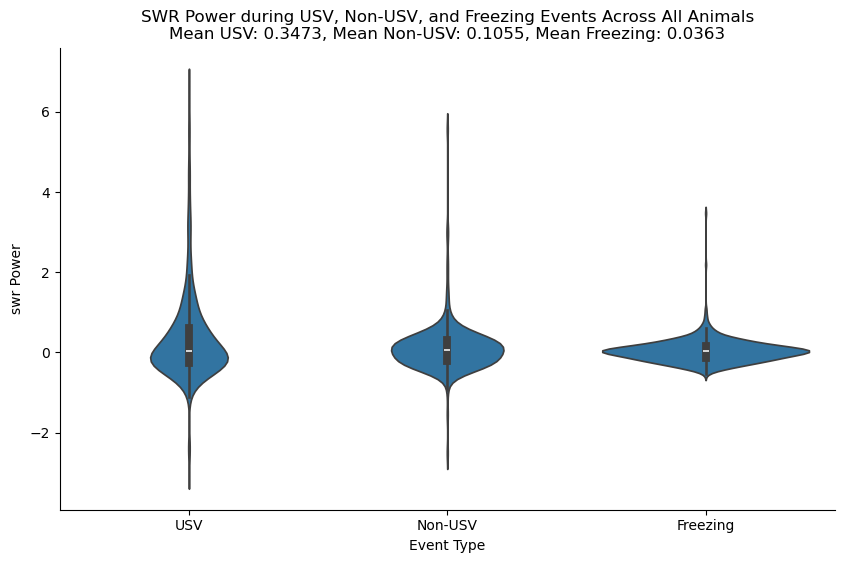

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Provided data for swr power during different events
swr_power_usv_all = np.array(swr_power_usv_all)
swr_power_non_usvs_all = np.array(swr_power_non_usvs_all)
swr_power_frz_all = np.array(swr_power_frz_all)

# Create a DataFrame for each event type
df_usv = pd.DataFrame({'swr Power': swr_power_usv_all, 'Event Type': 'USV'})
df_non_usv = pd.DataFrame({'swr Power': swr_power_non_usvs_all, 'Event Type': 'Non-USV'})
df_frz = pd.DataFrame({'swr Power': swr_power_frz_all, 'Event Type': 'Freezing'})

# Concatenate the data into a single DataFrame
swr_power_df = pd.concat([df_usv, df_non_usv, df_frz], axis=0)

# Calculate the means for title text (optional, could remove if not needed)
mean_usv = swr_power_usv_all.mean()
mean_non_usv = swr_power_non_usvs_all.mean()
mean_frz = swr_power_frz_all.mean()

# Create the violin plot
fig7=plt.figure(figsize=(10, 6))
sns.violinplot(x='Event Type', y='swr Power', data=swr_power_df)
plt.title(f"SWR Power during USV, Non-USV, and Freezing Events Across All Animals\n"
          f"Mean USV: {mean_usv:.4f}, Mean Non-USV: {mean_non_usv:.4f}, Mean Freezing: {mean_frz:.4f}")
plt.xlabel('Event Type')
plt.ylabel('swr Power')

# Display the plot
sns.despine()
plt.show()
fig7.savefig('/home/bowenw/Documents/postposter/swr_violin_plots_aggregate.png')

## moving speed during highusv/lowusv/frz

In [67]:
#Django, Finn2, Jyn, Rey, Rose, Han
speed_freezing_all=([ 0.10841589426774156,
 0.06896117774786406,
 0.09052476505546042,
 0.1049834342973061,
 0.09220196240451871,
 0.11621084123912162,
 0.0932735695201217,
 0.11007554733165531,
 0.07692834786753826,
 0.10809900299664053,
 0.10407902366790725,
 0.12377033481895669,
 0.09080519117588093,
 0.11054846734334885,
 0.11144714784644807,
 0.09803279682271265,
 0.07178856744651091,
 0.05932785033052403,
 0.114262305750668,
 0.09142619948917957,
 0.10679145492408715,
 0.07791915762609963,
 0.07351029010175966,
 0.0871558187468369,
 0.11428308252310646,
 0.05988320895401994,
 0.10482478697415,
 0.10172793032154089,
 0.11981468513285529,
 0.09839308137345923,
 0.13950910487849555,
 0.07619195169712929,
 0.07149492038204139,
 0.11116159564053986,
 0.08794507765936921,
 0.09132766898892361,
 0.08334107410643529,
 0.07165964587704263,
 0.07357314982155624,
 0.08753943599359698,
 0.08893616264905055,
 0.11064467968300923,
 0.0923411922075248,
 0.07594895555061991,
 0.062017779627778276,
 0.057751370880362085,
 0.07801437681028373,
 0.06331383349532006,
 0.10145018199400466,
 0.09051776438298034,
 0.0783192568229089,
 0.10180793980611133,
 0.040678956974738535,
 0.08094496020941391,
 0.06760775604806121,
 0.08658124117652034,
 0.12382828031066138,
 0.10024815066751999,
 0.09396408734583483,
 0.11024379500987072,
 0.0920912499318304,
 0.06553109789656217,
 0.09202559383677583,
 0.09352139489246854,
 0.08137184086857749,
 0.09603686985170894,
 0.10241045855651112,
 0.10815911450808108,
 0.0641704416460389,
 0.08193670640936603,
 0.055830669264770476,
 0.11644505687688961,
 0.0963170304300661,
 0.09007559333966422,
 0.12150110374560764,
 0.09106836682708505,
 0.07466958873199342,
 0.10418077784092798,
 0.12060003113744334,
 0.09649749947147492,
 0.11044993596517687,
 0.10263632042042391,
 0.10419613018388266,
 0.08011412475679669,
 0.11316424097003058,
 0.08669097648368933,
 0.09830066592799794,
 0.09797159901177034,
 0.10743082041444064,
 0.11914877149619835,
 0.09516179818606259,
 0.08707679760774553,
 0.08556231958910843,
 0.08148337305002148,
 0.09244132517257123,
 0.12652329497046466,
 0.11906755481691995,
 0.10407032719873521,
 0.11897427379190924,
 0.09505849403552406,
 0.07876053931739134,
 0.08454171314498046,
 0.10010181798793677,
 0.061973827773287096,
 0.07802536472292708,
 0.06843969558332141,
 0.1030347337466849,
 0.0860651755875065,
 0.10276598213635446,
 0.06360850521502398,
 0.09607846888092575,
 0.08315584565557031,
 0.06483884072686273,
 0.09787389058561514,
 0.09142200146957681,
 0.08748492475116498,
 0.09769103070245311,
 0.08984702891536908,
 0.08877846165056073,
 0.075529250795697])+ ([ 0.09092375888239358,
 0.12466390679324321,
 0.11873339096451212,
 0.10985662418429215,
 0.09130976761852938,
 0.09650251242918663,
 0.09387627050796583,
 0.08543130889659899,
 0.08897344486982214,
 0.09970192771049731,
 0.07672881458504309,
 0.103677800646679,
 0.08941023325727715,
 0.09102782101009414,
 0.07534173439976603,
 0.08615833385682453,
 0.07405915844814581,
 0.09025112114676445,
 0.11045011665618339,
 0.09509319074576435,
 0.10967486549118852,
 0.08479011623604722,
 0.111862943435057,
 0.10097213444061173,
 0.10872038041554705,
 0.1235861991838526,
 0.10681415011320657,
 0.11479949963637277,
 0.09227657701070253,
 0.11415535274546894,
 0.12290645040436181,
 0.08994056486303355,
 0.10243637979810248,
 0.08355120749708381,
 0.08671688087293847,
 0.09904870982511256,
 0.1197550838027718,
 0.12132549452241645,
 0.09471795814896199,
 0.1002217060204067,
 0.10440816283727815,
 0.10177970560874407,
 0.10064940421572578,
 0.10167251540975983,
 0.08081061618946589,
 0.0825137894434344,
 0.0897937842161702,
 0.0824215546397325,
 0.09517645277973236,
 0.09577254729224415,
 0.08712069290270354,
 0.08853752688289389,
 0.0710946053252662,
 0.07442710834614544,
 0.09678725715506385,
 0.07949352906618694,
 0.09433618999743426,
 0.10017119149914873,
 0.08556676220576366,
 0.08227977674054544,
 0.09083400492917519,
 0.08880855104841955,
 0.08900357264045154,
 0.09427361391841861,
 0.07513932259377994,
 0.08627116061680687,
 0.0804348450994188,
 0.11627113327626347,
 0.08253051126255288,
 0.06737799835482743,
 0.09153345023732984,
 0.08759902779210518,
 0.09175744726361253,
 0.08342223612593398,
 0.08806335296290989,
 0.0821387716173358,
 0.09099535258985225,
 0.1064502812008516,
 0.10764736240283924,
 0.1041729327203199,
 0.10676875788621995,
 0.0979801401877295,
 0.10491591512060579,
 0.09704493191620793,
 0.0905415785006442,
 0.10432841954862247,
 0.11355343687724277,
 0.11888859028133959,
 0.09573199957362345,
 0.08205237525875922,
 0.09995821878885139,
 0.09232533820112344,
 0.09771882580392478,
 0.10306258824834107,
 0.07668761156116437,
 0.08233133898415902,
 0.10612895588238734,
 0.09219466595778343,
 0.0767610339916111,
 0.08723678515693337,
 0.08164290275447554,
 0.08919926809187005,
 0.09321129045084232,
 0.08142851177754368,
 0.07658591724813671,
 0.10476976642074835,
 0.09919708994891745,
 0.08558351433193066,
 0.13832217177631698,
 0.10267283672179911,
 0.11396755075254045,
 0.10473027620308374,
 0.0859471914107717,
 0.0984218289317846,
 0.08672436396340774,
 0.0964193605566676,
 0.10011140281538536,
 0.09157668798862807,
 0.0892952670375471,
 0.11217592757448042,
 0.10170203738291156,
 0.08223657192153994,
 0.09277441339457845,
 0.09986714453911023,
 0.11145735601499579,
 0.08269331742165466,
 0.09222084994248271,
 0.12289911983313645,
 0.09522033916558169,
 0.09960430572309542,
 0.1234737700485426,
 0.12006194076146631,
 0.1240645790893307,
 0.09554795308512694,
 0.0827412413274116,
 0.0934928252515595,
 0.10547504719239886,
 0.09030304351594548,
 0.09292554838178212,
 0.1042941595238278,
 0.09379657565962,
 0.09512188719158346,
 0.08704139445929411,
 0.09734004782677767,
 0.10887797201602033,
 0.12356616371660094,
 0.11544103713551636,
 0.09758911607514147,
 0.08796756351932815,
 0.07867100686367046,
 0.10964044690533752,
 0.09361485704733641,
 0.08986138162498428,
 0.10277932089066699,
 0.10435038922362258,
 0.09697231459734315])+[0.12222498477968541,
 0.0962200804696761,
 0.11647964918456763,
 0.10874028128388068,
 0.07713860283239025,
 0.06961082803219751,
 0.06477491133848995,
 0.10097299862121056,
 0.08307952759843486,
 0.08720264943442875,
 0.11622570712113639,
 0.07592851331422888,
 0.08901950183391638,
 0.1188735554233613,
 0.09493249723267069,
 0.10490664133450579,
 0.07754336064190548,
 0.09596670855478197,
 0.07304799694292473,
 0.083756751480573,
 0.1207494212850629,
 0.0869803990685955,
 0.11487777441669329,
 0.08050821341215425,
 0.10141463002822083,
 0.0898323895765062,
 0.09152726795277316,
 0.09954249647160235,
 0.09792166281041177,
 0.09047551142394442,
 0.10080822790622794,
 0.08349504571626096,
 0.09176447197085291,
 0.10242572645113074,
 0.10676392081313103,
 0.0995477136166408,
 0.07837332977264251,
 0.0861959666741139,
 0.12013213728338161,
 0.10265341363945278,
 0.07039986980028518,
 0.0841311144542648,
 0.08240639373260607,
 0.06457966582353425,
 0.08629753512727542,
 0.07304400060967985,
 0.055116622587364904,
 0.07067400712605572,
 0.06622388723082559,
 0.0849553894894881,
 0.062486558713620355,
 0.05767469499431691,
 0.11908726921364689,
 0.09385825526636604,
 0.06665855805515804,
 0.07111284698958,
 0.09392729822767194,
 0.06499334708289949,
 0.06893206966780899,
 0.08818872280035407,
 0.06646434685318407,
 0.06313476872403172,
 0.09126118540303649,
 0.05422484469733063,
 0.07822567808261999,
 0.05743003473770772,
 0.11981541973069118,
 0.07361356736176437,
 0.09343350785437558,
 0.061184805369492876,
 0.1293616574695956,
 0.12176342997317932,
 0.10589618103685505,
 0.11857360717356469,
 0.08938893915650266,
 0.13326014355290627,
 0.09556698474460408,
 0.08378573625252701,
 0.13895429806897397,
 0.10064184053815155,
 0.08332394856479466,
 0.09273293091239093,
 0.10836169929038697,
 0.10647414655794149,
 0.12595285071830206,
 0.11810466318855575,
 0.11920804224680073,
 0.08335140305111642,
 0.07438094519152963,
 0.07885413705857866,
 0.09150934824348116,
 0.08947186086277299,
 0.0862197776482753,
 0.09286345367736688,
 0.08467195685956037,
 0.06714472572627739,
 0.055817587419884455,
 0.060575649783232176,
 0.06700518878300549,
 0.07065471075628295,
 0.11468810422687652,
 0.10143988129524034,
 0.08786319057067007,
 0.10839625059006766,
 0.11217683044295891,
 0.07751408269016295,
 0.10141768206282593,
 0.08814080339727101,
 0.08058217385364466,
 0.09030119959403693,
 0.09516085126645536,
 0.10631551056883698,
 0.09298515487463639,
 0.12485665784030404,
 0.0889474321214975,
 0.10664650398207924,
 0.07443963960989294,
 0.09534797141918605,
 0.10093689316427235,
 0.09078796251951152,
 0.09890339032996762,
 0.1153150309841946,
 0.08930835922090861,
 0.12038690580347762,
 0.10965015731273768,
 0.10780271091669356,
 0.09443185809229332,
 0.058253209117328696]+[0.12136936588530996,
 0.13255643156494917,
 0.1187137555755696,
 0.11078038183681402,
 0.11040471608495564,
 0.12537381470306347,
 0.12185501417815219,
 0.11752206037443326,
 0.12651980815206584,
 0.12407098793866655,
 0.12333919631865618,
 0.11682104991176384,
 0.09907360634348589,
 0.11619095742953389,
 0.10246621958698254,
 0.12217027013012344]+[0.09348377889331093,
 0.08719212670163964,
 0.09345159721525301,
 0.06964222001147455,
 0.11101019404846578,
 0.10748624204200403,
 0.10702208539039418,
 0.08453845316884726,
 17.114937077694734,
 0.10928712275890544,
 0.10752489497628015,
 0.08339173827484882,
 0.10758293833877564,
 0.07900055493254342,
 0.0990782972437778,
 0.0920761147494786,
 0.0731323170177054,
 0.09635883560181083,
 0.10505351062352293,
 0.13433959576619708,
 0.10952045805570416,
 0.09666535787157243,
 0.09412134579256537,
 0.0823284923991956,
 0.09385375481547502,
 0.07701964260738578,
 0.09778246235176773,
 0.10099684480483115,
 0.1082186547357193,
 0.09419634311100994,
 0.0914149867162833,
 0.08453214025703674,
 0.07370837087374042,
 0.06788194516149441,
 0.0709410566181757,
 0.08523586087765066,
 0.09438439002929652,
 0.09499561123679709,
 0.09863096850794041,
 0.07274335402017093,
 0.07581635049766952,
 0.11339865917592977,
 0.10156141283049469,
 0.0981059401759748,
 0.10436167919673506,
 0.09685344109168766,
 0.09040655872346048,
 0.09209689113020661,
 0.1419967038172871,
 0.08188247261824703,
 0.11359184473413492,
 0.11961598544132215,
 0.0991766360090405,
 0.0887388763564499,
 0.0916038191650675,
 0.09003283095648994,
 0.0926163515405679,
 0.06130714951996965,
 0.07103158706273978,
 0.1037836238960714,
 0.08896098665644153,
 0.11212389265754877,
 0.09421784315897468,
 0.11257917671423559,
 0.11548956881441673,
 0.1088381778230023,
 0.12454444457995525,
 0.10958801074981885,
 0.09562976465319073,
 0.08840493057663477,
 0.0827570095291075,
 0.10713879264398839,
 0.09362465225533309,
 0.0891461403867408,
 0.10090173320729227,
 0.09513955418447081,
 0.09393294921353025,
 0.08800862722097132,
 0.0904267051287088,
 0.09853548593824353,
 0.09659298323395916,
 0.11409280066003848,
 0.10017868745693254,
 0.11289433729299135,
 0.10716094289655684,
 0.10347281172421575,
 0.12958010667701605,
 0.11130482674638474,
 0.09814211877403317,
 0.12104665866328518,
 0.11405153603383325,
 0.09800051123147688,
 0.09997211984137395,
 0.07370924554623055,
 0.07689929011859829,
 0.08904621531574634,
 0.11644725235020417,
 0.09532288441615318,
 0.09608763811273834,
 0.09394759391949777,
 0.10936297923730166,
 0.08376439143181709,
 0.09372262016819308,
 0.08940198517251338,
 0.10769804274159478,
 0.058871850608086786,
 0.07055097554802925,
 0.06450341288522224,
 0.05630938680194485,
 0.06716477783736065,
 0.08227003033879236,
 0.08932310051705596,
 0.08411697646298126,
 0.1122592611883877,
 0.06807260180531494,
 0.07507326037073592,
 0.11491247886389419,
 0.10137643829091206,
 0.09695688147397828,
 0.0954675505556888,
 0.09450846716314402]+[0.12893457716685738,
 0.10637782643558905,
 0.12295548198783636,
 0.09603480597417346,
 0.08621626063022801,
 0.09522092364329394,
 0.10308146727323324,
 0.1311031728645341,
 0.1027050647501072,
 0.10894508390622228,
 0.11103606883463552,
 0.11432825275832074,
 0.12254050211235251,
 0.09866734241693118,
 0.11109930276965445,
 0.10204258328750292,
 0.11719522181695849,
 0.0931648343143605,
 0.10569056726708212,
 0.09488308183364441,
 0.13619840125760307,
 0.10357962045778095,
 0.09413273604193531,
 0.0786213388553232,
 0.12195242406986677,
 0.08595588297279892,
 0.09169759670280454,
 0.07275790730101671,
 0.09644240521445638,
 0.10791134264404437,
 0.11720088002182086,
 0.09022711047975476,
 0.084872153397657,
 0.11575468676765562,
 0.07023928734581215,
 0.10330873696097582,
 0.10450537505909413,
 0.10972515592150034,
 0.09952034949351918,
 0.10398811561469211,
 0.1077278513649143,
 0.0810341968834561,
 0.0984289291262261,
 0.11968829544440855,
 16.027024606716253,
 0.08171030399883886,
 0.07808681100122293,
 0.09997103633564859,
 0.10624281652529953,
 0.08550694112814718,
 0.09584822756348718,
 0.08844444856242784,
 0.09890063888765685,
 0.1063026985530515,
 0.11615219302524966,
 0.11198507562303954,
 0.07774265515608948,
 0.08909279644256508,
 0.10507388004804362,
 0.12031471265181212,
 0.1086007247955853,
 0.09804038571402668,
 0.09265214891360242,
 0.10995831894845365,
 0.1094653835275671,
 0.08633196189681189,
 0.11957702893831047,
 0.09743890216250765,
 0.11079756608667773,
 0.10064179317406832,
 0.11917394226318989,
 0.11483484319049259,
 0.08649091854496987,
 0.10942858507359321,
 0.0836099239741947,
 0.10302879283542339,
 0.09984171178831666,
 0.08360899838993127,
 0.12501121104727111,
 0.11009021830129873,
 0.08346411705385272,
 0.10655461572536734,
 0.09317319966560443,
 0.1024296382523264,
 0.12437121553696394,
 0.101789227633246,
 0.12373755493670667,
 0.0939177210078112,
 0.12222056096133876,
 0.11122225897682458]


In [68]:
speed_high_usv_all=[23.35712746480872,
 21.73404241764818,
 18.173610970712318,
 5.679474845514656,
 2.3525856109292786,
 0.663287239970873,
 0.14661815133804187,
 0.2649667726380541,
 0.13756042269437616,
 0.05292984734703343,
 0.04643723952078173,
 5.871130370433913,
 0.5076406037647674,
 0.3828032957317717,
 0.029727367297464877,
 0.15947782099125563,
 0.10213104918434505,
 0.29510325110894015,
 0.5403457023077367,
 5.268917443926881,
 1.999066180896917,
 0.7683057445641035,
 0.09747020344192721,
 0.3335086224837444,
 0.1980605239112899,
 0.11258358414140321,
 0.10717999675395562,
 0.17039604692515123,
 0.8434279115101476,
 3.4858365941262512,
 5.369009819755363,
 0.43489147291896024,
 0.2938230712423248,
 0.0992170489266319,
 0.6751674563330825,
 0.6077579721750814,
 0.3191622906917442,
 1.624636854933895,
 6.436171999604593,
 1.1089416587229395,
 1.1041138461704236,
 0.13086694509863206,
 0.09379819294824791,
 0.9999973100748148,
 4.405365636622407,
 5.2126886206637755,
 0.1850506790464276,
 1.0991621001180334,
 3.7415053288744238,
 0.13206251244999934,
 0.12596511837364865,
 0.09040117062706834,
 0.15897586374157147,
 0.8766696556362934,
 0.18690050539502998,
 0.028919201031585608,
 2.7219083681185983,
 0.7980807471107684,
 4.760895045664768,
 0.08562722039861222,
 0.23705698330713293,
 32.74340651600048,
 18.084112206552494,
 1.2003464411867109,
 25.9152298393397,
 25.102998445474412,
 14.735802407019975,
 5.874135303584255]+[23.506480123523126,
 14.154870189621521,
 7.108234105270276,
 7.2884329163702954,
 7.506602992117822,
 27.45685573193675,
 5.044874504900472,
 25.406445102906662,
 3.055372434069071,
 0.768726922020508,
 0.39679938931436465,
 10.68946361519456,
 2.176568543684551,
 0.5161546277321482,
 3.2584966449833086,
 1.0331793098390665,
 1.483230690143949,
 7.922369353677308,
 16.068817638531364,
 5.51812065635804,
 10.161464218323363,
 4.994844201977825,
 9.428301866023896,
 10.496851806456561,
 10.051831746133171,
 5.779332418557759,
 15.061902529784614,
 6.358719115889778,
 0.6367610611862576,
 4.873627419602324,
 3.244811897034367,
 2.1638178655371525,
 13.3170583852046,
 11.999573981242584,
 0.28026143440603346,
 0.8691301386335124,
 1.1304370188917856,
 6.249406311935421,
 1.8586046132443312,
 0.819986023106077,
 0.2835870299221603,
 7.2433227869562415,
 32.17520750672162,
 15.182767147502092,
 27.932177326681234,
 26.14061646058414,
 21.013491680653367,
 17.02309066853943,
 1.5696265315006768,
 1.0874081848690174,
 1.3305975291063565,
 0.7976913873012863,
 0.4756650222650865,
 0.5388616722607097,
 0.4758099759876556,
 0.14688056789755866,
 0.15147601679437583,
 0.18601071059102567,
 0.28192969175565863,
 0.13242270694543934,
 0.10290887657618977,
 0.1770931657461503,
 0.03774715382718484,
 0.21801223635673575,
 0.11120792495486767,
 0.14015825283517538,
 0.18037832777605026,
 0.11346333707784928,
 0.17611645060293485,
 0.039866982491812974,
 0.037919685726841484,
 0.12456308763361684,
 0.04275452781101901,
 0.1200398320543268,
 0.03429227133234187,
 0.14373579543228326,
 0.25282264658482595,
 0.20623209305508364,
 0.3543796047313379,
 0.22011842138953944,
 0.11453816427868344,
 0.3053519966738002,
 0.4551449324934456,
 1.9081026353039585,
 0.2593178766878705,
 0.34712019117994464,
 0.16029391355137737,
 0.07296775383780432,
 5.435245788325542,
 0.7355324579849527,
 0.5303261557074314,
 0.09133155678688967,
 0.10543822572468822,
 0.7309460979661705,
 1.8907851223965866,
 7.990536269744335,
 4.584945436621055,
 0.389056476163781,
 0.4796012276657089,
 0.1061966650604271,
 0.40723753974618193]+[37.487552682648236,
 1.5874462576111603,
 0.5967787344624068,
 0.7396463756574302,
 4.208343579275362,
 2.2333887512663324,
 0.3404625336933109,
 0.5741221617853364,
 0.5678191456548944,
 0.05389206664115445,
 0.2823648339720419,
 0.0670510900017974,
 0.08616771522309924,
 0.044865194527564725,
 0.22664741959299325]+[12.79687592534356,
 11.904335702119264,
 13.127479058509683,
 9.21483382765183,
 20.47319826250975,
 8.956474373084752,
 0.5685571028976689,
 0.9996183721944523,
 17.079865462420457,
 15.452892287354993,
 22.16001974477308,
 16.39214529458458,
 24.066250572532066,
 3.915831102625271,
 0.9671401446948078,
 13.006873514687387,
 1.3628378059167936,
 1.3696729053837935,
 15.36981466026587,
 18.229924915573214,
 7.227145404160091,
 2.1510379100154684,
 1.9446005090294223,
 0.7627829424667877,
 0.679586066598069,
 0.5110390943849844,
 0.5400993902672322,
 0.5045411154389469]+[5.668071153834686,
 1.7304626442445346,
 0.6556073226302827,
 1.0331855222740782,
 1.3222832572612997,
 1.6336604264382317,
 2.903051805325463,
 1.7277981657468655,
 7.417702327509272,
 8.461085361873637,
 14.759054606960106,
 7.670089103169412,
 7.573373307400132,
 10.302140582977382,
 14.135621313197253,
 8.272858025240073,
 1.7120418991890771,
 4.996597214874432,
 21.162962484716566,
 6.331463542145965,
 3.4835219194989078,
 21.734458888748332,
 3.4475872312895848,
 4.498323750052451,
 17.204632851587107,
 0.216765430425892,
 0.7530692142759359,
 1.4787199430691507,
 1.080220505270451]+[46.806883653868375,
 23.113368902625954,
 9.885736204274055,
 9.004671134645262,
 14.67047516411214,
 15.41697047461041,
 8.094052184195231,
 1.086282466900045,
 0.9610348574139513,
 0.7620662254152567,
 0.5237485449981358,
 2.2444336907692546,
 0.743076930874897,
 2.841799420113348,
 2.3021729861736198,
 2.279301882542369,
 1.6214597227314091,
 0.29902462364980675,
 0.15846717821541575,
 0.5074811262711281,
 0.249500412976092,
 0.4096006710583549,
 0.20639469130717747,
 0.17294603495891833,
 4.5083542965305705,
 0.3828018105228764,
 0.4425314376754662,
 0.06781379288469988,
 0.11044917546364055,
 0.8515407581252077,
 0.949371902940873,
 0.19903032125094167,
 6.039148856703465,
 5.267949127856561,
 6.703435721455596,
 13.525448590994941,
 1.2629013830914375,
 5.8618648022482915,
 2.4663073814646825,
 2.513367539424148,
 0.2842290177182173,
 0.8285749194522587,
 7.536696010401622,
 9.789684760689909,
 0.56922439511916,
 20.42448135509061,
 21.681115007235064,
 0.1609062009975953,
 0.08664330368654952,
 0.13636081524128552,
 0.19503084408947516,
 18.569993071872144]

In [69]:
speed_low_usv_all=[6.52792885860298,
 0.808583628609641,
 1.0370463462400972,
 1.6356846800583962,
 3.525033183321673,
 1.1260882101236813,
 1.3646060224008705,
 4.34352145262923,
 5.96405743869617,
 5.6349726720919975,
 2.2824288482671182,
 4.189299515771344,
 2.602399989231431,
 4.420976115080748,
 0.3728631462003125,
 0.2103884647455544,
 0.13999728202528378,
 0.2920062667884606,
 0.288897410186425,
 0.16056226776641638,
 0.1317694829693677,
 0.1151025275822658,
 0.15929193689461985,
 0.11591322698883058,
 0.16390462311357196,
 0.10290186296259791,
 0.14283909276401469,
 0.1854528370356983,
 0.09210127231076567,
 0.3696466367475924,
 3.684971068236023,
 0.7840199741450938,
 0.49847594555041486,
 0.1888730848488368,
 0.18174307903496134,
 0.13638779396074996,
 0.14609322281244094,
 0.06533253705540623,
 0.11771375595065194,
 0.0853218857908185,
 0.046360663139640775,
 2.1334743301566657,
 0.43301769294083703,
 0.09736975783700286,
 1.4321184038756714,
 0.14526064704815153,
 0.13901534897139975,
 0.11222577630237407,
 0.09866850965605269,
 0.09317641286206757,
 0.1626483568954786,
 0.20830717522235095,
 0.15031940043281455,
 0.2305977836217591,
 0.16282952048835037,
 0.15440675316127978,
 0.14505082300026576,
 0.1440941834298117,
 0.859765515109777,
 2.7576225557772154,
 0.3367636010468964,
 0.26054667121815644,
 0.20541878965128632,
 0.23833543518737121,
 0.1631866361234983,
 0.13913479468192896,
 0.17381530404220916,
 0.21741119094102257,
 0.18969214501059045,
 0.2581427778235365,
 0.16209915006145698,
 0.15143023803944158,
 0.1698766771735333,
 0.17218214886153863,
 0.11697219618608783,
 0.14346744431289105,
 0.20451702737295765,
 0.14035953547247462,
 0.1412927445554781,
 0.12573320867937102,
 0.2365489837026984,
 0.1940204676744078,
 0.17660379682245128,
 0.1772874562820809,
 0.13779464341369296,
 0.18159553259254504,
 0.16594250415737033,
 0.11268014907407199,
 0.137156416761863,
 0.09414561692029788,
 0.1098143253940912,
 0.10287084728600673,
 0.0851697311301416,
 0.1560237220310546,
 0.09539913567190815,
 0.06775949567006037,
 0.07320399726992717,
 0.08352681719053721,
 0.07735145133203183,
 0.06353969126574045,
 0.07762285861817575,
 0.046466886361211074,
 0.038710338506284796,
 0.06032330529206243,
 0.045669164488770786,
 0.08216375895848133,
 0.0747631748747338,
 0.09634933760443352,
 0.0768634853717443,
 0.06540227686682615,
 0.40360962968801456,
 0.11481974434912642,
 0.049678480126104645,
 0.06293962816875302,
 0.042319229020107325,
 0.0639239526594623,
 0.07164274617857792,
 0.04868825457169929,
 0.037931876791886955,
 0.08597432762548202,
 0.0540564581465623,
 0.0498984364691112,
 0.040972291069912334,
 0.03868334385745305,
 0.07608199389527237,
 0.08401286822791769,
 0.042600687425192324,
 0.06879187072629371,
 0.08427460223480264,
 0.04405227337766022,
 0.037689699833407836,
 0.050996056347210314,
 0.046931476220207394,
 16.434089575077508,
 8.90892457420368,
 3.590092846238076,
 10.346223059171775,
 8.406401993469686,
 4.3901203895261265,
 4.951355217556404,
 3.2867261828797063,
 1.5616546234862279,
 0.5108544424635052,
 3.2100217205216155,
 3.797452225418509,
 1.4996564274126394,
 9.673749821500392,
 4.7323550032042725,
 4.63273568400033,
 0.3552843807709762,
 0.08061427698581314,
 0.22255340678294294,
 0.24404181568089567,
 2.059744067193164,
 0.27007871739464906,
 2.021902716983225,
 0.13430864778725962,
 0.06816664399624509,
 0.13183596608603318,
 0.1836957390647122,
 0.04709706563370293,
 0.05602776699311739,
 0.09232313933619993,
 0.06618125554752723,
 0.0273793986808178,
 0.1084383310961772,
 2.663353446578602,
 0.3373082088019733,
 0.24163198961862029,
 0.22673056984094223,
 0.09767640893334972,
 0.07539909432580189,
 0.12924821622774452,
 0.3101709462522949,
 1.2159198842076233,
 3.0467397457835013,
 1.847128797305686,
 2.357729856264687,
 2.5357615773792834,
 0.6760186251011072,
 5.839820628568512,
 6.278007764795734,
 5.648073507680863,
 5.453161315013064,
 2.714264143948237,
 8.177925986553225,
 12.389082411923187,
 11.203576334008503,
 4.000319377135704,
 7.340534489927005,
 0.21005622707371768,
 0.17776550141076666,
 0.11266051600114461,
 0.10945881552766042,
 0.11515990680390016,
 1.4180580450754225,
 7.245360566385205,
 2.4267972311250006,
 14.120849563636904,
 3.356865562985577,
 5.700086986640465,
 2.05217876172477,
 0.47309593998330807,
 0.7616841246538071,
 0.7579375641287234,
 1.4910078004396776,
 1.047575295320309,
 0.37676515626373863,
 1.92938357131349,
 1.6442375057631793,
 2.661572552270216,
 5.191546895386085,
 1.7675985608669549,
 2.128853870469965,
 4.106747166658956,
 3.3106924909125066,
 3.0301062287230027,
 3.162912983133504,
 1.292072491187035,
 0.8402988186646808,
 0.4701727710991642,
 0.2937536391750873,
 0.2803131871122178,
 0.3895742683417313,
 1.7732767835666305,
 1.0482983335939138,
 0.16303462140463904,
 0.25001168953759334,
 0.394223335208995,
 0.5594925405952903,
 0.3892297374172199]+[4.012638271557073,
 0.2702813663875541,
 2.1097895241811266,
 1.9725351263264022,
 0.23904166836451374,
 6.521660482201924,
 1.485740837335953,
 0.2174789341297234,
 0.08296873332362274,
 0.08385053734970817,
 1.6305496537272486,
 0.1347510806600814,
 0.05950434868136945,
 0.07494090457205071,
 0.06202362684547991,
 0.09702137665437376,
 0.08410922564623045,
 0.09595707509884291,
 0.13951548610481548,
 0.13747095946297766,
 3.9676010424210277,
 0.6613450363412207,
 0.4119519971051031,
 0.27868471264622485,
 3.712285866031518,
 1.325392951204432,
 2.029762584285121,
 5.252636008423889,
 0.9609741914023163,
 0.5092982257696143,
 0.20841581419049282,
 0.2050532818711502,
 0.3936321227081467,
 0.27476120682056737,
 6.755965710184557,
 2.8452740263550274,
 0.18842781971872494,
 0.19821899169904067,
 0.12525683099159562,
 0.10790165279917839,
 0.14754398483017614,
 2.1180400699768582,
 0.31863998496382084,
 0.15097686206815766,
 0.2863661526991847,
 0.12365773104777138,
 0.19424642257370062,
 0.199608062958654,
 0.21245529310665123,
 0.23158424450418139,
 0.23574468824195424,
 0.13629262238402073,
 0.1303808411929364,
 0.23600444056395864,
 0.19041510880855114,
 0.28628982405957604,
 0.14350988723353764,
 0.17828382188052475,
 0.277485048156272,
 0.20058881066067585,
 0.0627406978337032,
 0.12075556745668753,
 0.10250433005835419,
 0.10740106238734047,
 0.2088029676289191,
 0.07186756976672598,
 0.8715201905281371,
 0.13194153166970485,
 0.0623038840836752,
 0.14069274498792392,
 0.1552298780995893,
 0.2097054613544912,
 0.11743354109156884,
 0.18782362583958825,
 0.19353091845868958,
 0.24257617481899715,
 0.13768215853563573,
 0.11490249274895038,
 0.19105778943679622,
 0.07926674460582628,
 0.08222905259676999,
 0.1726244319642453,
 0.09769780109837803,
 0.1655862097897545,
 0.20360699811554503,
 0.1922629903409157,
 0.46562436643866323,
 0.13705658350100527,
 0.1255133744061783,
 0.1361365884201712,
 0.11986314265199927,
 0.0793676733100336,
 0.287834718635688,
 0.15570951015491458,
 0.12015738761591384,
 0.13154690347429193,
 0.15968238220443706,
 0.1497677311066734,
 0.23446376940649655,
 0.2060878512681984,
 0.2060740847453554,
 0.12870612499139136,
 0.08558987695122347,
 0.07202182380580782,
 0.09191909281752879,
 0.1412432909902568,
 0.10907643351527911,
 0.13702265333811492,
 0.17645787400561352,
 0.12955303476937144,
 0.1311474298947854,
 0.13646302520083614,
 0.16520669609264324,
 0.13565447109306844,
 0.12241263421286455,
 0.0866031395749584,
 0.06195846706025528,
 0.10891817170873055,
 0.12371168724169258,
 0.2263800511624768,
 0.1066646601593389,
 0.07357240604962265,
 0.1473287855362637,
 0.05922020669177719,
 0.3604490473226932,
 0.35818923150219506,
 0.494629387980123,
 0.4033139571948474,
 0.4452714428520885,
 0.29462689553648275,
 0.3450447089905275,
 0.4341923356152058,
 0.08355625437926993,
 0.09254721898239282,
 0.14732386645098194,
 0.1333816021349357,
 0.10782555565703122,
 0.1534727713260782,
 0.1868600624643589,
 0.11210599528545093,
 0.1678107868017282,
 2.6163089158530037,
 8.076304291960238,
 9.674455195825487,
 7.735391424786885,
 0.36473794961634803,
 10.734438699405565,
 4.352626729560731,
 0.19478091715304244,
 0.19481510652524167,
 0.3759152969642961,
 0.1406491284546195,
 0.20561824270988602,
 0.15128767701506785,
 0.16697451398723467,
 0.17233424141078105,
 0.1610306107077554,
 0.1385040910825034,
 0.1228751896623758,
 0.1917241356679262,
 0.11807537748183422,
 0.13960557946284252,
 0.15967646912013891,
 0.13562708328699427,
 0.1078202762619654,
 0.1367461187408434,
 0.11033343758413292,
 0.10776463582480326,
 0.09420986622597481,
 0.12852218505927518,
 0.09462765843452703,
 0.06498109068168602,
 0.12258422479520711,
 0.11556816730554902,
 0.06960802393130597,
 0.0914706882711956,
 0.06861720310954465,
 0.07519848558949377,
 0.0748986147345036,
 0.09215822128640178,
 0.08464343165875948,
 0.23132837755879282,
 0.12868685850334025,
 0.090043217267829,
 0.07187254836095545,
 0.10462244761255128,
 0.08570324984526928,
 0.11564873844265515,
 0.07641976085046984,
 0.089339243982087,
 0.15701588865575594,
 0.05464628303754237,
 0.06228912424371515,
 0.06933506917516037,
 0.0710275405708969,
 0.10960276768628144,
 0.09405724004036428,
 0.08901362903070444,
 0.09487764533792067,
 0.08310035055571617,
 0.06573382865581197,
 0.08803288632677801,
 0.08691498014795525,
 0.08196863920512934,
 0.07976142996658404,
 0.1517003558138336,
 0.08209848910100537,
 0.055107663425066684,
 0.029098336623593356,
 0.10265803908927013,
 0.08997376478176324,
 0.09595303245458849,
 0.07317113920945112,
 0.08106319352951571,
 0.07688150730324708,
 11.8785273497338,
 9.269179166468621,
 2.9325660522096615,
 31.953283892149795,
 36.813152425370795,
 5.890990349470411,
 4.070101177549694,
 5.158281082237579,
 1.5333828496571817,
 0.8589169590440319,
 4.226284667938015,
 6.029194964861838,
 2.3108649304604336,
 17.7716694556704,
 4.666607638060077,
 1.8836065294651065,
 0.46687006091872696,
 0.4588631923082812,
 0.5496490282484467,
 0.5261687068419493,
 4.085530891570298,
 6.552125727200838,
 5.750905861827589,
 0.14568651518739045,
 0.2704518640621982,
 6.054598703127732,
 3.7776646108156275,
 4.176782778058291,
 0.630265110344407,
 0.3326118370369564,
 0.2558900627165418,
 0.20841048886166857,
 0.12004533661285532,
 0.10742363301570602,
 0.1400055321336207,
 0.21390084549289984,
 0.11041249478961206,
 0.08918772705936077,
 0.1432007984851816,
 0.1556171014272282,
 0.1918144059629652,
 0.10267370233421243,
 0.11669591757888292,
 0.10800363237861357,
 0.06263332401946246,
 0.11292358086634395,
 0.08589416204168458,
 0.10647099367837554,
 0.11702330668715605,
 0.12119625215361889,
 0.10168948125305959,
 0.08133694137403151,
 0.07948002433268778,
 0.07510941278110414,
 0.07505574671218691,
 0.11847233878503584,
 0.10813109103935338,
 0.08773122559085687,
 0.11895622079071763,
 0.08099073373586306,
 0.13832282111325972,
 0.08491244441279061,
 0.06943210704508214,
 0.08059213673674386,
 0.09808918183373536,
 0.09733115131087106,
 0.08734825875558073,
 0.15009492333045085,
 0.14603433469091262,
 0.08315597886216043,
 0.067256833237917,
 0.09321950853540162,
 0.07120039956077129,
 0.10304569451852853,
 0.08870861692286734,
 0.0988768858491541,
 0.07320006790135779,
 0.10243174582978132,
 0.09625969772759294,
 0.061701167470706676,
 0.06431713212183936,
 0.07601328910282854,
 0.06803188984340497,
 0.06696462698824873,
 0.1650205738303141,
 0.0853635063175107,
 0.08509074092949148,
 0.06228304544000189,
 0.3184347793981209,
 0.10617009004561326,
 0.14012625337489626,
 0.08987429297730597,
 0.13530886605504472,
 0.12013892790032604,
 0.10437805311978109,
 0.06115466685895076,
 0.09600087066774271,
 0.16377204850431965,
 0.12050382290377958,
 0.0862624115963397,
 0.17382382189541676,
 0.11211713648272476,
 0.09152843995614675,
 0.07641388020009386,
 0.17725030178049728,
 0.11993584296287342,
 0.1028060369385175,
 0.1250396981183733,
 0.07306489254691138,
 0.09421112293294125,
 0.12108596225693302,
 0.10681509435398256,
 0.13330432579144247,
 9.566315388399987,
 3.484837125622808,
 0.7544762005894033,
 6.362703313334104,
 7.26391456295603,
 3.6674385054548955,
 3.5350180643311124,
 8.998026954854062,
 7.694265043643079,
 2.218126475103244,
 5.59447083714054,
 5.929918080072976,
 0.3012973362428724,
 0.2825734637562842,
 0.16202788057146772,
 0.4240834815010447,
 3.6555009767226405,
 4.606289872276287,
 0.20624961723394217,
 0.15736600471125592,
 0.29923676409539945,
 0.1756711021046232,
 0.13002420597686726,
 0.3307253137927932,
 0.23383915011172315,
 0.14521751018994303,
 0.1411712961268329]+[1.4854367354100628,
 0.4488094800636352,
 1.0416906353212814,
 0.3696332984724957,
 0.19904674514054008,
 0.547169018735611,
 1.116181832276683,
 0.22280824930560836,
 0.12891854922254456,
 1.12121015243231,
 1.2862011292244078,
 0.3080970086655673,
 0.37066542994783497,
 0.25985222701048344,
 0.29590703652348815,
 0.9209945092260153,
 2.5371405591632943,
 0.6173946269939555,
 25.656296599612812,
 1.7086173600180006,
 4.192891143912211,
 2.0895620020897994,
 5.455354150440677,
 3.078043024116279,
 0.14527010430733012,
 0.48261621968246365,
 0.16621141330790362,
 0.07325280274667438,
 0.044920921642847694,
 17.534199615691353,
 0.8618592208630023,
 1.369236355998779,
 9.043951893543992,
 10.80878752344708,
 7.016047591407943,
 4.117408957793557,
 6.796288242956572,
 7.190072003986181,
 4.0359349726006295,
 2.4009589160633262,
 0.3490026077564616,
 0.3063165648646372,
 0.16563012717802802,
 0.5017232427658835,
 0.30613646328416794,
 1.193297670814838,
 4.063009206679845,
 0.25528366395182406,
 0.09440741238728054,
 0.36130022297362235,
 0.13328570490898406,
 0.13197740590536383,
 0.1693052588582378]



In [70]:
def detect_freezing_epochs(sess, bodypart_use, speed_threshold=0.5, min_duration=1):
    timestamps_reset = sess.dlc.timestamps.reset_index(drop=True)
    speed_reset = sess.dlc.speed[bodypart_use].reset_index(drop=True)

    # Combine timestamps and speed into a DataFrame
    dlc_data = pd.DataFrame({
        'eeg_time': timestamps_reset['eeg_time'],
        'speed': speed_reset
    })

    # Detect freezing epochs where speed is below the threshold
    is_freezing = dlc_data['speed'] < speed_threshold
    frz_epochs = []
    start_idx = None

    for idx, freezing in enumerate(is_freezing):
        if freezing and start_idx is None:
            start_idx = idx
        elif not freezing and start_idx is not None:
            if (dlc_data['eeg_time'].iloc[idx] - dlc_data['eeg_time'].iloc[start_idx]) >= min_duration:
                frz_epochs.append((dlc_data['eeg_time'].iloc[start_idx], dlc_data['eeg_time'].iloc[idx]))
            start_idx = None

    # Convert to an Epoch object (or similar as per your actual implementation)
    frz_epochs = Epoch(epochs=frz_epochs)
    return frz_epochs

# Calculate mean speeds during freezing for all animals
all_mean_speeds_during_freezing = []

for sess in rec_list:
    bodypart_use = 'nose'  # Replace 'nose' with the actual body part you are using

    # Detect freezing epochs for the session
    frz_epochs = detect_freezing_epochs(sess, bodypart_use)
    sess.frz_epochs = frz_epochs  # Store the detected freezing epochs in the session object

    # Calculate mean speeds during freezing epochs
    mean_speeds = calculate_mean_speeds_during_freezing(sess, bodypart_use, frz_epochs)
    all_mean_speeds_during_freezing.extend(mean_speeds)

# Output the results
all_mean_speeds_during_freezing

AttributeError: 'ProcessData' object has no attribute 'dlc'

## Violin plot for moving speed during freezing/high/low USV

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

speed_freezing_all_plot = np.array(speed_freezing_all)
speed_high_usv_all_plot = np.array(speed_high_usv_all)
speed_low_usv_all_plot = np.array(speed_low_usv_all)

df_freezing = pd.DataFrame({'mean speed': speed_freezing_all_plot, 'Event Type': 'freezing'})
df_high_usv = pd.DataFrame({'mean speed': speed_high_usv_all_plot, 'Event Type': 'high usv'})
df_low_usv = pd.DataFrame({'mean speed': speed_low_usv_all_plot, 'Event Type': 'low usv'})

speed_df = pd.concat([df_freezing, df_high_usv, df_low_usv], axis=0)

mean_frz_speed = speed_freezing_all_plot.mean()
mean_highusv_speed = speed_high_usv_all_plot.mean()
mean_lowusv_speed = speed_low_usv_all_plot.mean()

figa = plt.figure(figsize=(10, 6))
sns.violinplot(x='Event Type', y='mean speed', data=speed_df, cut=0)
plt.title(f"Mean running speed during freezing, highusv, lowusv, Across All Animals\n"
          f"Mean freezing: {mean_frz_speed:.4f}, Mean high usv: {mean_highusv_speed:.4f}, Mean low usv: {mean_lowusv_speed:.4f}")
plt.xlabel('Event Type')
plt.ylabel('Running speed (cm/sec)')
plt.ylim(-10, 20)
cut=0
# Display the plot
sns.despine()
plt.show()
figa.savefig('/home/bowenw/Documents/postposter/speed_during_swr_highusv_lowusv')

In [ ]:
speed_df